In [1]:
import torch
import numpy as np
import os
import glob
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('/Users/sarahurbut/aladynoulli2/pyScripts/')
from oldmarch.cluster_g_logit_init_acceptpsi_flatlam_healthtoo import *

In [2]:


# Base directory containing all output folders
base_dir = '/Users/sarahurbut/Library/CloudStorage/Dropbox/results_formanhattan/results/'

# List all output directories
output_dirs = sorted(glob.glob(os.path.join(base_dir, 'output_*')))

first_model = torch.load(os.path.join(base_dir, 'output_0_10000/model.pt'))

/var/folders/fl/ng5crz0x0fnb6c6x8dk7tfth0000gn/T/ipykernel_36038/3359520403.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  first_model = torch.load(os.path.join(base_di

In [3]:
def load_model_essentials(base_path='/Users/sarahurbut/Library/CloudStorage/Dropbox/data_for_running/'):
    """
    Load all essential components
    """
    print("Loading components...")
    
    # Load large matrices
    Y = torch.load(base_path + 'Y_tensor.pt')
    E = torch.load(base_path + 'E_matrix.pt')
    G = torch.load(base_path + 'G_matrix.pt')
    
    # Load other components
    essentials = torch.load(base_path + 'model_essentials.pt')
    
    print("Loaded all components successfully!")
    
    return Y, E, G, essentials

# Load and initialize model:
Y, E, G, essentials = load_model_essentials()

Loading components...


/var/folders/fl/ng5crz0x0fnb6c6x8dk7tfth0000gn/T/ipykernel_36038/1504625475.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  Y = torch.load(base_path + 'Y_tensor.pt')
/va

Loaded all components successfully!


In [4]:

# Initialize list to store all phis
all_phis = []

# Load phi from each model
for dir_path in output_dirs:
    model_path = os.path.join(dir_path, 'model.pt')
    try:
        # Load the saved model
        checkpoint = torch.load(model_path)
        
        # Extract phi - might need to adjust based on how it's stored
        if 'model_state_dict' in checkpoint:
            # If phi is in state dict
            phi = checkpoint['model_state_dict']['phi']
        else:
            # If phi is stored directly
            phi = checkpoint['phi']
            
        # Convert to numpy if it's a tensor
        if torch.is_tensor(phi):
            phi = phi.detach().cpu().numpy()
            
        all_phis.append(phi)
        print(f"Loaded phi from {dir_path}")
        
    except Exception as e:
        print(f"Error loading from {dir_path}: {e}")

# Convert list to numpy array
all_phis = np.array(all_phis)

Loaded phi from /Users/sarahurbut/Library/CloudStorage/Dropbox/results_formanhattan/results/output_0_10000


/var/folders/fl/ng5crz0x0fnb6c6x8dk7tfth0000gn/T/ipykernel_36038/1583475596.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_path)


Loaded phi from /Users/sarahurbut/Library/CloudStorage/Dropbox/results_formanhattan/results/output_100000_110000
Loaded phi from /Users/sarahurbut/Library/CloudStorage/Dropbox/results_formanhattan/results/output_10000_20000
Loaded phi from /Users/sarahurbut/Library/CloudStorage/Dropbox/results_formanhattan/results/output_110000_120000
Loaded phi from /Users/sarahurbut/Library/CloudStorage/Dropbox/results_formanhattan/results/output_120000_130000
Loaded phi from /Users/sarahurbut/Library/CloudStorage/Dropbox/results_formanhattan/results/output_130000_140000
Loaded phi from /Users/sarahurbut/Library/CloudStorage/Dropbox/results_formanhattan/results/output_140000_150000
Loaded phi from /Users/sarahurbut/Library/CloudStorage/Dropbox/results_formanhattan/results/output_150000_160000
Loaded phi from /Users/sarahurbut/Library/CloudStorage/Dropbox/results_formanhattan/results/output_160000_170000
Loaded phi from /Users/sarahurbut/Library/CloudStorage/Dropbox/results_formanhattan/results/output

In [5]:
first_model = torch.load(os.path.join(base_dir, 'output_0_10000/model.pt'))

/var/folders/fl/ng5crz0x0fnb6c6x8dk7tfth0000gn/T/ipykernel_36038/4181950427.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  first_model = torch.load(os.path.join(base_di

In [6]:
disease_names = first_model['disease_names']
disease_names = disease_names[0].tolist()

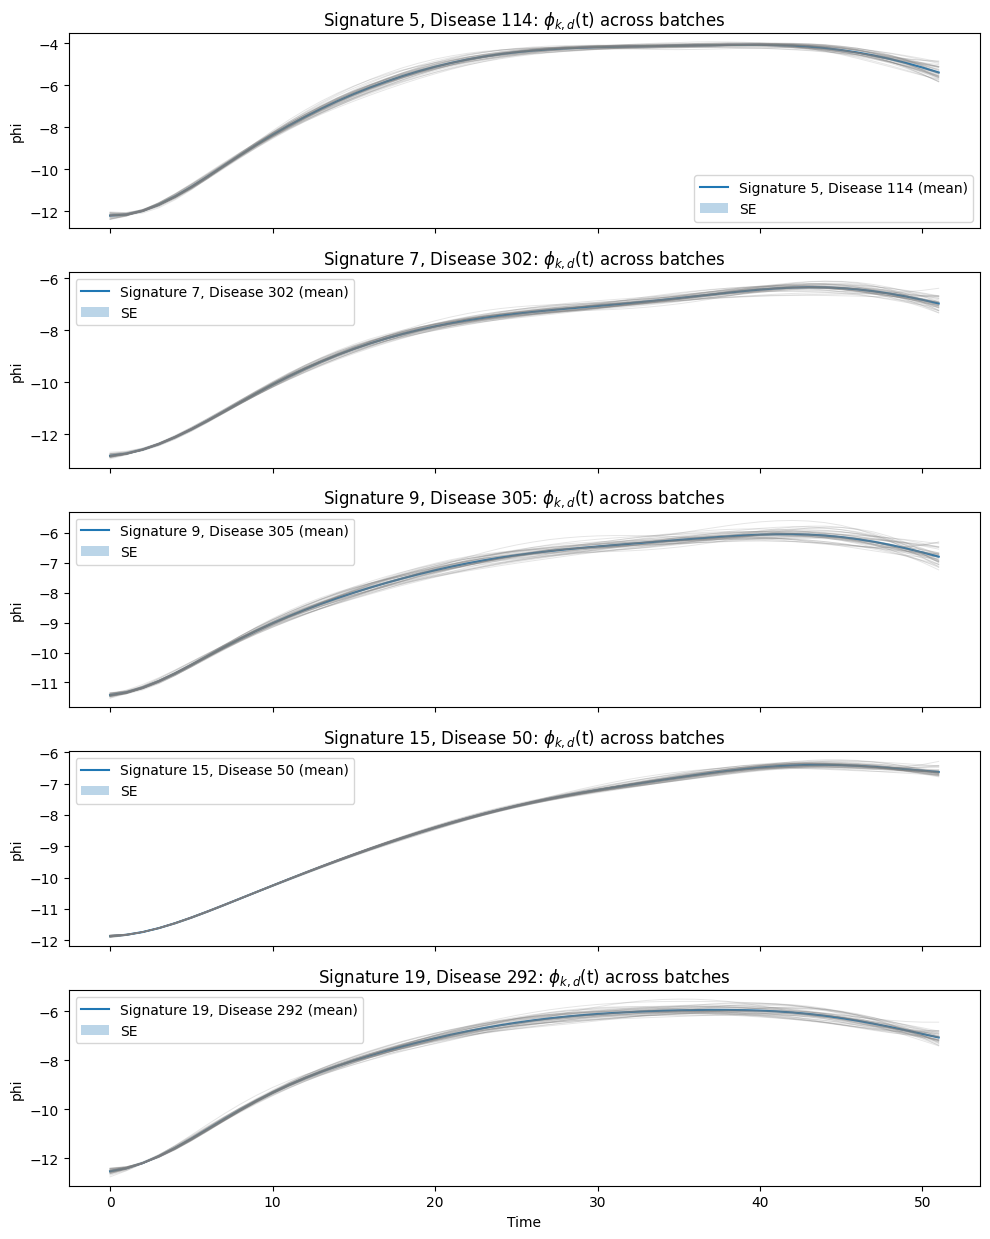

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# all_phis: shape (n_batches, K, D, T)
# all_psis: shape (n_batches, K, D)
# Let's use batch 0 (first batch) to pick the max-psi disease for each signature

selected_k = [5, 7, 9, 15, 19]
n_batches, K, D, T = all_phis.shape

# Suppose you have all_psis (psi for each batch), or just use batch 0
# all_psis = ... # shape (n_batches, K, D)
psi_batch0 = first_model['model_state_dict']['psi']  # shape (K, D)

fig, axes = plt.subplots(len(selected_k), 1, figsize=(10, 2.5*len(selected_k)), sharex=True)

for i, k in enumerate(selected_k):
    # Find disease d with max psi for this signature in batch 0
    d = np.argmax(psi_batch0[k])
    # Extract phi curves for this (k, d) across all batches
    phi_curves = all_phis[:, k, d, :]  # shape: (n_batches, T)
    mean_phi = phi_curves.mean(axis=0)
    se_phi = phi_curves.std(axis=0) / np.sqrt(n_batches)
    
    ax = axes[i]
    ax.plot(mean_phi, label=f'Signature {k}, Disease {d} (mean)')
    ax.fill_between(np.arange(T), mean_phi - se_phi, mean_phi + se_phi, alpha=0.3, label='SE')
    # Optionally, plot all batch curves faintly
    for b in range(n_batches):
        ax.plot(phi_curves[b], color='gray', alpha=0.2, linewidth=0.7)
    ax.set_title(f'Signature {k}, Disease {d}: $\phi_{{k,d}}$(t) across batches')
    ax.set_ylabel('phi')
    ax.legend()
axes[-1].set_xlabel('Time')
plt.tight_layout()
plt.savefig('/Users/sarahurbut/aladynoulli2/pyScripts/phibatchtable.pdf')
plt.show()


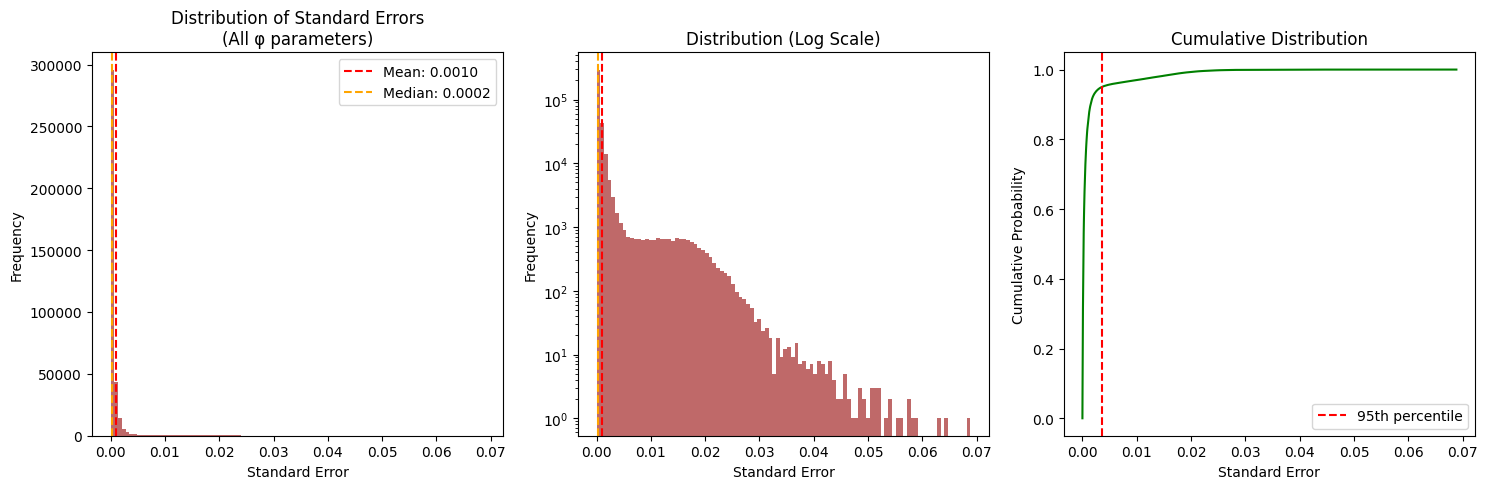

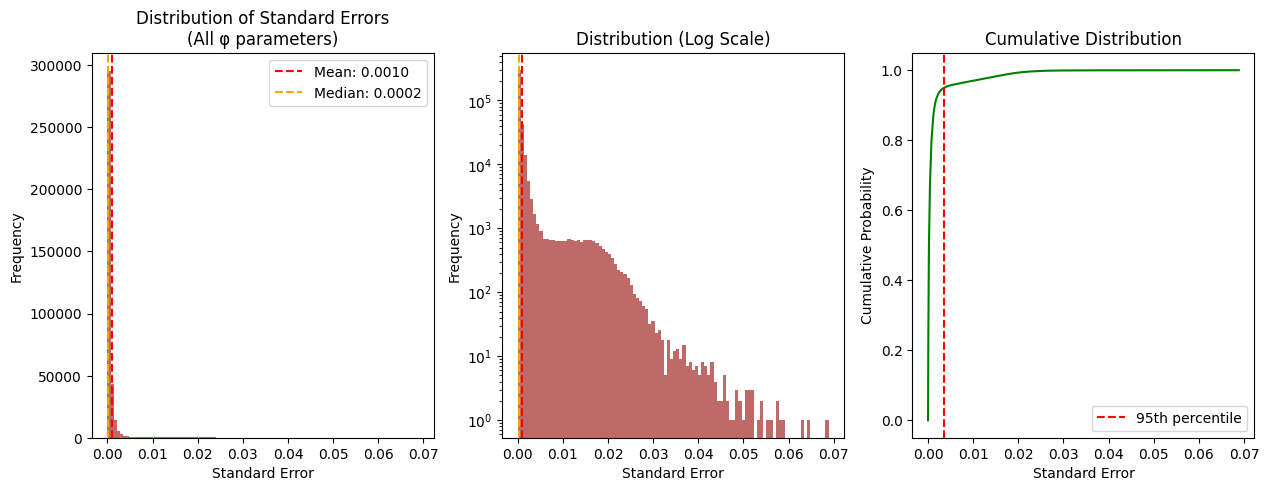

In [10]:
import numpy as np

# all_phis: shape (n_batches, K, D, T)
phi_se = all_phis.std(axis=0) / np.sqrt(all_phis.shape[0])  # shape: (K, D, T)
phi_se_flat = phi_se.flatten()
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Linear scale histogram
axes[0].hist(phi_se_flat, bins=100, color='brown', alpha=0.7)
axes[0].set_title('Distribution of Standard Errors\n(All φ parameters)')
axes[0].set_xlabel('Standard Error')
axes[0].set_ylabel('Frequency')
axes[0].axvline(np.mean(phi_se_flat), color='red', linestyle='--', label=f'Mean: {np.mean(phi_se_flat):.4f}')
axes[0].axvline(np.median(phi_se_flat), color='orange', linestyle='--', label=f'Median: {np.median(phi_se_flat):.4f}')
axes[0].legend()

# Log scale histogram
axes[1].hist(phi_se_flat, bins=100, color='brown', alpha=0.7, log=True)
axes[1].set_title('Distribution (Log Scale)')
axes[1].set_xlabel('Standard Error')
axes[1].set_ylabel('Frequency')
axes[1].axvline(np.mean(phi_se_flat), color='red', linestyle='--')
axes[1].axvline(np.median(phi_se_flat), color='orange', linestyle='--')

# Cumulative distribution
sorted_se = np.sort(phi_se_flat)
cumprob = np.arange(1, len(sorted_se)+1) / len(sorted_se)
axes[2].plot(sorted_se, cumprob, color='green')
axes[2].set_title('Cumulative Distribution')
axes[2].set_xlabel('Standard Error')
axes[2].set_ylabel('Cumulative Probability')
axes[2].axvline(np.percentile(phi_se_flat, 95), color='red', linestyle='--', label='95th percentile')
axes[2].legend()

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Linear scale histogram
axes[0].hist(phi_se_flat, bins=100, color='brown', alpha=0.7)
axes[0].set_title('Distribution of Standard Errors\n(All φ parameters)')
axes[0].set_xlabel('Standard Error')
axes[0].set_ylabel('Frequency')
axes[0].axvline(np.mean(phi_se_flat), color='red', linestyle='--', label=f'Mean: {np.mean(phi_se_flat):.4f}')
axes[0].axvline(np.median(phi_se_flat), color='orange', linestyle='--', label=f'Median: {np.median(phi_se_flat):.4f}')
axes[0].legend()

# Log scale histogram
axes[1].hist(phi_se_flat, bins=100, color='brown', alpha=0.7, log=True)
axes[1].set_title('Distribution (Log Scale)')
axes[1].set_xlabel('Standard Error')
axes[1].set_ylabel('Frequency')
axes[1].axvline(np.mean(phi_se_flat), color='red', linestyle='--')
axes[1].axvline(np.median(phi_se_flat), color='orange', linestyle='--')

# Cumulative distribution
sorted_se = np.sort(phi_se_flat)
cumprob = np.arange(1, len(sorted_se)+1) / len(sorted_se)
axes[2].plot(sorted_se, cumprob, color='green')
axes[2].set_title('Cumulative Distribution')
axes[2].set_xlabel('Standard Error')
axes[2].set_ylabel('Cumulative Probability')
axes[2].axvline(np.percentile(phi_se_flat, 95), color='red', linestyle='--', label='95th percentile')
axes[2].legend()

plt.savefig('/Users/sarahurbut/Library/CloudStorage/Dropbox/Apps/Overleaf/Science_noulli/phistability.pdf')
plt.show()

In [ ]:
# Set seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

# Initialize fresh model for this age
model = AladynSurvivalFixedKernelsAvgLoss_clust_logitInit_psitest(
    N=Y_100k.shape[0],
    D=Y_100k.shape[1],
    T=Y_100k.shape[2],
    K=20,
    P=G_with_sex.shape[1],
    init_sd_scaler=1e-1,
    G=G_with_sex,
    Y=Y_100k,
    genetic_scale=1,
    W=0.0001,
    R=0,
    prevalence_t=essentials['prevalence_t'],
    signature_references=signature_refs,
    healthy_reference=True,
    disease_names=essentials['disease_names']
)

# Reset seeds for parameter initialization
torch.manual_seed(0)
np.random.seed(0)

# Load and set initial parameters
initial_psi = torch.load('/Users/sarahurbut/Library/CloudStorage/Dropbox/data_for_running/initial_psi_400k.pt')
initial_clusters = torch.load('/Users/sarahurbut/Library/CloudStorage/Dropbox/data_for_running/initial_clusters_400k.pt')
model.initialize_params(true_psi=initial_psi)
model.clusters = initial_clusters
    

/Users/sarahurbut/aladynoulli2/pyScripts/clust_huge_amp.py:76: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.signature_refs = torch.tensor(signature_references, dtype=torch.float32)
/Users/sarahurbut/aladynoulli2/pyScripts/clust_huge_amp.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.Y = torch.tensor(Y, dtype=torch.float32)
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/p


Cluster Sizes:
Cluster 0: 14 diseases
Cluster 1: 7 diseases
Cluster 2: 21 diseases
Cluster 3: 15 diseases
Cluster 4: 17 diseases
Cluster 5: 16 diseases
Cluster 6: 57 diseases
Cluster 7: 18 diseases
Cluster 8: 13 diseases
Cluster 9: 11 diseases
Cluster 10: 18 diseases
Cluster 11: 12 diseases
Cluster 12: 26 diseases
Cluster 13: 7 diseases
Cluster 14: 9 diseases
Cluster 15: 8 diseases
Cluster 16: 7 diseases
Cluster 17: 11 diseases
Cluster 18: 6 diseases
Cluster 19: 55 diseases

Calculating gamma for k=0:
Number of diseases in cluster: 14
Base value (first 5): tensor([-13.8155, -13.8155, -13.1095, -12.4036, -12.4036])
Base value centered (first 5): tensor([-0.3723, -0.3723,  0.3336,  1.0396,  1.0396])
Base value centered mean: 6.57081614008348e-07
Gamma init for k=0 (first 5): tensor([ 0.0008,  0.0071,  0.0117,  0.0152, -0.0106])

Calculating gamma for k=1:
Number of diseases in cluster: 7
Base value (first 5): tensor([-13.8155, -13.8155, -13.8155, -13.8155, -13.8155])
Base value centered

/var/folders/fl/ng5crz0x0fnb6c6x8dk7tfth0000gn/T/ipykernel_72344/2121543661.py:33: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  initial_psi = torch.load('/Users/sarahurbut/


Calculating gamma for k=3:
Number of diseases in cluster: 82.0
Base value (first 5): tensor([-13.8155, -13.8155, -13.8155, -13.6950, -13.5744])
Base value centered (first 5): tensor([-0.1026, -0.1026, -0.1026,  0.0179,  0.1384])
Base value centered mean: 4.7445297468584613e-07
Gamma init for k=3 (first 5): tensor([ 0.0011,  0.0003,  0.0017,  0.0019, -0.0006])

Calculating gamma for k=4:
Number of diseases in cluster: 5.0
Base value (first 5): tensor([-13.8155,  -9.8620, -13.8155, -13.8155, -13.8155])
Base value centered (first 5): tensor([-0.1133,  3.8402, -0.1133, -0.1133, -0.1133])
Base value centered mean: -2.841758714566822e-06
Gamma init for k=4 (first 5): tensor([-0.0169, -0.0023,  0.0140,  0.0213, -0.0032])

Calculating gamma for k=5:
Number of diseases in cluster: 7.0
Base value (first 5): tensor([-13.8155, -13.8155, -13.8155, -13.8155, -13.8155])
Base value centered (first 5): tensor([-0.7043, -0.7043, -0.7043, -0.7043, -0.7043])
Base value centered mean: -2.2621155437718699e

In [15]:
base_dir

'/Users/sarahurbut/Library/CloudStorage/Dropbox/results_formanhattan/results/'

/var/folders/fl/ng5crz0x0fnb6c6x8dk7tfth0000gn/T/ipykernel_10524/2928917905.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  first_model = torch.load(os.path.join(base_di


Disease: Colon cancer
Assigned signature (positive psi): 17


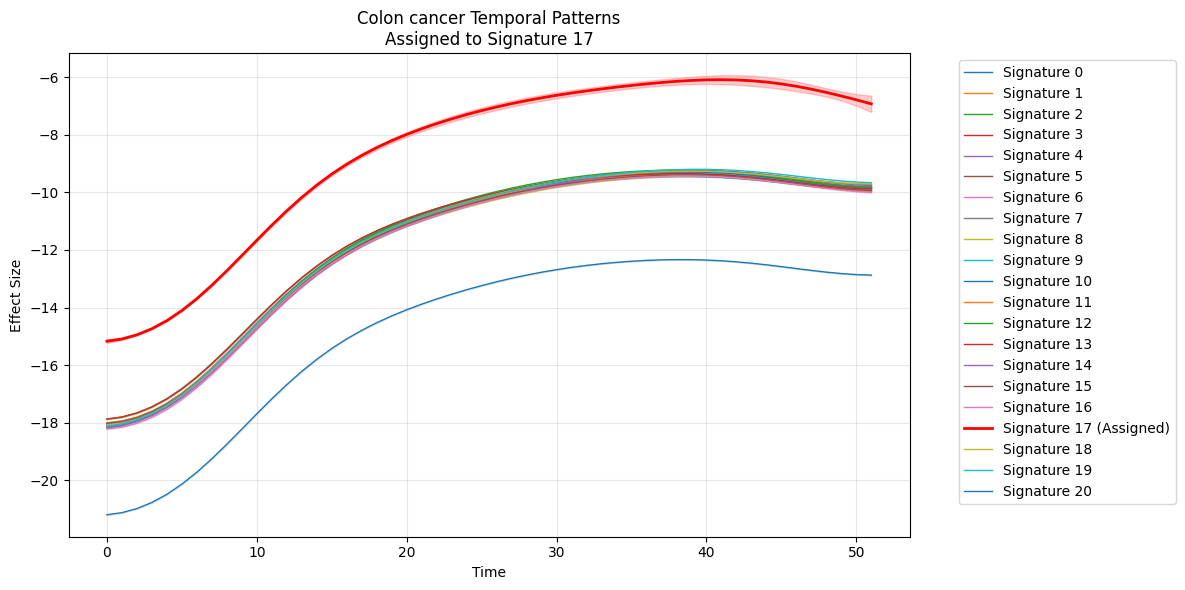


Average effect sizes across signatures:
Signature 0: -11.758 ± 0.001
Signature 1: -11.732 ± 0.003
Signature 2: -11.614 ± 0.003
Signature 3: -11.741 ± 0.004
Signature 4: -11.704 ± 0.000
Signature 5: -11.659 ± 0.002
Signature 6: -11.773 ± 0.001
Signature 7: -11.794 ± 0.004
Signature 8: -11.799 ± 0.001
Signature 9: -11.735 ± 0.001
Signature 10: -11.690 ± 0.001
Signature 11: -11.742 ± 0.000
Signature 12: -11.667 ± 0.000
Signature 13: -11.642 ± 0.001
Signature 14: -11.750 ± 0.001
Signature 15: -11.771 ± 0.000
Signature 16: -11.821 ± 0.004
Signature 17: -8.656 ± 0.098 *
Signature 18: -11.685 ± 0.001
Signature 19: -11.659 ± 0.002
Signature 20: -14.762 ± 0.000


In [16]:
import matplotlib.pyplot as plt
def verify_disease_signature_specificity(base_dir, disease_idx):
    """
    Verify that the dominant signature matches the cluster assignment for a disease
    """
    # Load first model to get psi and cluster assignments
    first_model = torch.load(os.path.join(base_dir, 'output_0_10000/model.pt'))
    psi = first_model['model_state_dict']['psi']
    disease_names = first_model['disease_names']
    disease_names = first_model['disease_names']
    disease_names = disease_names[0].tolist()
    if torch.is_tensor(psi):
        psi = psi.detach().cpu().numpy()
    
    # Find which signature has positive psi for this disease
    assigned_signature = np.argmax(psi[:, disease_idx])
    print(f"\nDisease: {disease_names[disease_idx]}")
    print(f"Assigned signature (positive psi): {assigned_signature}")
    
    # Now load and pool phi values across all models
    output_dirs = sorted(glob.glob(os.path.join(base_dir, 'output_*')))
    phi_shape = first_model['model_state_dict']['phi'].shape
    pooled_phi = np.zeros((len(output_dirs), *phi_shape))
    
    for i, dir_path in enumerate(output_dirs):
        model_path = os.path.join(dir_path, 'model.pt')
        try:
            checkpoint = torch.load(model_path)
            phi = checkpoint['model_state_dict']['phi']
            if torch.is_tensor(phi):
                phi = phi.detach().cpu().numpy()
            pooled_phi[i] = phi
        except Exception as e:
            print(f"Error loading from {dir_path}: {e}")
    
    # Calculate mean phi
    mean_phi = np.mean(pooled_phi, axis=0)
    std_phi = np.std(pooled_phi, axis=0)
    
    # Plot temporal patterns with assigned signature highlighted
    plt.figure(figsize=(12, 6))
    
    for sig in range(mean_phi.shape[0]):
        mean_pattern = mean_phi[sig, disease_idx, :]
        std_pattern = std_phi[sig, disease_idx, :]
        
        # Highlight assigned signature
        if sig == assigned_signature:
            color = 'red'
            linewidth = 2
            label = f'Signature {sig} (Assigned)'
        else:
            color = f'C{sig}'
            linewidth = 1
            label = f'Signature {sig}'
        
        plt.plot(range(mean_pattern.shape[0]), mean_pattern, 
                label=label, color=color, linewidth=linewidth)
        plt.fill_between(range(mean_pattern.shape[0]), 
                        mean_pattern - std_pattern,
                        mean_pattern + std_pattern,
                        color=color, alpha=0.2)
    
    plt.title(f"{disease_names[disease_idx]} Temporal Patterns\nAssigned to Signature {assigned_signature}")
    plt.xlabel('Time')
    plt.ylabel('Effect Size')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Print effect sizes
    mean_effects = mean_phi[:, disease_idx, :].mean(axis=1)
    std_effects = std_phi[:, disease_idx, :].mean(axis=1)
    
    print("\nAverage effect sizes across signatures:")
    for sig in range(len(mean_effects)):
        star = " *" if sig == assigned_signature else ""
        print(f"Signature {sig}: {mean_effects[sig]:.3f} ± {std_effects[sig]:.3f}{star}")

# Usage:
#base_dir = '/Users/sarahurbut/Dropbox (Personal)/results_10k_unsharedseed/'
disease_idx = 10  # Replace with the disease index you want to check
verify_disease_signature_specificity(base_dir, disease_idx)

/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_24758/2928917905.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  first_model = torch.load(os.path.join(base_di


Disease: Bacterial infection NOS
Assigned signature (positive psi): 16


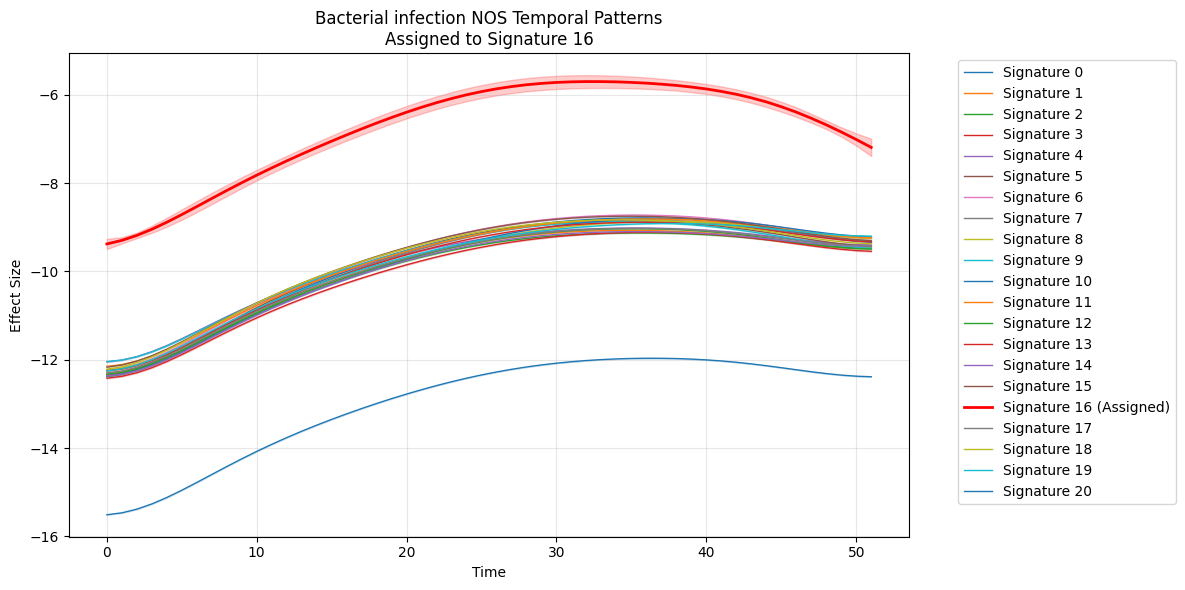


Average effect sizes across signatures:
Signature 0: -9.794 ± 0.002
Signature 1: -9.949 ± 0.004
Signature 2: -9.997 ± 0.006
Signature 3: -10.045 ± 0.006
Signature 4: -9.837 ± 0.001
Signature 5: -9.816 ± 0.003
Signature 6: -9.711 ± 0.001
Signature 7: -9.824 ± 0.008
Signature 8: -9.852 ± 0.005
Signature 9: -9.782 ± 0.002
Signature 10: -9.852 ± 0.001
Signature 11: -9.752 ± 0.001
Signature 12: -9.951 ± 0.000
Signature 13: -9.833 ± 0.002
Signature 14: -9.988 ± 0.001
Signature 15: -9.707 ± 0.001
Signature 16: -6.792 ± 0.126 *
Signature 17: -9.926 ± 0.004
Signature 18: -9.757 ± 0.001
Signature 19: -9.838 ± 0.002
Signature 20: -12.973 ± 0.000


In [33]:
verify_disease_signature_specificity(base_dir, 3)

In [8]:
import rpy2.robjects as robjects
import numpy as np

# Load the original sparse array from R
r_sparse = robjects.r.readRDS('/Users/sarahurbut/Dropbox (Personal)/withsparse/sparse_array.rds')
matrix = r_sparse[0]  # Get first timepoint

# Try to get rownames using R functions directly
try:
    # Convert to R matrix first
    robjects.r('''
        get_rownames <- function(sparse_matrix) {
            rownames(sparse_matrix)
        }
    ''')
    get_rownames = robjects.globalenv['get_rownames']
    all_patient_ids = np.array(get_rownames(matrix))
    print(f"Successfully extracted {len(all_patient_ids)} patient IDs")
except Exception as e:
    print(f"Error with R method: {e}")
    try:
        # Alternative: try getting directly from matrix slots
        all_patient_ids = np.array(matrix.slots['Dimnames'][0])
        print(f"Got IDs from slots: {len(all_patient_ids)} IDs")
    except Exception as e2:
        print(f"Error with slots method: {e2}")

# Verify we have the IDs
if 'all_patient_ids' in locals():
    print("First few IDs:", all_patient_ids[:5])
    
    def get_batch_ids(start_idx, end_idx):
        return all_patient_ids[start_idx:end_idx]

    # Example: get IDs for first batch
    batch_0_10k_ids = get_batch_ids(0, 10000)
    print(f"First batch IDs: {batch_0_10k_ids[:5]}...")
else:
    print("Failed to get patient IDs")



R[write to console]: Loading required package: Matrix



Successfully extracted 407878 patient IDs
First few IDs: ['1000015' '1000023' '1000037' '1000042' '1000059']
First batch IDs: ['1000015' '1000023' '1000037' '1000042' '1000059']...


In [9]:
print(base_dir)

/Users/sarahurbut/Dropbox (Personal)/results_formanhattan/results/


## Confirm that the batch ids match true IDS

In [10]:
# 1. First verify data subsetting is correct for a sample of people
batch_num = 30  # Looking at people 30000-40000
start_idx = batch_num * 10000
end_idx = (batch_num + 1) * 10000

# Load batch model
model_path = os.path.join(base_dir, f'output_{batch_num}0000_{(batch_num+1)}0000/model.pt')
batch_model = torch.load(model_path)

# Get subsets from batch model
Y_subset = batch_model['Y']
E_subset = batch_model['E']
G_subset = batch_model['G']


/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_47432/2776010181.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  batch_model = torch.load(model_path)


In [37]:

# Sample a few people to check (e.g., first 5 in batch)
sample_indices = range(5)
print("Checking disease occurrences for first 5 people in batch:")
for i in sample_indices:
    global_idx = start_idx + i
    print(f"\nPerson {global_idx}:")
    
    # Find non-zero entries in Y
    y_nonzero = np.where(Y_subset[i] != 0)
    print("\nDisease occurrences:")
    for disease_idx, time_idx in zip(y_nonzero[0], y_nonzero[1]):
        subset_val = Y_subset[i, disease_idx, time_idx]
        orig_val = Y[global_idx, disease_idx, time_idx]
        print(f"Disease {disease_idx} at time {time_idx}:")
        print(f"  Subset value: {subset_val}")
        print(f"  Original value: {orig_val}")
    
    # Similarly for E and G
    print("\nEnvironmental factors (non-zero):")
    e_nonzero = np.where(E_subset[i] != 0)
    for idx in range(len(e_nonzero[0])):
        e_subset_val = E_subset[i, e_nonzero[0][idx]]
        e_orig_val = E[global_idx, e_nonzero[0][idx]]
        print(f"E factor {e_nonzero[0][idx]}:")
        print(f"  Subset value: {e_subset_val}")
        print(f"  Original value: {e_orig_val}")
    
    print("\nGenetic factors (non-zero):")
    g_nonzero = np.where(G_subset[i] != 0)
    for idx in range(len(g_nonzero[0])):
        g_subset_val = G_subset[i, g_nonzero[0][idx]]
        g_orig_val = G[global_idx, g_nonzero[0][idx]]
        print(f"G factor {g_nonzero[0][idx]}:")
        print(f"  Subset value: {g_subset_val}")
        print(f"  Original value: {g_orig_val}")

Checking disease occurrences for first 5 people in batch:

Person 300000:

Disease occurrences:
Disease 294 at time 31:
  Subset value: 1.0
  Original value: 1.0

Environmental factors (non-zero):
E factor 0:
  Subset value: 51
  Original value: 51
E factor 1:
  Subset value: 51
  Original value: 51
E factor 2:
  Subset value: 51
  Original value: 51
E factor 3:
  Subset value: 51
  Original value: 51
E factor 4:
  Subset value: 51
  Original value: 51
E factor 5:
  Subset value: 51
  Original value: 51
E factor 6:
  Subset value: 51
  Original value: 51
E factor 7:
  Subset value: 51
  Original value: 51
E factor 8:
  Subset value: 51
  Original value: 51
E factor 9:
  Subset value: 51
  Original value: 51
E factor 10:
  Subset value: 51
  Original value: 51
E factor 11:
  Subset value: 51
  Original value: 51
E factor 12:
  Subset value: 51
  Original value: 51
E factor 13:
  Subset value: 51
  Original value: 51
E factor 14:
  Subset value: 51
  Original value: 51
E factor 15:
  Sub

In [38]:
def verify_subsetting(Y, Y_subset, start_idx=300000, n_people=5):
    print(f"Checking disease occurrences for first {n_people} people in batch:\n")
    
    for i, person in enumerate(range(start_idx, start_idx + n_people)):
        print(f"Person {person}:")
        
        # Find diseases that occurred
        diseases = np.where(Y[person].sum(axis=1) > 0)[0]
        
        if len(diseases) > 0:
            print("\nDisease occurrences:")
            for d in diseases:
                # Find when the disease occurred
                time = np.where(Y[person, d] == 1)[0][0]
                print(f"Disease {d} at time {time}:")
                print(f"  Subset value: {Y_subset[i, d, time]}")  # Use i instead of 0
                print(f"  Original value: {Y[person, d, time]}")
        else:
            print("No diseases occurred")
        print("\n")

# Test the function
verify_subsetting(Y, Y_subset)

Checking disease occurrences for first 5 people in batch:

Person 300000:

Disease occurrences:
Disease 294 at time 31:
  Subset value: 1.0
  Original value: 1.0


Person 300001:

Disease occurrences:
Disease 33 at time 32:
  Subset value: 1.0
  Original value: 1.0
Disease 60 at time 44:
  Subset value: 1.0
  Original value: 1.0
Disease 109 at time 40:
  Subset value: 1.0
  Original value: 1.0
Disease 174 at time 41:
  Subset value: 1.0
  Original value: 1.0
Disease 176 at time 41:
  Subset value: 1.0
  Original value: 1.0
Disease 183 at time 39:
  Subset value: 1.0
  Original value: 1.0
Disease 195 at time 39:
  Subset value: 1.0
  Original value: 1.0
Disease 203 at time 32:
  Subset value: 1.0
  Original value: 1.0
Disease 211 at time 42:
  Subset value: 1.0
  Original value: 1.0
Disease 263 at time 34:
  Subset value: 1.0
  Original value: 1.0
Disease 281 at time 29:
  Subset value: 1.0
  Original value: 1.0
Disease 323 at time 41:
  Subset value: 1.0
  Original value: 1.0
Disease 3

## Load and save all lambdas in batch order with IDS

In [11]:
import os
import glob
import numpy as np
import torch
import re
print("base_dir")


# List all output directories and sort them properly by their index numbers
def sort_by_index(dir_name):
    # Extract just the start number from directory name
    # e.g., from 'output_10000_20000_20241225_062028' get '10000'
    match = re.search(r'output_(\d+)_\d+', dir_name)
    if match:
        return int(match.group(1))
    return 0

# Test the sorting
output_dirs = sorted(glob.glob(os.path.join(base_dir, 'output_*')), key=sort_by_index)

# Print first few directories to verify sorting
print("Verifying directory sorting:")
for dir_path in output_dirs[:5]:
    print(dir_path)


# Initialize the full array
all_lambdas = np.zeros((400000, 21, 52))  # [n_individuals, n_signatures, n_timepoints]

# Keep track of processed indices
processed_ranges = []

# Load and combine lambda from each model
current_idx = 0
for dir_path in output_dirs:
    model_path = os.path.join(dir_path, 'model.pt')
    try:
        # Extract batch range from directory name
        batch_range = re.findall(r'output_(\d+)_(\d+)', os.path.basename(dir_path))
        if batch_range:
            start_idx, end_idx = map(int, batch_range[0])
            print(f"\nProcessing batch {start_idx}-{end_idx}")
            
            # Verify this matches our current_idx
            if current_idx != start_idx:
                print(f"WARNING: Index mismatch! current_idx={current_idx}, but batch starts at {start_idx}")
        
        # Load the saved model
        checkpoint = torch.load(model_path)
        
        # Extract lambda
        if 'model_state_dict' in checkpoint:
            lambda_values = checkpoint['model_state_dict']['lambda_']
        else:
            lambda_values = checkpoint['lambda_']
            
        # Convert to numpy if it's a tensor
        if torch.is_tensor(lambda_values):
            lambda_values = lambda_values.detach().cpu().numpy()
        
        # Get batch size
        batch_size = lambda_values.shape[0]
        
        # Add to the full array
        all_lambdas[current_idx:current_idx + batch_size] = lambda_values
        
        # Store processed range
        processed_ranges.append((current_idx, current_idx + batch_size))
        
        print(f"Loaded lambda from {dir_path}")
        print(f"Batch size: {batch_size}")
        print(f"Current index range: {current_idx} to {current_idx + batch_size}")
        
        current_idx += batch_size
        
    except Exception as e:
        print(f"Error loading from {dir_path}: {e}")

# Verify no gaps or overlaps in processed ranges
processed_ranges.sort()
for i in range(len(processed_ranges)-1):
    if processed_ranges[i][1] != processed_ranges[i+1][0]:
        print(f"WARNING: Gap or overlap between batches! {processed_ranges[i]} and {processed_ranges[i+1]}")

# Save the combined lambdas
#np.save('all_lambdas_combined_smallg.npy', all_lambdas)

# Print final verification
print("\nFinal verification:")
print("Shape of all_lambdas:", all_lambdas.shape)
print("Total individuals processed:", current_idx)
print("Processed ranges:", processed_ranges)

# Load patient IDs and verify length matches
patient_ids = np.load('/Users/sarahurbut/Dropbox (Personal)/patient_ids.npy')
# Verify dimensions
print("Total available patient IDs:", len(patient_ids))  # Should be 407,878
print("Processed lambda shape:", all_lambdas.shape)      # Should be (400000, 20, 52)

# Create mapping of processed IDs
processed_ids = patient_ids[:400000]  # Get just the first 400K IDs we processed
print("\nVerification of processed IDs:")
print("Number of processed IDs:", len(processed_ids))
print("First few IDs:", processed_ids[:5])
print("Last few IDs:", processed_ids[-5:])

# Save the processed IDs mapping
np.save('processed_patient_ids.npy', processed_ids)

# Print some stats about unprocessed patients
unprocessed_ids = patient_ids[400000:]
print("\nUnprocessed patients:")
print("Number of unprocessed IDs:", len(unprocessed_ids))
print("First few unprocessed IDs:", unprocessed_ids[:5])

base_dir
Verifying directory sorting:
/Users/sarahurbut/Dropbox (Personal)/results_formanhattan/results/output_0_10000
/Users/sarahurbut/Dropbox (Personal)/results_formanhattan/results/output_10000_20000
/Users/sarahurbut/Dropbox (Personal)/results_formanhattan/results/output_20000_30000
/Users/sarahurbut/Dropbox (Personal)/results_formanhattan/results/output_30000_40000
/Users/sarahurbut/Dropbox (Personal)/results_formanhattan/results/output_40000_50000

Processing batch 0-10000
Loaded lambda from /Users/sarahurbut/Dropbox (Personal)/results_formanhattan/results/output_0_10000
Batch size: 10000
Current index range: 0 to 10000

Processing batch 10000-20000


/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_47432/4199070625.py:49: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_path)


Loaded lambda from /Users/sarahurbut/Dropbox (Personal)/results_formanhattan/results/output_10000_20000
Batch size: 10000
Current index range: 10000 to 20000

Processing batch 20000-30000
Loaded lambda from /Users/sarahurbut/Dropbox (Personal)/results_formanhattan/results/output_20000_30000
Batch size: 10000
Current index range: 20000 to 30000

Processing batch 30000-40000
Loaded lambda from /Users/sarahurbut/Dropbox (Personal)/results_formanhattan/results/output_30000_40000
Batch size: 10000
Current index range: 30000 to 40000

Processing batch 40000-50000
Loaded lambda from /Users/sarahurbut/Dropbox (Personal)/results_formanhattan/results/output_40000_50000
Batch size: 10000
Current index range: 40000 to 50000

Processing batch 50000-60000
Loaded lambda from /Users/sarahurbut/Dropbox (Personal)/results_formanhattan/results/output_50000_60000
Batch size: 10000
Current index range: 50000 to 60000

Processing batch 60000-70000
Loaded lambda from /Users/sarahurbut/Dropbox (Personal)/resu

## Convert to thetas

In [41]:
def softmax(x):
    """
    Compute softmax values for each set of scores in x.
    x shape: (n_individuals, n_signatures, n_timepoints)
    """
    # Reshape to (n_individuals * n_timepoints, n_signatures)
    x_reshaped = x.transpose(0, 2, 1).reshape(-1, x.shape[1])
    
    # Compute softmax
    e_x = np.exp(x_reshaped - np.max(x_reshaped, axis=1, keepdims=True))
    softmax_x = e_x / np.sum(e_x, axis=1, keepdims=True)
    
    # Reshape back to original shape
    return softmax_x.reshape(x.shape[0], x.shape[2], x.shape[1]).transpose(0, 2, 1)

# Calculate thetas using softmax
all_thetas = softmax(all_lambdas)  # shape: (400000, 20, 52)

# Calculate AUC
timepoints = np.arange(52)
theta_aucs = np.array([np.trapz(all_thetas[:, s, :], timepoints) for s in range(21)]).T


/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_24758/1460757963.py:21: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  theta_aucs = np.array([np.trapz(all_thetas[:, s, :], timepoints) for s in range(21)]).T


In [42]:
theta_aucs[0,:]

array([1.33857496, 4.31766541, 3.28828969, 7.94979099, 0.56797727,
       2.26322646, 0.43305001, 7.85627137, 4.59252193, 1.54257865,
       1.40859449, 0.40075818, 0.44250852, 1.12682462, 1.49376224,
       0.75614175, 3.85412421, 4.06986347, 0.89345715, 2.10140805,
       0.30261057])

In [43]:
theta_aucs.shape

(400000, 21)

In [78]:
base_dir

'/Users/sarahurbut/Dropbox (Personal)/results_formanhattan/results/'

# confirm proper conversion 

In [124]:
def softmax_single(x):
    """
    Compute softmax for a single timepoint
    x shape: (n_signatures,)
    """
    e_x = np.exp(x - np.max(x))
    return e_x / np.sum(e_x)

def softmax_full(x):
    """
    Compute softmax for full array
    x shape: (n_individuals, n_signatures, n_timepoints)
    """
    # Reshape to (n_individuals * n_timepoints, n_signatures)
    x_reshaped = x.transpose(0, 2, 1).reshape(-1, x.shape[1])
    
    # Compute softmax
    e_x = np.exp(x_reshaped - np.max(x_reshaped, axis=1, keepdims=True))
    softmax_x = e_x / np.sum(e_x, axis=1, keepdims=True)
    
    # Reshape back
    return softmax_x.reshape(x.shape[0], x.shape[2], x.shape[1]).transpose(0, 2, 1)

# Let's check a few random people at different timepoints
sample_people = [0, 100, 399999]  # First, middle, and last person
sample_timepoints = [0, 25, 51]   # First, middle, and last timepoint

print("Verifying lambda to theta conversion:")
for person in sample_people:
    print(f"\nPerson {person} (ID: {patient_ids[person]}):")
    
    for t in sample_timepoints:
        print(f"\nTimepoint {t}:")
        
        # Get lambdas for this person at this timepoint
        lambdas_t = all_lambdas[person, :, t]
        print("Lambdas:")
        for s in range(20):
            print(f"Signature {s+1}: {lambdas_t[s]:.4f}")
        
        # Calculate thetas using softmax
        thetas_t = softmax_single(lambdas_t)
        print("\nThetas (after softmax):")
        for s in range(20):
            print(f"Signature {s+1}: {thetas_t[s]:.4f}")
            
        # Verify sum to 1
        print(f"\nSum of thetas: {np.sum(thetas_t):.6f}")
        
        # Show top 3 signatures at this timepoint
        top_sigs = np.argsort(thetas_t)[-3:][::-1]
        print("\nTop 3 signatures:")
        for s in top_sigs:
            print(f"Signature {s+1}: {thetas_t[s]:.4f}")

# Calculate full theta array
all_thetas = softmax_full(all_lambdas)

# Verify shapes
print("\nArray shapes:")
print(f"Lambda array shape: {all_lambdas.shape}")
print(f"Theta array shape: {all_thetas.shape}")

Verifying lambda to theta conversion:

Person 0 (ID: 1000015):

Timepoint 0:
Lambdas:
Signature 1: -4.9533
Signature 2: -2.3152
Signature 3: -2.9896
Signature 4: -0.8148
Signature 5: -3.3131
Signature 6: -5.7490
Signature 7: -7.0019
Signature 8: -2.1616
Signature 9: -1.4834
Signature 10: -3.2450
Signature 11: -5.4877
Signature 12: -6.1428
Signature 13: -4.6575
Signature 14: -4.1191
Signature 15: -5.0513
Signature 16: -4.8572
Signature 17: -2.7254
Signature 18: -2.4867
Signature 19: -4.3954
Signature 20: -2.7028

Thetas (after softmax):
Signature 1: 0.0054
Signature 2: 0.0758
Signature 3: 0.0386
Signature 4: 0.3399
Signature 5: 0.0279
Signature 6: 0.0024
Signature 7: 0.0007
Signature 8: 0.0884
Signature 9: 0.1742
Signature 10: 0.0299
Signature 11: 0.0032
Signature 12: 0.0016
Signature 13: 0.0073
Signature 14: 0.0125
Signature 15: 0.0049
Signature 16: 0.0060
Signature 17: 0.0503
Signature 18: 0.0639
Signature 19: 0.0095
Signature 20: 0.0515

Sum of thetas: 1.000000

Top 3 signatures:
Sig

In [125]:

softmax_single(all_lambdas[0,:,0])


array([0.0054206 , 0.07581465, 0.03862314, 0.33991067, 0.02794817,
       0.00244594, 0.00069878, 0.08839709, 0.17417487, 0.02991653,
       0.00317633, 0.00164979, 0.00728587, 0.01248334, 0.00491417,
       0.00596736, 0.05030242, 0.06386535, 0.00946978, 0.05145457,
       0.00608057])

In [126]:

all_thetas[0,:,0]

array([0.0054206 , 0.07581465, 0.03862314, 0.33991067, 0.02794817,
       0.00244594, 0.00069878, 0.08839709, 0.17417487, 0.02991653,
       0.00317633, 0.00164979, 0.00728587, 0.01248334, 0.00491417,
       0.00596736, 0.05030242, 0.06386535, 0.00946978, 0.05145457,
       0.00608057])

In [127]:
person_idx = 0

# Calculate thetas for this person
thetas_person = torch.softmax(torch.tensor(all_lambdas[person_idx]), dim=0).numpy()
thetas_person[:,0]

array([0.0054206 , 0.07581465, 0.03862314, 0.33991067, 0.02794817,
       0.00244594, 0.00069878, 0.08839709, 0.17417487, 0.02991653,
       0.00317633, 0.00164979, 0.00728587, 0.01248334, 0.00491417,
       0.00596736, 0.05030242, 0.06386535, 0.00946978, 0.05145457,
       0.00608057])

# COnfirm within reason of trajectories

/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_24758/4067154478.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  signature_refs = torch.load('/Users/sarahurbu


Signature 9:
Individual AUC: 4.543
Individual Mean theta: 0.089
Reference AUC: 4.473

Signature 17:
Individual AUC: 5.474
Individual Mean theta: 0.107
Reference AUC: 4.185

Signature 4:
Individual AUC: 6.944
Individual Mean theta: 0.137
Reference AUC: 7.686


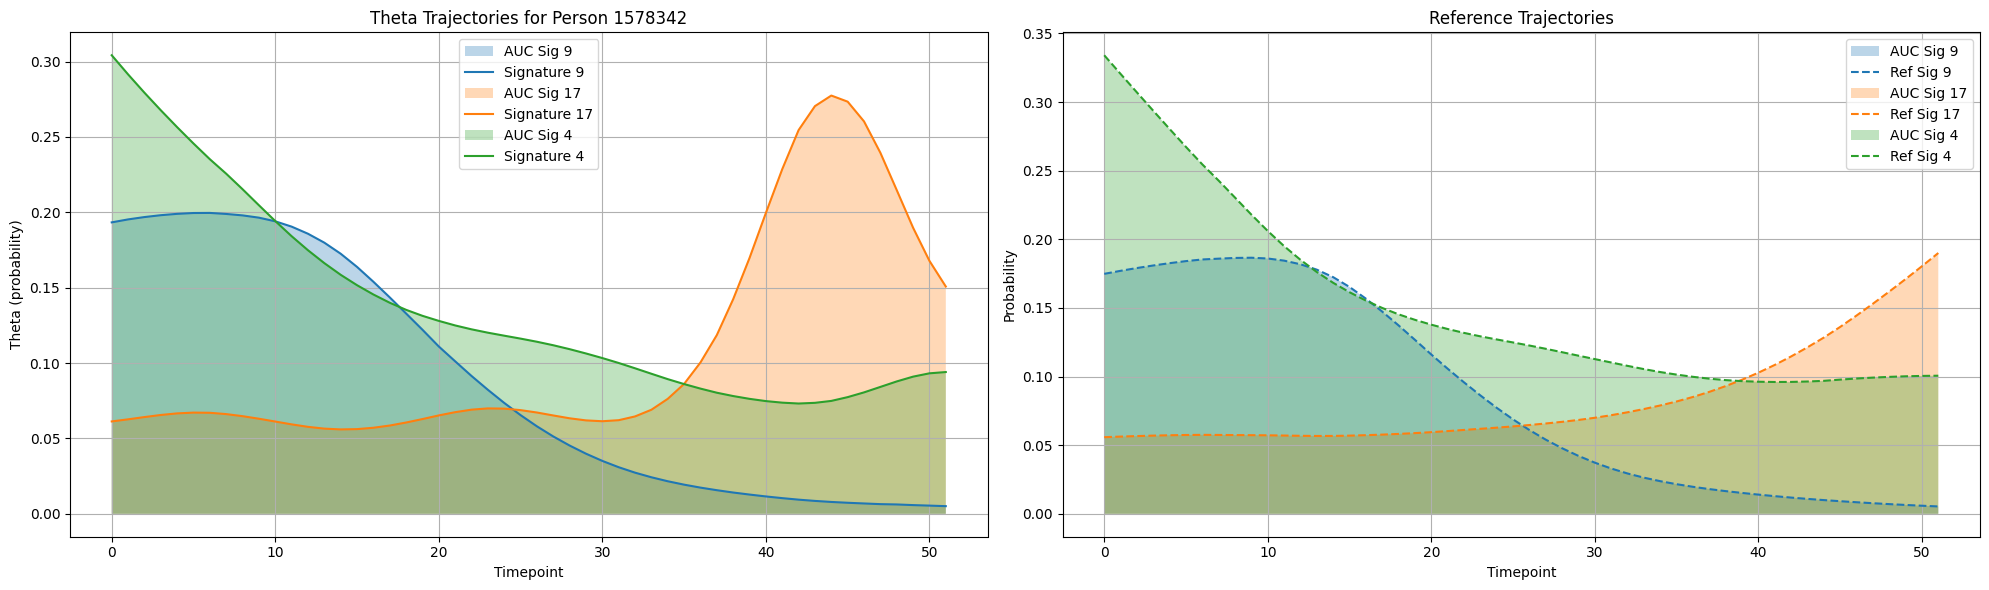

In [129]:
# Load reference trajectories
signature_refs = torch.load('/Users/sarahurbut/aladynoulli2/pyScripts/ptdir/reference_trajectories.pt')['signature_refs']
random_person = np.random.randint(0, len(all_lambdas))  # This will give a random number between 0 and the total number of people

# Take one person as an example
person_idx = random_person

# Calculate thetas for this person
thetas_person = torch.softmax(torch.tensor(all_lambdas[person_idx]), dim=0).numpy()

# Create figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
timepoints = np.arange(52)

# Plot top 3 signatures by max value
top_sigs = np.argsort(np.max(thetas_person, axis=1))[-3:]

# Plot 1: Individual's theta trajectories
for sig in top_sigs:
    ax1.fill_between(timepoints, 0, thetas_person[sig], alpha=0.3, label=f'AUC Sig {sig+1}')
    ax1.plot(timepoints, thetas_person[sig], label=f'Signature {sig+1}')
    
    # Plot 2: Reference trajectories for the same signatures
    ref_traj = torch.softmax(signature_refs, dim=0).numpy()[sig]
    ax2.fill_between(timepoints, 0, ref_traj, alpha=0.3, label=f'AUC Sig {sig+1}')
   
    ax2.plot(timepoints, ref_traj, '--', label=f'Ref Sig {sig+1}')

ax1.set_title(f'Theta Trajectories for Person {patient_ids[person_idx]}')
ax1.set_xlabel('Timepoint')
ax1.set_ylabel('Theta (probability)')
ax1.legend()
ax1.grid(True)

ax2.set_title('Reference Trajectories')
ax2.set_xlabel('Timepoint')
ax2.set_ylabel('Probability')
ax2.legend()
ax2.grid(True)

plt.tight_layout()

# Calculate and print AUCs for these signatures
for sig in top_sigs:
    auc = np.trapz(thetas_person[sig], timepoints)
    print(f"\nSignature {sig+1}:")
    print(f"Individual AUC: {auc:.3f}")
    print(f"Individual Mean theta: {np.mean(thetas_person[sig]):.3f}")
    
    ref_auc = np.trapz(torch.softmax(signature_refs, dim=0).numpy()[sig], timepoints)
    print(f"Reference AUC: {ref_auc:.3f}")

In [12]:
# Load references (signatures only, no healthy)
refs = torch.load('/Users/sarahurbut/aladynoulli2/pyScripts/reference_trajectories.pt')
signature_refs = refs['signature_refs']
# When initializing the model:

# Now in your batch run, load and verify:
initial_psi = torch.load('/Users/sarahurbut/aladynoulli2/pyScripts/initial_psi_400k.pt')
initial_clusters = torch.load('/Users/sarahurbut/aladynoulli2/pyScripts/initial_clusters_400k.pt')


/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_47432/1801583833.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  refs = torch.load('/Users/sarahurbut/aladynou

In [131]:
Y_100k=first_model['Y']
G_100k=first_model['G']
prevalence_t=first_model['prevalence_t']
disease_names=first_model['disease_names']
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess
from clust_huge_amp import *


torch.manual_seed(7)
np.random.seed(4)
# Create model without healthy reference
model = AladynSurvivalFixedKernelsAvgLoss_clust_logitInit_psitest(
    N=Y_100k.shape[0], 
    D=Y_100k.shape[1], 
    T=Y_100k.shape[2], 
    K=20,
    P=G_100k.shape[1],
    init_sd_scaler=1e-1,
    G=G_100k, 
    Y=Y_100k,
    genetic_scale=0,
    W=0.0001,
    R=0,
    prevalence_t=prevalence_t,
    signature_references=signature_refs,  # Only pass signature refs
    healthy_reference=True,  # Explicitly set to None
    disease_names=disease_names
)

torch.manual_seed(0)
np.random.seed(0)
# Initialize with psi and clusters
model.initialize_params(true_psi=initial_psi)
model.clusters = initial_clusters
# Verify clusters match
clusters_match = np.array_equal(initial_clusters, model.clusters)
print(f"\nClusters match exactly: {clusters_match}")

# Load the state dict
checkpoint=first_model
model.load_state_dict(checkpoint['model_state_dict'])
model.clusters=checkpoint['clusters']
model.eval()  # Set to evaluation m

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Users/sarahurbut/aladynoulli2/pyScripts/clust_huge_amp.py:73: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.signature_refs = torch.tensor(signature_references, dtype=torch.float32)
/Users/sarahurbut/aladynoulli2/pyScripts/clust_huge_amp.py:80: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.G = torch.tensor(G, dtype=torch.float32)
/Users/sarahurbut/aladynoulli2/pyScripts/clust_huge_amp.py:83: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.G = torch.tensor(G_scaled, dtype=torch.float32)
/Users/sarahurbut/aladynoulli2/pyScripts


Cluster Sizes:
Cluster 0: 14 diseases
Cluster 1: 7 diseases
Cluster 2: 21 diseases
Cluster 3: 15 diseases
Cluster 4: 17 diseases
Cluster 5: 16 diseases
Cluster 6: 57 diseases
Cluster 7: 18 diseases
Cluster 8: 13 diseases
Cluster 9: 11 diseases
Cluster 10: 18 diseases
Cluster 11: 12 diseases
Cluster 12: 26 diseases
Cluster 13: 7 diseases
Cluster 14: 9 diseases
Cluster 15: 8 diseases
Cluster 16: 7 diseases
Cluster 17: 11 diseases
Cluster 18: 6 diseases
Cluster 19: 55 diseases

Calculating gamma for k=0:
Number of diseases in cluster: 14
Base value (first 5): tensor([-18.4207, -18.4207, -17.3858, -16.3508, -16.3508])
Base value centered (first 5): tensor([-0.5458, -0.5458,  0.4891,  1.5240,  1.5240])
Base value centered mean: 3.23352810482902e-06
Gamma init for k=0 (first 5): tensor([ 0.0013,  0.0101,  0.0173,  0.0224, -0.0156])

Calculating gamma for k=1:
Number of diseases in cluster: 7
Base value (first 5): tensor([-18.4207, -18.4207, -18.4207, -18.4207, -18.4207])
Base value centered

AladynSurvivalFixedKernelsAvgLoss_clust_logitInit_psitest()

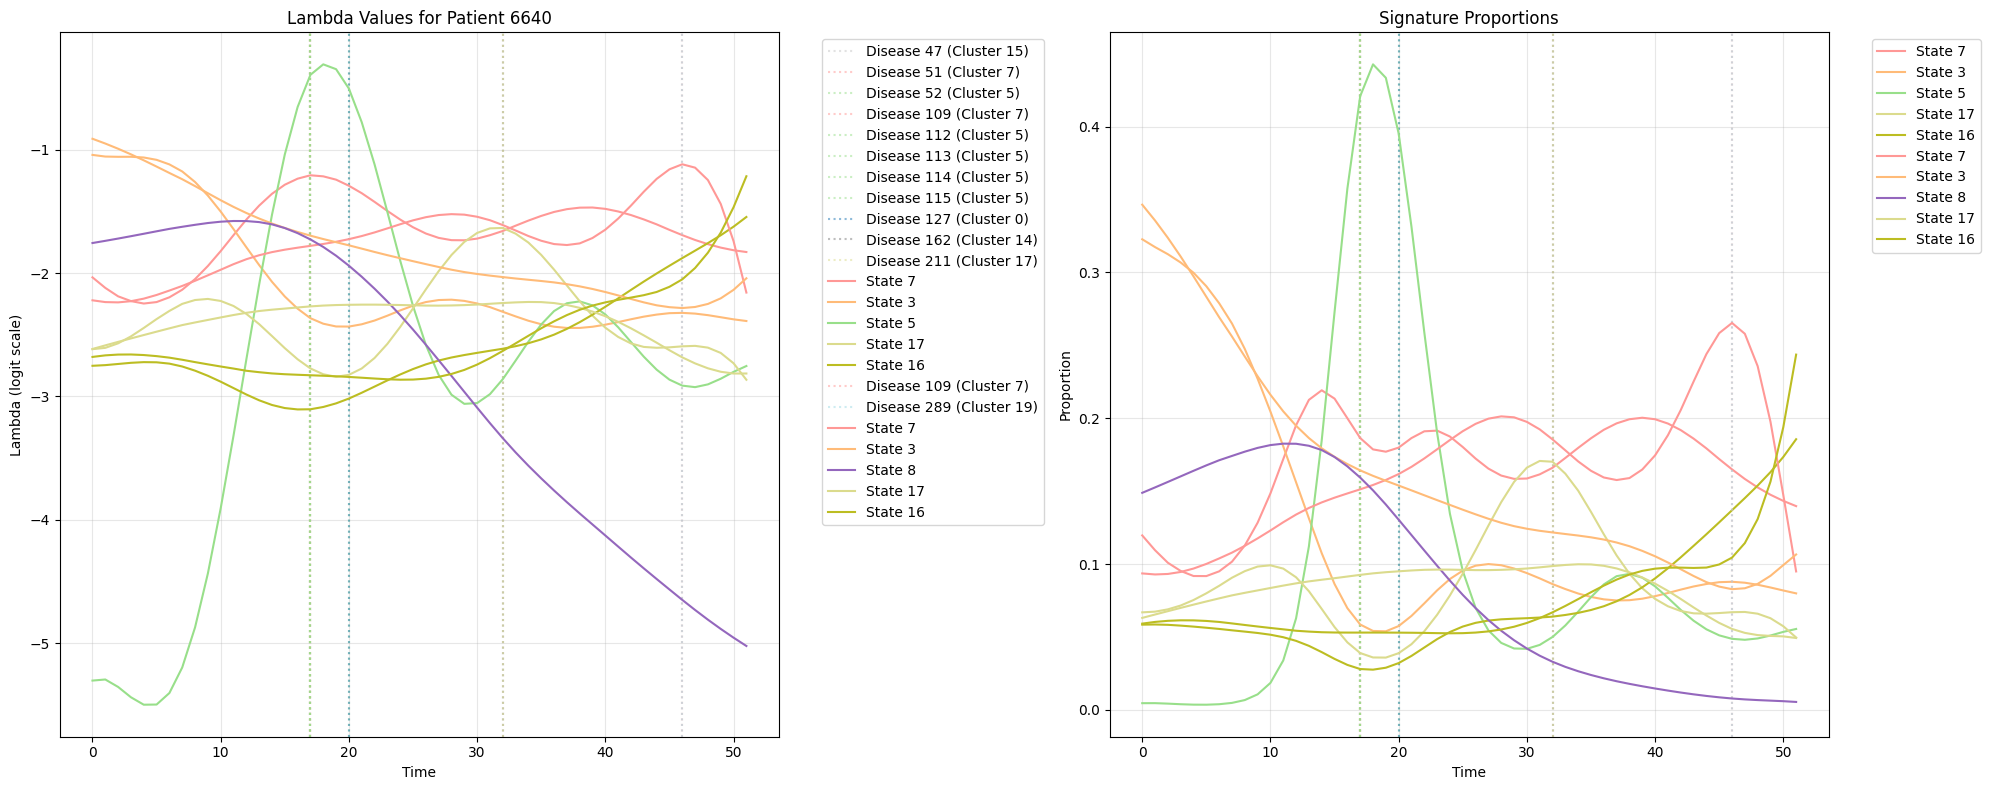

In [94]:
n_samples = 2
sample_patients = [4376, 6640]
n_top_states = 5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
time_points = np.arange(model.T)

# Get dominant states for these patients
lambda_patients = model.lambda_[sample_patients]
patient_props = torch.softmax(lambda_patients, dim=1)
mean_props = patient_props.mean(dim=-1)
top_states = mean_props.topk(n_top_states, dim=-1).indices

# Color map for states
colors = plt.cm.tab20(np.linspace(0, 1, model.K))

# Plot for each patient
for i, patient in enumerate(sample_patients):
    # Get diagnosis times and associated clusters
    diagnoses = model.Y[patient]  # Shape: [D, T]
    for d in range(model.D):
        diag_times = torch.where(diagnoses[d])[0]
        if len(diag_times) > 0:
            diag_time = diag_times[0].item()
            # Get cluster assignment for this disease
            cluster = model.clusters[d]
            # Use cluster's color for the vertical line
            ax1.axvline(x=diag_time, color=colors[cluster], alpha=0.5, linestyle=':', 
                       label=f'Disease {d} (Cluster {cluster})')
            ax2.axvline(x=diag_time, color=colors[cluster], alpha=0.5, linestyle=':')
            
    # Plot lambda trajectories
    for j, k in enumerate(top_states[i]):
        k = k.item()
        color = colors[k]
        
        # Plot lambda values
        ax1.plot(time_points, model.lambda_[patient, k].detach(), '-', color=color,
                label=f'State {k}')
        
        # Plot proportions
        patient_props = torch.softmax(model.lambda_[patient].detach(), dim=0)[k]
        ax2.plot(time_points, patient_props, '-', color=color,
                label=f'State {k}')

# Customize plots
ax1.set_title(f'Lambda Values for Patient {patient}')
ax1.set_xlabel('Time')
ax1.set_ylabel('Lambda (logit scale)')
ax1.grid(True, alpha=0.3)
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax2.set_title('Signature Proportions')
ax2.set_xlabel('Time')
ax2.set_ylabel('Proportion')
ax2.grid(True, alpha=0.3)
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

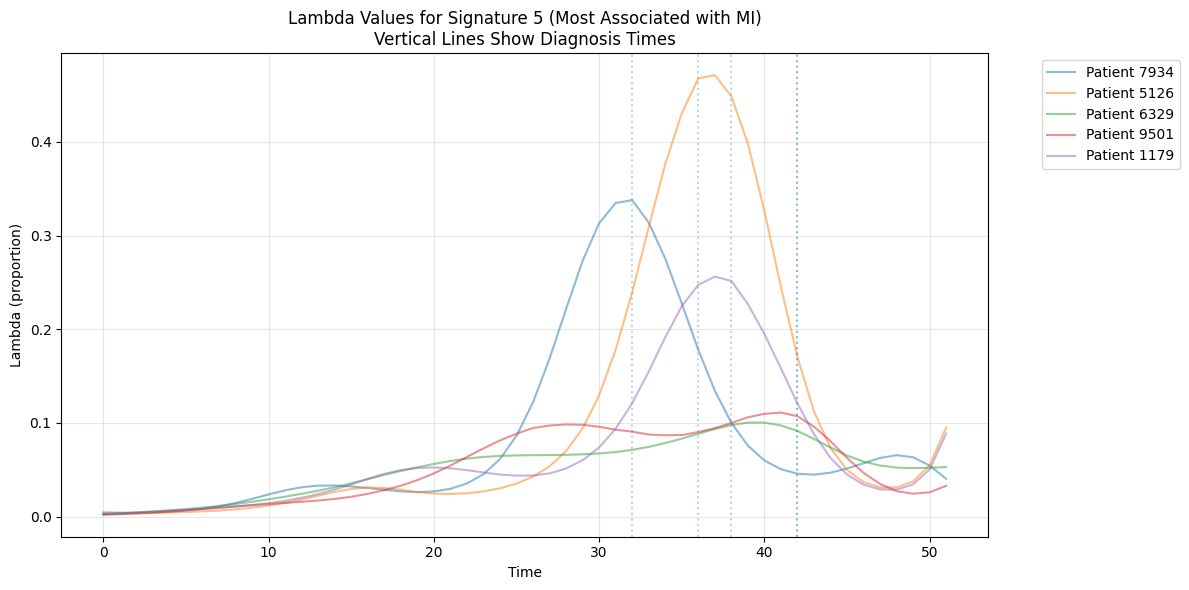

In [132]:
def plot_disease_lambda_alignment(model):
    """
    Plot lambda values aligned with disease occurrences for selected patients
    """
    # Find patients with specific diseases and their diagnosis times
    disease_idx = 112  # MI
    patients_with_disease = []
    diagnosis_times = []
    
    for patient in range(model.Y.shape[0]):
        diag_time = torch.where(model.Y[patient, disease_idx])[0]
        if len(diag_time) > 0:
            patients_with_disease.append(patient)
            diagnosis_times.append(diag_time[0].item())
    
    # Sample a few patients
    n_samples = min(5, len(patients_with_disease))
    sample_indices = np.random.choice(len(patients_with_disease), n_samples, replace=False)
    
    # Create plot
    fig, ax = plt.subplots(figsize=(12, 6))
    time_points = np.arange(model.T)
    
    # Find signature that most strongly associates with this disease
    psi_disease = model.psi[:, disease_idx].detach()
    sig_idx = torch.argmax(psi_disease).item()
    
    # Plot for each sampled patient
    for idx in sample_indices:
        patient = patients_with_disease[idx]
        diag_time = diagnosis_times[idx]
        
        # Plot lambda (detached)
        lambda_values = torch.softmax(model.lambda_[patient].detach(), dim=0)[sig_idx]
        ax.plot(time_points, lambda_values.numpy(),
                alpha=0.5, label=f'Patient {patient}')
        
        # Mark diagnosis time
        ax.axvline(x=diag_time, linestyle=':', alpha=0.3)
    
    ax.set_title(f'Lambda Values for Signature {sig_idx} (Most Associated with MI)\nVertical Lines Show Diagnosis Times')
    ax.set_xlabel('Time')
    ax.set_ylabel('Lambda (proportion)')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Call the plotting function
plot_disease_lambda_alignment(model)

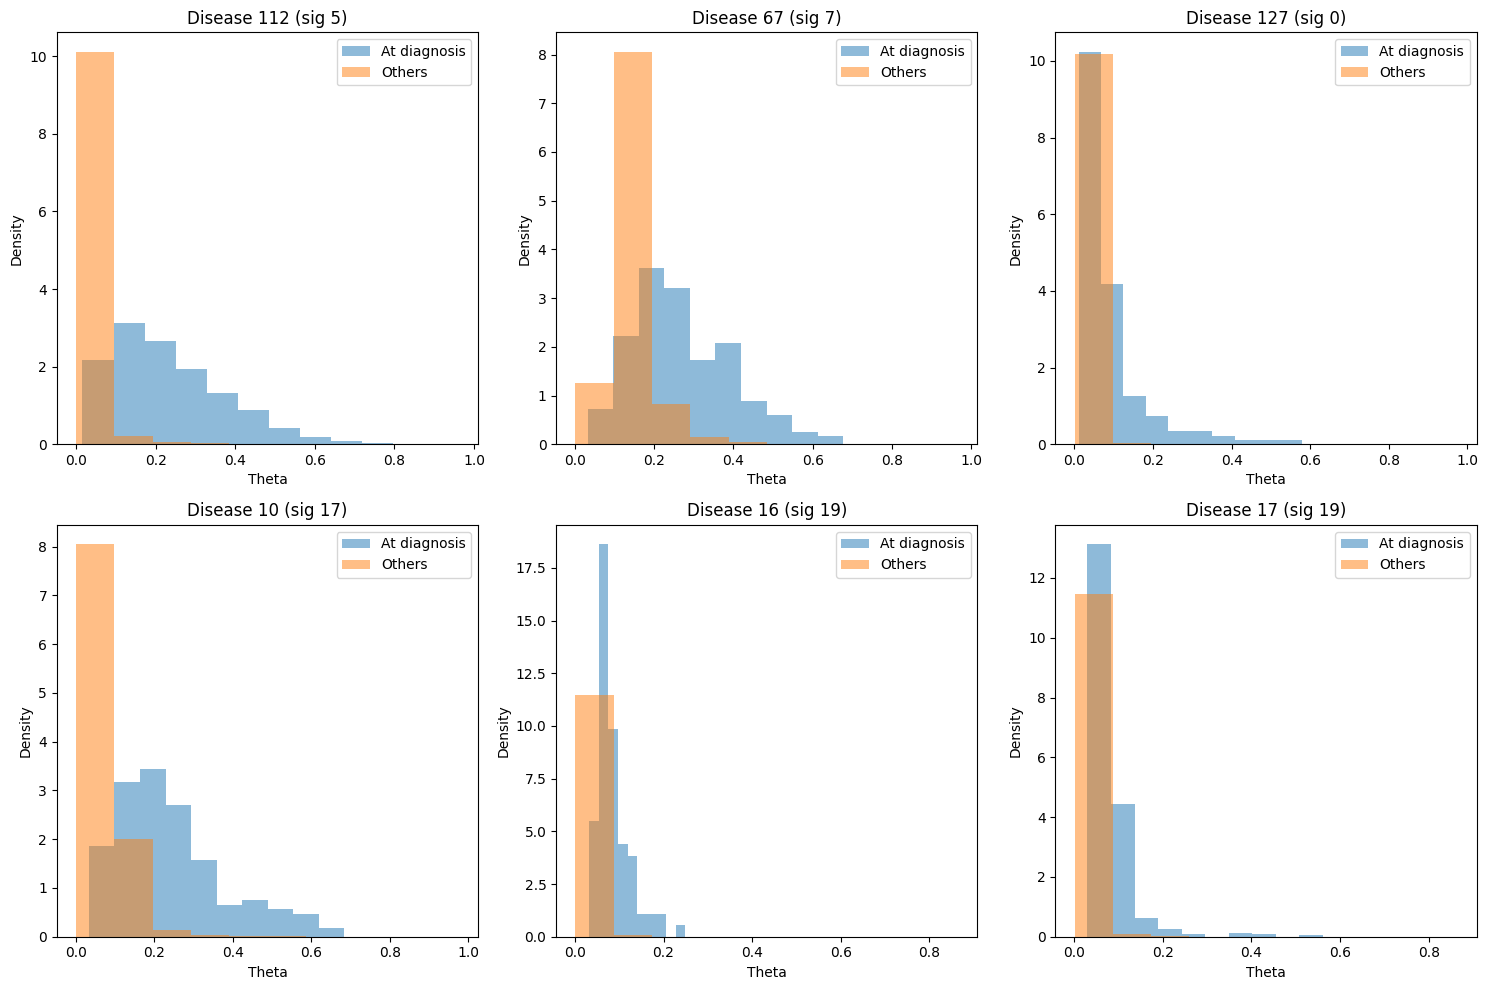

In [133]:
def plot_theta_differences():
    diseases = [112, 67, 127, 10, 16,17]
    signatures = [5, 7, 0, 17, 19,19]
    
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()
    
    for i, (d, sig) in enumerate(zip(diseases, signatures)):
        ax = axes[i]
        
        # Get diagnosis times
        diagnosis_mask = model.Y[:, d, :].bool()
        diagnosed = torch.where(diagnosis_mask)[0]
        
        # Get thetas
        pi, theta, phi_prob = model.forward()
        
        # Plot distributions
        diagnosed_theta = theta[diagnosis_mask, sig].detach().numpy()
        others_theta = theta[~diagnosis_mask, sig].detach().numpy()
        
        ax.hist(diagnosed_theta, alpha=0.5, label='At diagnosis', density=True)
        ax.hist(others_theta, alpha=0.5, label='Others', density=True)
        
        ax.set_title(f'Disease {d} (sig {sig})')
        ax.set_xlabel('Theta')
        ax.set_ylabel('Density')
        ax.legend()
    
    plt.tight_layout()
    plt.show()

plot_theta_differences()

In [134]:
clusters[15:18]

array([19, 19, 19], dtype=int32)

In [135]:

# Print genetic effects and top states
print("\nGenetic Effect Statistics for Sample Patients:")
for i, patient in enumerate(sample_patients):
    genetic_effects = model.genetic_scale * (model.G[patient] @ model.gamma).detach()
    print(f"\nPatient {patient}:")
    print(f"Mean shift: {genetic_effects.mean():.3f}")
    print(f"Std of shifts: {genetic_effects.std():.3f}")
    print(f"Range of shifts: [{genetic_effects.min():.3f}, {genetic_effects.max():.3f}]")
    
    # Print top states and their proportions
    patient_mean_props = mean_props[i]
    top_props, top_indices = patient_mean_props.topk(n_top_states)
    print("\nTop states and average proportions:")
    for state, prop in zip(top_indices, top_props):
        print(f"State {state.item()}: {prop:.3f}")


Genetic Effect Statistics for Sample Patients:

Patient 4376:
Mean shift: 0.000
Std of shifts: 0.000
Range of shifts: [-0.000, 0.000]

Top states and average proportions:
State 7: 0.165
State 3: 0.128
State 5: 0.104
State 17: 0.087
State 16: 0.073

Patient 6640:
Mean shift: 0.000
Std of shifts: 0.000
Range of shifts: [-0.000, 0.000]

Top states and average proportions:
State 7: 0.164
State 3: 0.161
State 8: 0.088
State 17: 0.083
State 16: 0.077


In [13]:
all_lambdas_load = np.load('all_lambdas_combined_smallg.npy')

In [14]:
all_lambdas_load[10,0,5]

np.float64(-4.75360631942749)

In [143]:
first_model['model_state_dict']['lambda_'][10,0,5]

tensor(-4.7536)

In [15]:
all_lambdas[10,0,5]

np.float64(-4.75360631942749)

In [16]:
all_phis.shape

(40, 21, 348, 52)

In [151]:
all_phis[0,:,0,5]

array([-12.39914 , -12.440428, -12.290112,  -9.755542, -12.512923,
       -12.502791, -12.578928, -12.566258, -12.516626, -12.499698,
       -12.473634, -12.496309, -12.464358, -12.463099, -12.458801,
       -12.548323, -12.343472, -12.460636, -12.386859, -12.599058,
       -15.598025], dtype=float32)

In [150]:
first_model['model_state_dict']['phi'][:,0,5]

tensor([-12.3991, -12.4404, -12.2901,  -9.7555, -12.5129, -12.5028, -12.5789,
        -12.5663, -12.5166, -12.4997, -12.4736, -12.4963, -12.4644, -12.4631,
        -12.4588, -12.5483, -12.3435, -12.4606, -12.3869, -12.5991, -15.5980])

In [4]:
# Load Gail risks
import pandas as pd
import time
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

def plot_roc_curve(y_true, y_pred, label):
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    plt.plot(fpr, tpr, label=label)

gail_df = pd.read_csv('/Users/sarahurbut/Dropbox (Personal)/gail_dat_ordered.csv')
#gail_df = pd.read_csv('/Users/sarahurbut/Dropbox/gail_dat_ordered.csv')


Starting calculations...
Total patients in gail_df: 400000
Number with valid Gail risks: 217299
Number with valid T1: 217458

Processing batch 1/40 (patients 0-10000)
Looking for: /Users/sarahurbut/Dropbox (Personal)/resultshighamp/results/output_0_10000/model.pt
Successfully loaded model


/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_47432/3503860375.py:40: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(model_path)



Batch summary:
Skipped due to missing T1: 4591
Skipped due to missing Gail risk: 3
Skipped due to insufficient horizon: 0
Successfully processed in this batch: 5406

Processing batch 2/40 (patients 10000-20000)
Looking for: /Users/sarahurbut/Dropbox (Personal)/resultshighamp/results/output_10000_20000/model.pt
Successfully loaded model

Batch summary:
Skipped due to missing T1: 4599
Skipped due to missing Gail risk: 7
Skipped due to insufficient horizon: 0
Successfully processed in this batch: 10800

Processing batch 3/40 (patients 20000-30000)
Looking for: /Users/sarahurbut/Dropbox (Personal)/resultshighamp/results/output_20000_30000/model.pt
Successfully loaded model

Batch summary:
Skipped due to missing T1: 4605
Skipped due to missing Gail risk: 4
Skipped due to insufficient horizon: 0
Successfully processed in this batch: 16191

Processing batch 4/40 (patients 30000-40000)
Looking for: /Users/sarahurbut/Dropbox (Personal)/resultshighamp/results/output_30000_40000/model.pt
Success

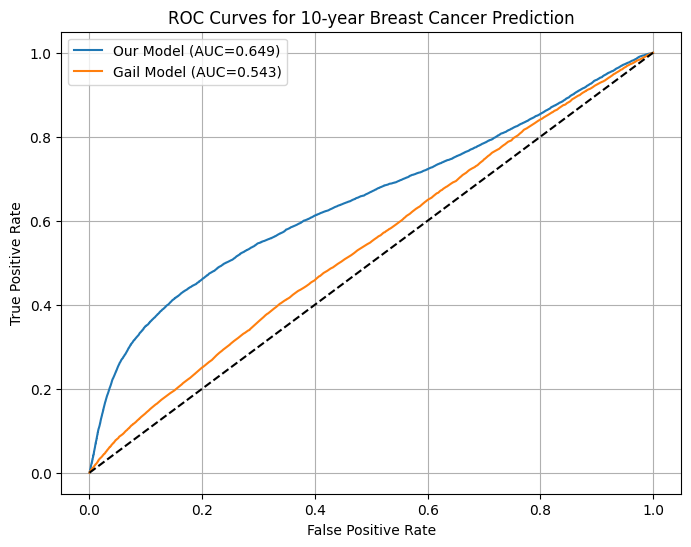

In [34]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn.functional as F
import time

## run without genetic effects
## only consider events that happened 5 or ten years after 

def plot_roc_curve(y_true, y_pred, label):
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    plt.plot(fpr, tpr, label=label)

def compare_with_gail(gail_df, breast_indices=[16,17], batch_size=10000):
    """
    Compare 10-year predictions, processing one batch at a time using model files
    """
    our_10yr_risks = []
    actual_10yr = []
    patient_indices = []
    
    print("Starting calculations...")
    print(f"Total patients in gail_df: {len(gail_df)}")
    print(f"Number with valid Gail risks: {sum(~np.isnan(gail_df['Gail_absRisk']))}")
    print(f"Number with valid T1: {sum(~np.isnan(gail_df['T1']))}")
    
    total_patients = len(gail_df)
    n_batches = (total_patients + batch_size - 1) // batch_size
    start_time = time.time()
    
    for batch in range(n_batches):
        start_idx = batch * batch_size
        end_idx = min((batch + 1) * batch_size, total_patients)
        
        # Updated path to correct location
        model_path = f'/Users/sarahurbut/Dropbox (Personal)/resultshighamp/results/output_{start_idx}_{end_idx}/model.pt'
        print(f"\nProcessing batch {batch+1}/{n_batches} (patients {start_idx}-{end_idx})")
        print(f"Looking for: {model_path}")
        
        try:
            # Load model for this batch
            model = torch.load(model_path)
            model_dict=model['model_state_dict']
            print(f"Successfully loaded model")
            
            # Get predictions and outcomes for this batch
            lambda_values = model_dict['lambda_']
            theta = torch.softmax(lambda_values, dim=1).detach().numpy()
            phi_raw = model_dict['phi']
            phi = torch.sigmoid(phi_raw).detach().numpy()
            Y_batch = model['Y'].numpy()
            
            # Calculate pi for this batch
            pi_batch = np.einsum('nkt,kdt->ndt', theta, phi)
            
            # Process each patient in batch
            batch_df = gail_df.iloc[start_idx:end_idx]
            skipped_t1 = 0
            skipped_gail = 0
            skipped_horizon = 0
            
            for i, row in enumerate(batch_df.itertuples()):
                if np.isnan(row.T1):
                    skipped_t1 += 1
                    continue
                if np.isnan(row.Gail_absRisk):
                    skipped_gail += 1
                    continue
                    
                enroll_time = int(row.T1 - 30)
                if enroll_time + 10 >= Y_batch.shape[2]:
                    skipped_horizon += 1
                    continue
                    
                pi_brca = pi_batch[i, breast_indices, enroll_time]
                yearly_risk = 1 - np.prod(1 - pi_brca)
                risk = 1 - (1 - yearly_risk)**10
                our_10yr_risks.append(risk)
                
                Y_brca = Y_batch[i, breast_indices, enroll_time:enroll_time+10]
                actual = np.any(Y_brca)
                actual_10yr.append(actual)
                patient_indices.append(start_idx + i)
            
            print(f"\nBatch summary:")
            print(f"Skipped due to missing T1: {skipped_t1}")
            print(f"Skipped due to missing Gail risk: {skipped_gail}")
            print(f"Skipped due to insufficient horizon: {skipped_horizon}")
            print(f"Successfully processed in this batch: {len(our_10yr_risks) - (len(patient_indices) - len(our_10yr_risks))}")
            
            # Clear memory
            del model_dict, theta, phi, pi_batch, Y_batch
            
        except FileNotFoundError:
            print(f"Warning: Could not find model file for batch {batch}")
            continue
    
    if len(our_10yr_risks) == 0:
        print("\nERROR: No valid predictions were made!")
        print("Please check the diagnostic information above.")
        return None, None, None
        
    # Convert to arrays
    our_10yr_risks = np.array(our_10yr_risks)
    actual_10yr = np.array(actual_10yr)
    patient_indices = np.array(patient_indices)
    
    # Print diagnostic information
    print("\nFinal Summary:")
    print(f"Total processing time: {(time.time() - start_time)/60:.2f} minutes")
    print(f"Number of predictions made: {len(our_10yr_risks)}")
    print(f"Number of actual events: {sum(actual_10yr)}")
    print(f"Event rate: {sum(actual_10yr)/len(actual_10yr)*100:.2f}%")
    
    # Get corresponding Gail risks

    # When getting Gail risks:
    gail_risks = gail_df.iloc[patient_indices]['Gail_absRisk'].values / 100

    print("\nRisk Ranges:")
    print(f"Our model risks: [{our_10yr_risks.min():.4f}, {our_10yr_risks.max():.4f}]")  # Should be same: ~[0.0002, 0.0572]
    print(f"Gail model risks: [{gail_risks.min():.4f}, {gail_risks.max():.4f}]")  # Now should be ~[0.004, 0.162]
        
    # Calculate ROC AUCs
    our_auc = roc_auc_score(actual_10yr, our_10yr_risks)
    gail_auc = roc_auc_score(actual_10yr, gail_risks)

    # Print results
    print(f"\nROC AUC Comparison (10-year prediction from enrollment):")
    print(f"Sample size: {len(our_10yr_risks)} cases")
    print(f"Our model: {our_auc:.3f}")
    print(f"Gail model: {gail_auc:.3f}")
    
    # Plot ROC curves
    plt.figure(figsize=(8,6))
    plot_roc_curve(actual_10yr, our_10yr_risks, 
                   label=f'Our Model (AUC={our_auc:.3f})')
    plot_roc_curve(actual_10yr, gail_risks, 
                   label=f'Gail Model (AUC={gail_auc:.3f})')
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for 10-year Breast Cancer Prediction')
    plt.legend()
    plt.grid(True)
    plt.show()

    return our_10yr_risks, actual_10yr, gail_risks

# Usage:
gail_df = pd.read_csv('/Users/sarahurbut/Dropbox (Personal)/gail_dat_ordered.csv')
our_risks, actual_outcomes, gail_risks = compare_with_gail(gail_df)

In [15]:
disease_names=essentials['disease_names']

In [19]:
   # Identify indices for digestive system cancers
digestive_cancer_indices = [
       disease_names.index("Colon cancer"),
       disease_names.index("Malignant neoplasm of rectum, rectosigmoid junction, and anus"),
       disease_names.index("Neoplasm of unspecified nature of digestive system"),
       disease_names.index("Secondary malignant neoplasm of digestive systems"),
       disease_names.index("Secondary malignant neoplasm of liver")
   ]
   
   # Analyze these as a group

import pandas as pd
import numpy as np
import torch
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt



Starting calculations...
Total patients in gail_df: 400000
Number with valid Gail risks: 217299
Number with valid T1: 217458

Processing batch 1/40 (patients 0-10000)
Looking for: /Users/sarahurbut/Dropbox/resultshighamp/results/output_0_10000/model.pt
Successfully loaded model


/var/folders/fl/ng5crz0x0fnb6c6x8dk7tfth0000gn/T/ipykernel_69053/1342526552.py:43: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(model_path)



Batch summary:
Skipped due to missing T1: 4591
Skipped due to missing Gail risk: 3
Skipped due to insufficient horizon: 0
Successfully processed in this batch: 5406

Processing batch 2/40 (patients 10000-20000)
Looking for: /Users/sarahurbut/Dropbox/resultshighamp/results/output_10000_20000/model.pt
Successfully loaded model

Batch summary:
Skipped due to missing T1: 4599
Skipped due to missing Gail risk: 7
Skipped due to insufficient horizon: 0
Successfully processed in this batch: 10800

Processing batch 3/40 (patients 20000-30000)
Looking for: /Users/sarahurbut/Dropbox/resultshighamp/results/output_20000_30000/model.pt
Successfully loaded model

Batch summary:
Skipped due to missing T1: 4605
Skipped due to missing Gail risk: 4
Skipped due to insufficient horizon: 0
Successfully processed in this batch: 16191

Processing batch 4/40 (patients 30000-40000)
Looking for: /Users/sarahurbut/Dropbox/resultshighamp/results/output_30000_40000/model.pt
Successfully loaded model

Batch summary

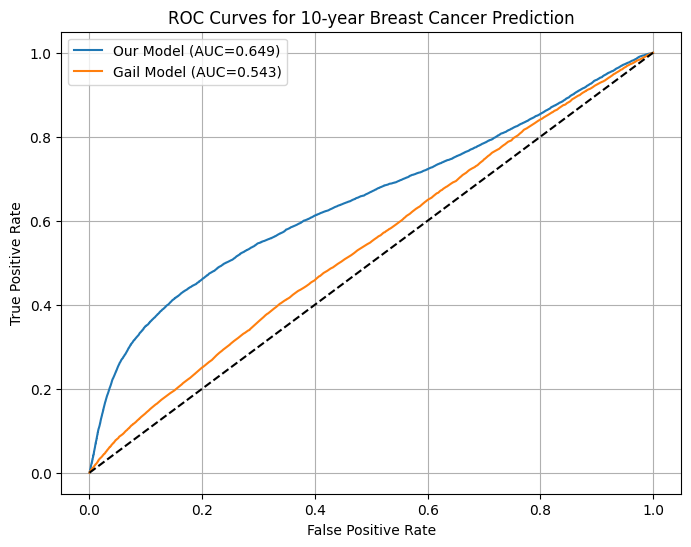

In [20]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn.functional as F
import time

## run without genetic effects
## only consider events that happened 5 or ten years after 

def plot_roc_curve(y_true, y_pred, label):
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    plt.plot(fpr, tpr, label=label)

def compare_with_gail(gail_df, breast_indices=[16,17], batch_size=10000):
    """
    Compare 10-year predictions, processing one batch at a time using model files
    """
    our_10yr_risks = []
    actual_10yr = []
    patient_indices = []
    
    print("Starting calculations...")
    print(f"Total patients in gail_df: {len(gail_df)}")
    print(f"Number with valid Gail risks: {sum(~np.isnan(gail_df['Gail_absRisk']))}")
    print(f"Number with valid T1: {sum(~np.isnan(gail_df['T1']))}")
    
    total_patients = len(gail_df)
    n_batches = (total_patients + batch_size - 1) // batch_size
    start_time = time.time()
    
    for batch in range(n_batches):
        start_idx = batch * batch_size
        end_idx = min((batch + 1) * batch_size, total_patients)
        
        # Updated path to correct location
        model_path = f'/Users/sarahurbut/Dropbox/resultshighamp/results/output_{start_idx}_{end_idx}/model.pt'
        print(f"\nProcessing batch {batch+1}/{n_batches} (patients {start_idx}-{end_idx})")
        print(f"Looking for: {model_path}")
        
        try:
            # Load model for this batch
            model = torch.load(model_path)
            model_dict=model['model_state_dict']
            print(f"Successfully loaded model")
            
            # Get predictions and outcomes for this batch
            lambda_values = model_dict['lambda_']
            theta = torch.softmax(lambda_values, dim=1).detach().numpy()
            phi_raw = model_dict['phi']
            phi = torch.sigmoid(phi_raw).detach().numpy()
            Y_batch = model['Y'].numpy()
            
            # Calculate pi for this batch
            pi_batch = np.einsum('nkt,kdt->ndt', theta, phi)
            
            # Process each patient in batch
            batch_df = gail_df.iloc[start_idx:end_idx]
            skipped_t1 = 0
            skipped_gail = 0
            skipped_horizon = 0
            
            for i, row in enumerate(batch_df.itertuples()):
                if np.isnan(row.T1):
                    skipped_t1 += 1
                    continue
                if np.isnan(row.Gail_absRisk):
                    skipped_gail += 1
                    continue
                    
                enroll_time = int(row.T1 - 30)
                if enroll_time + 10 >= Y_batch.shape[2]:
                    skipped_horizon += 1
                    continue
                    
                pi_brca = pi_batch[i, breast_indices, enroll_time]
                yearly_risk = 1 - np.prod(1 - pi_brca)
                risk = 1 - (1 - yearly_risk)**10
                our_10yr_risks.append(risk)
                
                Y_brca = Y_batch[i, breast_indices, enroll_time:enroll_time+10]
                actual = np.any(Y_brca)
                actual_10yr.append(actual)
                patient_indices.append(start_idx + i)
            
            print(f"\nBatch summary:")
            print(f"Skipped due to missing T1: {skipped_t1}")
            print(f"Skipped due to missing Gail risk: {skipped_gail}")
            print(f"Skipped due to insufficient horizon: {skipped_horizon}")
            print(f"Successfully processed in this batch: {len(our_10yr_risks) - (len(patient_indices) - len(our_10yr_risks))}")
            
            # Clear memory
            del model_dict, theta, phi, pi_batch, Y_batch
            
        except FileNotFoundError:
            print(f"Warning: Could not find model file for batch {batch}")
            continue
    
    if len(our_10yr_risks) == 0:
        print("\nERROR: No valid predictions were made!")
        print("Please check the diagnostic information above.")
        return None, None, None
        
    # Convert to arrays
    our_10yr_risks = np.array(our_10yr_risks)
    actual_10yr = np.array(actual_10yr)
    patient_indices = np.array(patient_indices)
    
    # Print diagnostic information
    print("\nFinal Summary:")
    print(f"Total processing time: {(time.time() - start_time)/60:.2f} minutes")
    print(f"Number of predictions made: {len(our_10yr_risks)}")
    print(f"Number of actual events: {sum(actual_10yr)}")
    print(f"Event rate: {sum(actual_10yr)/len(actual_10yr)*100:.2f}%")
    
    # Get corresponding Gail risks

    # When getting Gail risks:
    gail_risks = gail_df.iloc[patient_indices]['Gail_absRisk'].values / 100

    print("\nRisk Ranges:")
    print(f"Our model risks: [{our_10yr_risks.min():.4f}, {our_10yr_risks.max():.4f}]")  # Should be same: ~[0.0002, 0.0572]
    print(f"Gail model risks: [{gail_risks.min():.4f}, {gail_risks.max():.4f}]")  # Now should be ~[0.004, 0.162]
        
    # Calculate ROC AUCs
    our_auc = roc_auc_score(actual_10yr, our_10yr_risks)
    gail_auc = roc_auc_score(actual_10yr, gail_risks)

    # Print results
    print(f"\nROC AUC Comparison (10-year prediction from enrollment):")
    print(f"Sample size: {len(our_10yr_risks)} cases")
    print(f"Our model: {our_auc:.3f}")
    print(f"Gail model: {gail_auc:.3f}")
    
    # Plot ROC curves
    plt.figure(figsize=(8,6))
    plot_roc_curve(actual_10yr, our_10yr_risks, 
                   label=f'Our Model (AUC={our_auc:.3f})')
    plot_roc_curve(actual_10yr, gail_risks, 
                   label=f'Gail Model (AUC={gail_auc:.3f})')
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for 10-year Breast Cancer Prediction')
    plt.legend()
    plt.grid(True)
    plt.show()

    return our_10yr_risks, actual_10yr, gail_risks

# Usage:
gail_df = pd.read_csv('/Users/sarahurbut/Dropbox/gail_dat_ordered.csv')
our_risks, actual_outcomes, gail_risks = compare_with_gail(gail_df)

Starting pancreatic cancer analysis...
No specific pancreatic cancer found. Using broader categories...
Using broader category at index 12: Neoplasm of unspecified nature of digestive system
Using broader category at index 24: Malignant neoplasm, other
Using broader category at index 28: Secondary malignant neoplasm of digestive systems
Using broader category at index 35: Benign neoplasm of other parts of digestive system

Processing batch 1/10 (patients 0-10000)


/var/folders/fl/ng5crz0x0fnb6c6x8dk7tfth0000gn/T/ipykernel_69053/679799464.py:41: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(model_path)
/var/folders/f

Successfully loaded model

Batch summary:
Skipped due to missing T1: 4591
Skipped due to insufficient horizon: 0
Successfully processed in this batch: 5409

Processing batch 2/10 (patients 10000-20000)
Successfully loaded model

Batch summary:
Skipped due to missing T1: 4599
Skipped due to insufficient horizon: 0
Successfully processed in this batch: 10000

Processing batch 3/10 (patients 20000-30000)
Successfully loaded model

Batch summary:
Skipped due to missing T1: 4605
Skipped due to insufficient horizon: 0
Successfully processed in this batch: 20000

Processing batch 4/10 (patients 30000-40000)
Successfully loaded model

Batch summary:
Skipped due to missing T1: 4508
Skipped due to insufficient horizon: 0
Successfully processed in this batch: 30000

Processing batch 5/10 (patients 40000-50000)
Successfully loaded model

Batch summary:
Skipped due to missing T1: 4590
Skipped due to insufficient horizon: 0
Successfully processed in this batch: 40000

Processing batch 6/10 (patients

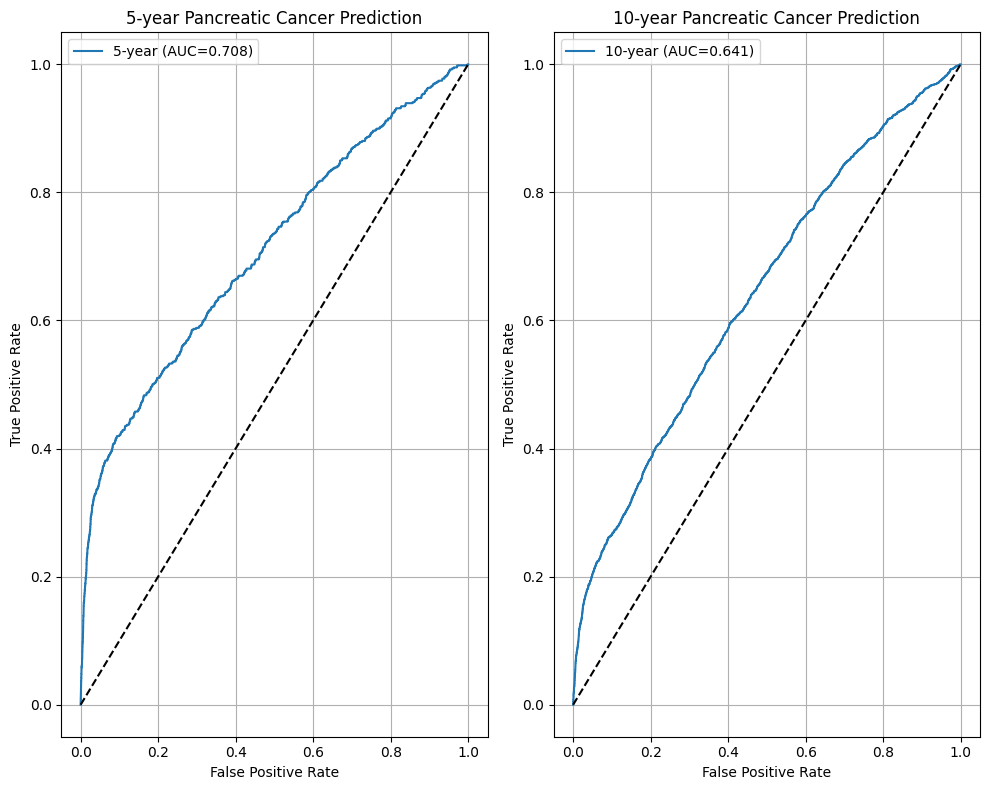

In [23]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn.functional as F
import time
import pandas as pd

def plot_roc_curve(y_true, y_pred, label):
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    plt.plot(fpr, tpr, label=label)

def analyze_pancreatic_cancer(patient_df, batch_size=10000, n_batches=10):
    """
    Analyze pancreatic cancer predictions, processing batches using model files
    
    Args:
        patient_df: DataFrame with patient information including enrollment age (T1)
        batch_size: Number of patients per batch
        n_batches: Maximum number of batches to process
    """
    # We'll need to identify pancreatic cancer in the disease list
    # For now, we'll use "Malignant neoplasm, other" and filter later
    # You may need to adjust these indices based on your actual data
    pancreatic_indices = []  # We'll identify this from the first batch
    
    our_5yr_risks = []
    our_10yr_risks = []
    actual_5yr = []
    actual_10yr = []
    patient_indices = []
    
    print("Starting pancreatic cancer analysis...")
    
    total_patients = len(patient_df)
    start_time = time.time()
    
    # First, let's identify pancreatic cancer in the disease list
    model_path = f'/Users/sarahurbut/Dropbox/resultshighamp/results/output_0_{batch_size}/model.pt'
    try:
        model = torch.load(model_path)
        disease_names = model['disease_names'][0].tolist()
        
        # Look for pancreatic cancer in disease names
        pancreatic_indices = []
        for i, name in enumerate(disease_names):
            if "pancrea" in str(name).lower() and "cancer" in str(name).lower():
                pancreatic_indices.append(i)
                print(f"Found pancreatic cancer at index {i}: {name}")
        
        # If not found directly, use broader categories
        if not pancreatic_indices:
            print("No specific pancreatic cancer found. Using broader categories...")
            # Use "Malignant neoplasm, other" and "Neoplasm of unspecified nature of digestive system"
            for i, name in enumerate(disease_names):
                if ("malignant neoplasm" in str(name).lower() and "other" in str(name).lower()) or \
                   ("neoplasm" in str(name).lower() and "digestive" in str(name).lower()):
                    pancreatic_indices.append(i)
                    print(f"Using broader category at index {i}: {name}")
        
        if not pancreatic_indices:
            print("ERROR: Could not identify pancreatic cancer in disease list!")
            return None, None, None
            
    except Exception as e:
        print(f"Error loading first batch: {str(e)}")
        return None, None, None
    
    # Process each batch
    for batch in range(n_batches):
        start_idx = batch * batch_size
        end_idx = min((batch + 1) * batch_size, total_patients)
        
        model_path = f'/Users/sarahurbut/Dropbox/resultshighamp/results/output_{start_idx}_{end_idx}/model.pt'
        print(f"\nProcessing batch {batch+1}/{n_batches} (patients {start_idx}-{end_idx})")
        
        try:
            # Load model for this batch
            model = torch.load(model_path)
            model_dict = model['model_state_dict']
            print(f"Successfully loaded model")
            
            # Get predictions and outcomes for this batch
            lambda_values = model_dict['lambda_']
            theta = torch.softmax(lambda_values, dim=1).detach().numpy()
            phi_raw = model_dict['phi']
            phi = torch.sigmoid(phi_raw).detach().numpy()
            Y_batch = model['Y'].numpy()
            
            # Calculate pi for this batch
            pi_batch = np.einsum('nkt,kdt->ndt', theta, phi)
            
            # Process each patient in batch
            batch_df = patient_df.iloc[start_idx:end_idx] if start_idx < len(patient_df) else None
            if batch_df is None or len(batch_df) == 0:
                print(f"Skipping batch {batch+1} - no patients in range")
                continue
                
            skipped_t1 = 0
            skipped_horizon = 0
            
            for i in range(len(batch_df)):
                # Get enrollment age (T1)
                if 'T1' in batch_df.columns:
                    if i >= len(batch_df) or pd.isna(batch_df.iloc[i]['T1']):
                        skipped_t1 += 1
                        continue
                    enroll_time = int(batch_df.iloc[i]['T1'] - 30)
                else:
                    # If no T1 column, assume age 50 as enrollment
                    enroll_time = 20  # Age 50 (30+20)
                
                # Check if we have enough follow-up time
                if enroll_time + 10 >= Y_batch.shape[2]:
                    skipped_horizon += 1
                    continue
                
                # Calculate 5-year and 10-year risks
                pi_pancreatic = pi_batch[i, pancreatic_indices, enroll_time]
                yearly_risk = 1 - np.prod(1 - pi_pancreatic)
                
                risk_5yr = 1 - (1 - yearly_risk)**5
                risk_10yr = 1 - (1 - yearly_risk)**10
                
                our_5yr_risks.append(risk_5yr)
                our_10yr_risks.append(risk_10yr)
                
                # Get actual outcomes
                Y_pancreatic_5yr = Y_batch[i, pancreatic_indices, enroll_time:enroll_time+5]
                Y_pancreatic_10yr = Y_batch[i, pancreatic_indices, enroll_time:enroll_time+10]
                
                actual_5yr.append(np.any(Y_pancreatic_5yr))
                actual_10yr.append(np.any(Y_pancreatic_10yr))
                patient_indices.append(start_idx + i)
            
            print(f"\nBatch summary:")
            print(f"Skipped due to missing T1: {skipped_t1}")
            print(f"Skipped due to insufficient horizon: {skipped_horizon}")
            print(f"Successfully processed in this batch: {len(our_10yr_risks) - (0 if batch == 0 else len(patient_indices) - (batch * batch_size))}")
            
            # Clear memory
            del model_dict, theta, phi, pi_batch, Y_batch
            
        except FileNotFoundError:
            print(f"Warning: Could not find model file for batch {batch}")
            continue
        except Exception as e:
            print(f"Error processing batch {batch}: {str(e)}")
            continue
    
    if len(our_10yr_risks) == 0:
        print("\nERROR: No valid predictions were made!")
        return None, None, None
        
    # Convert to arrays
    our_5yr_risks = np.array(our_5yr_risks)
    our_10yr_risks = np.array(our_10yr_risks)
    actual_5yr = np.array(actual_5yr)
    actual_10yr = np.array(actual_10yr)
    patient_indices = np.array(patient_indices)
    
    # Print diagnostic information
    print("\nFinal Summary:")
    print(f"Total processing time: {(time.time() - start_time)/60:.2f} minutes")
    print(f"Number of predictions made: {len(our_10yr_risks)}")
    print(f"Number of 5-year events: {sum(actual_5yr)}")
    print(f"Number of 10-year events: {sum(actual_10yr)}")
    print(f"5-year event rate: {sum(actual_5yr)/len(actual_5yr)*100:.2f}%")
    print(f"10-year event rate: {sum(actual_10yr)/len(actual_10yr)*100:.2f}%")
    
    # Calculate ROC AUCs
    auc_5yr = roc_auc_score(actual_5yr, our_5yr_risks)
    auc_10yr = roc_auc_score(actual_10yr, our_10yr_risks)

    # Print results
    print(f"\nROC AUC Results:")
    print(f"Sample size: {len(our_10yr_risks)} cases")
    print(f"5-year prediction AUC: {auc_5yr:.3f}")
    print(f"10-year prediction AUC: {auc_10yr:.3f}")
    
    # Plot ROC curves
    plt.figure(figsize=(10,8))
    
    plt.subplot(1,2,1)
    plot_roc_curve(actual_5yr, our_5yr_risks, label=f'5-year (AUC={auc_5yr:.3f})')
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('5-year Pancreatic Cancer Prediction')
    plt.legend()
    plt.grid(True)
    
    plt.subplot(1,2,2)
    plot_roc_curve(actual_10yr, our_10yr_risks, label=f'10-year (AUC={auc_10yr:.3f})')
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('10-year Pancreatic Cancer Prediction')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

    return our_5yr_risks, our_10yr_risks, actual_5yr, actual_10yr, patient_indices

# Usage:
# If you have the same patient dataframe as before:
patient_df = pd.read_csv('/Users/sarahurbut/Dropbox/gail_dat_ordered.csv')
results = analyze_pancreatic_cancer(patient_df)

/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_95584/2582754946.py:16: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  first_model = torch.load('/Users/sarahurbut/

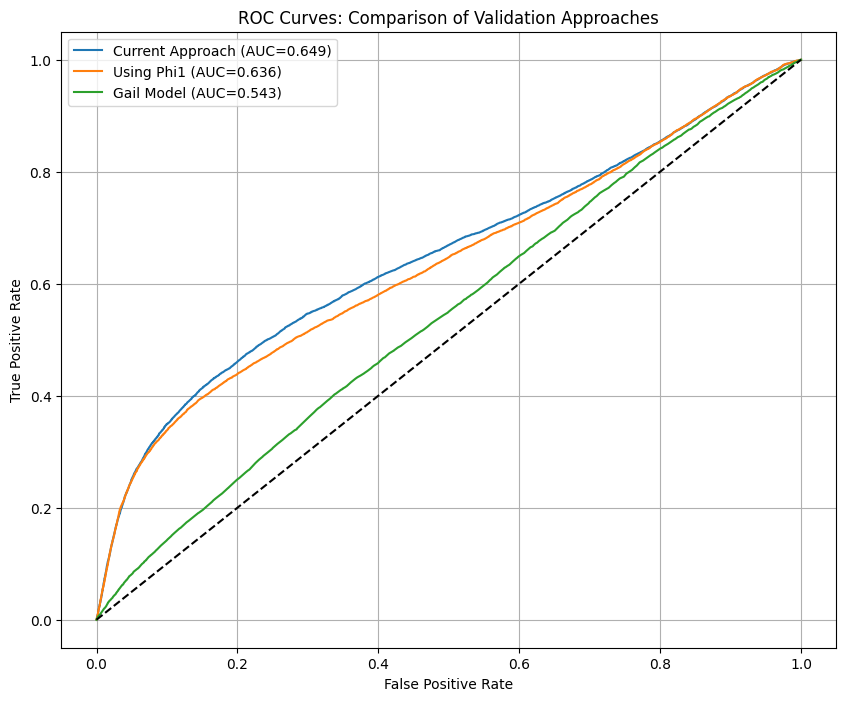

In [7]:
c=compare_validation_approaches(gail_df, breast_indices=[16,17], batch_size=10000)

In [ ]:
def compare_validation_approaches(gail_df, breast_indices=[16,17], batch_size=10000):
    """
    Compare two validation approaches:
    1. Our current approach: Use lambda_batch with phi_other
    2. Traditional CV: Use phi_1 to calculate all lambdas
    """
    # Storage for both approaches
    current_risks = []
    cv_risks = []
    actual_outcomes = []
    patient_indices = []
    
    # First load phi from batch 1 to use for traditional CV
    first_model = torch.load('/Users/sarahurbut/Dropbox/resultshighamp/results/output_0_10000/model.pt')
    phi_1 = torch.sigmoid(first_model['model_state_dict']['phi']).detach().numpy()
    
    total_patients = len(gail_df)
    n_batches = (total_patients + batch_size - 1) // batch_size
    start_time = time.time()
    
    for batch in range(n_batches):
        start_idx = batch * batch_size
        end_idx = min((batch + 1) * batch_size, total_patients)
        
        try:
            # Load current batch model
            model_path = f'/Users/sarahurbut/Dropbox/resultshighamp/results/output_{start_idx}_{end_idx}/model.pt'
            model = torch.load(model_path)
            model_dict = model['model_state_dict']
            
            # Load next batch for phi (our current approach)
            next_batch = (batch + 1) % n_batches
            next_model_path = f'/Users/sarahurbut/Dropbox/resultshighamp/results/output_{next_batch*batch_size}_{min((next_batch+1)*batch_size, total_patients)}/model.pt'
            next_model = torch.load(next_model_path)
            phi_next = torch.sigmoid(next_model['model_state_dict']['phi']).detach().numpy()
            
            # Get current batch data
            lambda_values = model_dict['lambda_']
            theta = torch.softmax(lambda_values, dim=1).detach().numpy()
            Y_batch = model['Y'].numpy()
            
            # Calculate risks using both approaches
            batch_df = gail_df.iloc[start_idx:end_idx]
            
            for i, row in enumerate(batch_df.itertuples()):
                if np.isnan(row.T1) or np.isnan(row.Gail_absRisk):
                    continue
                    
                enroll_time = int(row.T1 - 30)
                if enroll_time + 10 >= Y_batch.shape[2]:
                    continue
                
                # Current approach (using next batch's phi)
                pi_current = np.einsum('kt,kdt->dt', theta[i], phi_next)
                pi_brca_current = pi_current[breast_indices, enroll_time]
                yearly_risk_current = 1 - np.prod(1 - pi_brca_current)
                risk_current = 1 - (1 - yearly_risk_current)**10
                
                # Traditional CV approach (using phi_1)
                pi_cv = np.einsum('kt,kdt->dt', theta[i], phi_1)
                pi_brca_cv = pi_cv[breast_indices, enroll_time]
                yearly_risk_cv = 1 - np.prod(1 - pi_brca_cv)
                risk_cv = 1 - (1 - yearly_risk_cv)**10
                
                # Store results
                current_risks.append(risk_current)
                cv_risks.append(risk_cv)
                
                # Store actual outcome
                Y_brca = Y_batch[i, breast_indices, enroll_time:enroll_time+10]
                actual_outcomes.append(np.any(Y_brca))
                patient_indices.append(start_idx + i)
                
        except FileNotFoundError:
            print(f"Warning: Could not find model file for batch {batch}")
            continue
    
    # Convert to arrays
    current_risks = np.array(current_risks)
    cv_risks = np.array(cv_risks)
    actual_outcomes = np.array(actual_outcomes)
    
    # Calculate AUCs
    current_auc = roc_auc_score(actual_outcomes, current_risks)
    cv_auc = roc_auc_score(actual_outcomes, cv_risks)
    gail_risks = gail_df.iloc[patient_indices]['Gail_absRisk'].values / 100
    gail_auc = roc_auc_score(actual_outcomes, gail_risks)
    
    # Plot ROC curves
    plt.figure(figsize=(10,8))
    plot_roc_curve(actual_outcomes, current_risks, 
                   label=f'Current Approach (AUC={current_auc:.3f})')
    plot_roc_curve(actual_outcomes, cv_risks, 
                   label=f'Traditional CV (AUC={cv_auc:.3f})')
    plot_roc_curve(actual_outcomes, gail_risks, 
                   label=f'Gail Model (AUC={gail_auc:.3f})')
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves: Comparison of Validation Approaches')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return current_risks, cv_risks, actual_outcomes, gail_risks

# Run the comparison
current_risks, cv_risks, actual_outcomes, gail_risks = compare_validation_approaches(gail_df)

In [158]:

# Original method from conversion_lambdas.ipynb
def softmax_full(x):
    """Original softmax computation"""
    x_reshaped = x.transpose(0, 2, 1).reshape(-1, x.shape[1])  # Reshape to (N*T, K)
    e_x = np.exp(x_reshaped - np.max(x_reshaped, axis=1, keepdims=True))
    softmax_x = e_x / np.sum(e_x, axis=1, keepdims=True)
    return softmax_x.reshape(x.shape[0], x.shape[2], x.shape[1]).transpose(0, 2, 1)

# New method we were using
def torch_softmax(x):
    return torch.softmax(torch.tensor(x), dim=1)

# Compare the two methods
all_thetas = softmax_full(all_lambdas)
sample_lambda = all_lambdas[7:8]  # Keep dimensions with unsqueeze
sample_theta = torch_softmax(sample_lambda)

print("Original method (index 7, time 1):")
print(all_thetas[7, :, 1])
print("\nNew method (same slice):")
print(sample_theta[0, :, 1])

Original method (index 7, time 1):
[0.00576896 0.0575235  0.03934403 0.35249971 0.0249128  0.00379125
 0.00069435 0.06990904 0.1734644  0.03050785 0.00353553 0.00181031
 0.00734494 0.01153698 0.00556121 0.00554104 0.04002468 0.08852668
 0.01271005 0.05938774 0.00560494]

New method (same slice):
tensor([0.0058, 0.0575, 0.0393, 0.3525, 0.0249, 0.0038, 0.0007, 0.0699, 0.1735,
        0.0305, 0.0035, 0.0018, 0.0073, 0.0115, 0.0056, 0.0055, 0.0400, 0.0885,
        0.0127, 0.0594, 0.0056], dtype=torch.float64)


In [58]:
def softmax(x):
    """
    Compute softmax values for each set of scores in x.
    x shape: (n_individuals, n_signatures, n_timepoints)
    """
    # Reshape to (n_individuals * n_timepoints, n_signatures)
    x_reshaped = x.transpose(0, 2, 1).reshape(-1, x.shape[1])
    
    # Compute softmax
    e_x = np.exp(x_reshaped - np.max(x_reshaped, axis=1, keepdims=True))
    softmax_x = e_x / np.sum(e_x, axis=1, keepdims=True)
    
    # Reshape back to original shape
    return softmax_x.reshape(x.shape[0], x.shape[2], x.shape[1]).transpose(0, 2, 1)

# Calculate thetas using softmax
all_thetas = softmax(all_lambdas)  # shape: (400000, 20, 52)

# Calculate AUC
timepoints = np.arange(52)
theta_aucs = np.array([np.trapz(all_thetas[:, s, :], timepoints) for s in range(21)]).T


/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_24758/1460757963.py:21: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  theta_aucs = np.array([np.trapz(all_thetas[:, s, :], timepoints) for s in range(21)]).T


In [59]:
K=all_lambdas.shape[1]

In [152]:
import numpy as np
import torch

# Calculate thetas for all individuals
print("Calculating thetas...")
all_thetas = torch.softmax(torch.tensor(all_lambdas), dim=1).numpy()

# Calculate AUC for each person and signature
print("Calculating AUCs...")
timepoints = np.arange(52)
theta_aucs = np.array([np.trapz(all_thetas[:, s, :], timepoints) for s in range(K)]).T


Calculating thetas...
Calculating AUCs...


/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_24758/3378791062.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  theta_aucs = np.array([np.trapz(all_thetas[:, s, :], timepoints) for s in range(K)]).T


In [155]:
theta_aucs[0,:]

array([1.33857496, 4.31766541, 3.28828969, 7.94979099, 0.56797727,
       2.26322646, 0.43305001, 7.85627137, 4.59252193, 1.54257865,
       1.40859449, 0.40075818, 0.44250852, 1.12682462, 1.49376224,
       0.75614175, 3.85412421, 4.06986347, 0.89345715, 2.10140805,
       0.30261057])

In [156]:
# 1. Verify thetas sum to 1 at given timepoints
sample_people = [0, 100, 399999]  # First, middle, and last person
sample_timepoints = [0, 25, 51]   # First, middle, and last timepoint

print("Verifying theta sums and softmax calculations:")
for person in sample_people:
    print(f"\nPerson {person}:")
    
    for t in sample_timepoints:
        # Check sum to 1
        theta_sum = np.sum(all_thetas[person, :, t])
        print(f"\nTimepoint {t}:")
        print(f"Sum of thetas: {theta_sum:.6f}")
        
        # Compare with direct softmax calculation
        direct_softmax = torch.softmax(torch.tensor(all_lambdas[person, :, t]), dim=0).numpy()
        match = np.allclose(all_thetas[person, :, t], direct_softmax)
        print(f"Matches direct softmax calculation: {match}")
        
        if not match:
            print("Max difference:", np.max(np.abs(all_thetas[person, :, t] - direct_softmax)))

Verifying theta sums and softmax calculations:

Person 0:

Timepoint 0:
Sum of thetas: 1.000000
Matches direct softmax calculation: True

Timepoint 25:
Sum of thetas: 1.000000
Matches direct softmax calculation: True

Timepoint 51:
Sum of thetas: 1.000000
Matches direct softmax calculation: True

Person 100:

Timepoint 0:
Sum of thetas: 1.000000
Matches direct softmax calculation: True

Timepoint 25:
Sum of thetas: 1.000000
Matches direct softmax calculation: True

Timepoint 51:
Sum of thetas: 1.000000
Matches direct softmax calculation: True

Person 399999:

Timepoint 0:
Sum of thetas: 1.000000
Matches direct softmax calculation: True

Timepoint 25:
Sum of thetas: 1.000000
Matches direct softmax calculation: True

Timepoint 51:
Sum of thetas: 1.000000
Matches direct softmax calculation: True


In [157]:
Y.shape

torch.Size([407878, 348, 52])

In [63]:

# Create REGENIE phenotype file
# Print dimensions to verify
print(f"Number of patient IDs: {len(patient_ids)}")  # Should be 407878
print(f"Number of theta AUCs: {len(theta_aucs)}")    # Should match patient_ids
# Create mapping of processed IDs
processed_ids = patient_ids[:400000]  # Get just the first 400K IDs we processed

# Create REGENIE phenotype file with correct number of individuals
# Create REGENIE phenotype file
output_file = 'signature_auc_phenotypes_unnormalized_smallg.txt'
with open(output_file, 'w') as f:
    # Write header
    header = ['FID', 'IID'] + [f'SIG{i}_AUC' for i in range(K)]
    f.write('\t'.join(header) + '\n')
    
    # Write data only for the first 400K individuals
    for i in range(len(processed_ids)):
        fid = processed_ids[i]
        iid = processed_ids[i]
        aucs = theta_aucs[i]
        
        line = [str(fid), str(iid)] + [f"{x:.6f}" for x in aucs]
        f.write('\t'.join(line) + '\n')

# Print verification
print("\nVerification:")
print(f"Number of processed IDs: {len(processed_ids)}")
print(f"First few IDs: {processed_ids[:5]}")
print(f"Last few IDs: {processed_ids[-5:]}")

Number of patient IDs: 407878
Number of theta AUCs: 400000

Verification:
Number of processed IDs: 400000
First few IDs: ['1000015' '1000023' '1000037' '1000042' '1000059']
Last few IDs: ['5929605' '5929616' '5929627' '5929638' '5929643']


In [64]:
theta_aucs[0,:]

array([1.33857496, 4.31766541, 3.28828969, 7.94979099, 0.56797727,
       2.26322646, 0.43305001, 7.85627137, 4.59252193, 1.54257865,
       1.40859449, 0.40075818, 0.44250852, 1.12682462, 1.49376224,
       0.75614175, 3.85412421, 4.06986347, 0.89345715, 2.10140805,
       0.30261057])

In [65]:
print(f"Number of patient IDs: {len(patient_ids)}")
print(f"Number of theta AUCs: {len(theta_aucs)}")

Number of patient IDs: 407878
Number of theta AUCs: 400000


In [68]:
processed_ids[0]

np.str_('1000015')


Signature 8 AUC: 4.593
Mean theta: 0.090

Signature 7 AUC: 7.856
Mean theta: 0.153

Signature 3 AUC: 7.950
Mean theta: 0.157


/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_24758/1293083296.py:28: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  auc = np.trapz(thetas_person[sig], timepoints)


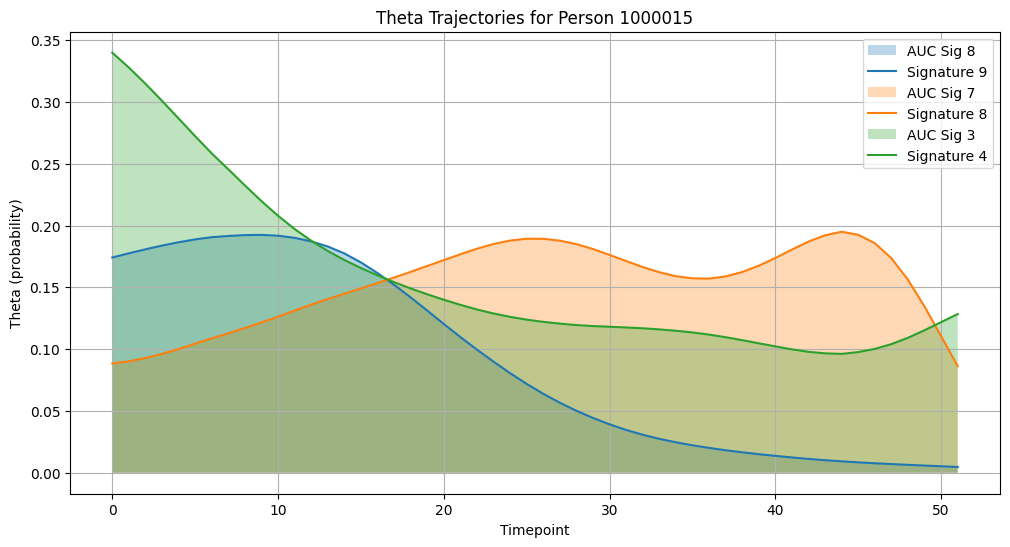

In [69]:
import matplotlib.pyplot as plt

# Take one person as an example
person_idx = 0

# Calculate thetas for this person
thetas_person = torch.softmax(torch.tensor(all_lambdas[person_idx]), dim=0).numpy()

# Plot trajectories for a few signatures
plt.figure(figsize=(12, 6))
timepoints = np.arange(52)

# Plot top 3 signatures by max value
top_sigs = np.argsort(np.mean(thetas_person, axis=1))[-3:]

for sig in top_sigs:
    plt.fill_between(timepoints, 0, thetas_person[sig], alpha=0.3, label=f'AUC Sig {sig}')
    plt.plot(timepoints, thetas_person[sig], label=f'Signature {sig+1}')

plt.title(f'Theta Trajectories for Person {patient_ids[person_idx]}')
plt.xlabel('Timepoint')
plt.ylabel('Theta (probability)')
plt.legend()
plt.grid(True)

# Calculate and print AUCs for these signatures
for sig in top_sigs:
    auc = np.trapz(thetas_person[sig], timepoints)
    print(f"\nSignature {sig} AUC: {auc:.3f}")
    print(f"Mean theta: {np.mean(thetas_person[sig]):.3f}")

In [70]:
len(patient_ids)

407878

In [71]:
patient_ids[0:5]

array(['1000015', '1000023', '1000037', '1000042', '1000059'], dtype='<U7')

In [72]:
import pandas as pd
# Convert R dataframe to pandas
bpc_pd = pd.DataFrame({
    'identifier': robjects.r.rownames(bpc),
    'sex': np.array(bpc.rx2('f.31.0.0')),
    'birth_year': np.array(bpc.rx2('f.34.0.0')),
    'enrollment': np.array(bpc.rx2('f.53.0.0'))
})

# Add PCs
for i in range(1, 41):  # assuming 40 PCs
    col_name = f'f.22009.0.{i}'
    if col_name in bpc.names:
        bpc_pd[f'PC{i}'] = np.array(bpc.rx2(col_name))


In [73]:
import pandas as pd

In [74]:
# Check format of patient_ids
print("Patient IDs format:")
print("First 5 patient_ids:", patient_ids[:5])
print("Type of first ID:", type(patient_ids[0]))

# Check format of BPC IDs
print("\nBPC IDs format:")
print("First 5 BPC IDs:", bpc_pd['identifier'].head().values)
print("Type of first BPC ID:", type(bpc_pd['identifier'].iloc[0]))

# Let's look at the full BPC data structure
print("\nBPC DataFrame head:")
print(bpc_pd.head())

# Check if there are any formatting differences
print("\nSample ID comparisons:")
print("Patient ID example:", patient_ids[0])
print("BPC ID example:", bpc_pd['identifier'].iloc[0])
print("Patient ID length:", len(str(patient_ids[0])))
print("BPC ID length:", len(str(bpc_pd['identifier'].iloc[0])))

# Try printing the R object structure
print("\nR object structure:")
print(robjects.r.str(bpc))

Patient IDs format:
First 5 patient_ids: ['1000015' '1000023' '1000037' '1000042' '1000059']
Type of first ID: <class 'numpy.str_'>

BPC IDs format:
First 5 BPC IDs: ['1' '2' '3' '4' '5']
Type of first BPC ID: <class 'str'>

BPC DataFrame head:
  identifier sex  birth_year  enrollment       PC1      PC2       PC3  \
0          1   1        1938  2008-07-23 -12.02340  3.25100  1.224590   
1          2   1        1963  2008-09-11 -14.07040  2.83809 -1.709870   
2          3   0        1939  2009-01-22 -15.00630  4.03881 -1.711670   
3          4   1        1942  2009-11-13 -12.08720  6.29019 -1.486040   
4          5   0        1954  2009-05-20  -9.58886  3.77243  0.274298   

        PC4      PC5       PC6  ...     PC31     PC32      PC33      PC34  \
0  4.776840  2.31802  2.445040  ... -2.93831 -6.00180  1.427810  0.048215   
1 -0.782455 -7.93571 -2.176480  ...  2.92506  2.69514 -0.676219 -0.874275   
2  6.200160 -2.77040  0.809991  ... -1.52633  5.36257  1.691210 -0.595323   
3 -3.426

In [76]:
# Convert tensors to numpy for easier manipulation
Y_np = Y.numpy()
all_lambdas = np.load('all_lambdas_combined.npy')

def find_diagnosis_peaks(patient_idx, all_lambdas, Y_np):
    """
    Find cases where lambda peaks near diagnosis times
    """
    # Get patient's diagnoses and lambdas
    patient_Y = Y_np[patient_idx]
    patient_lambdas = all_lambdas[patient_idx]
    
    # Find times when any diagnosis occurred
    diagnosis_times = np.where(patient_Y.sum(axis=0) > 0)[0]
    
    if len(diagnosis_times) > 0:
        print(f"\nPatient {patient_idx}:")
        print(f"Diagnoses at times: {diagnosis_times}")
        
        # Look at lambda peaks around these times
        for t in diagnosis_times:
            # Get window around diagnosis
            t_start = max(0, t-5)
            t_end = min(52, t+5)
            
            # Look at lambda peaks in this window
            lambda_peaks = np.argmax(patient_lambdas[:, t_start:t_end], axis=1) + t_start
            print(f"Lambda peaks near t={t}: {lambda_peaks}")
            
            # Which diseases were diagnosed at this time?
            diseases = np.where(patient_Y[:,t] > 0)[0]
            print(f"Diseases diagnosed at t={t}: {diseases}")
            
            # Print lambda values around diagnosis
            print(f"Lambda values around t={t}:")
            for k in range(all_lambdas.shape[1]):  # for each signature
                print(f"Signature {k}: {patient_lambdas[k, t_start:t_end]}")

# Try with first few patients who have diagnoses
count = 0
for idx in range(1000):
    if Y_np[idx].sum() > 0:  # Only look at patients with any diagnoses
        find_diagnosis_peaks(idx, all_lambdas, Y_np)
        count += 1
        if count >= 5:  # Look at 5 examples first
            break


Patient 0:
Diagnoses at times: [44]
Lambda peaks near t=44: [48 39 39 48 39 39 48 39 39 48 48 48 39 39 48 39 48 39 39 48 48]
Diseases diagnosed at t=44: [161 326]
Lambda values around t=44:
Signature 0: [-2.93212271 -2.87407184 -2.81744719 -2.7637825  -2.71335459 -2.6649797
 -2.61548305 -2.5654614  -2.51618719 -2.46789908]
Signature 1: [-2.2953651  -2.3234241  -2.3525207  -2.38212919 -2.41194367 -2.44204307
 -2.47395635 -2.50688195 -2.54001355 -2.57321262]
Signature 2: [-2.28764009 -2.30561948 -2.3238554  -2.34174871 -2.35918832 -2.37643528
 -2.39665031 -2.41832304 -2.43975329 -2.46096158]
Signature 3: [-2.10707569 -2.09544182 -2.08044505 -2.06238842 -2.04157209 -2.0189395
 -1.99394202 -1.97030127 -1.94821346 -1.92796206]
Signature 4: [-5.38233471 -5.44309092 -5.50530624 -5.56928205 -5.6315093  -5.68993711
 -5.74382305 -5.79723263 -5.85122204 -5.9056201 ]
Signature 5: [-1.17688894 -1.18674242 -1.1979816  -1.21121848 -1.22592103 -1.24194646
 -1.26304674 -1.28753734 -1.31363499 -1.34123

/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_24758/607642924.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  first_model = torch.load(os.path.join(base_dir


Looking at Signature 5
Diseases in this signature: [np.str_('Hypercholesterolemia'), np.str_('Unstable angina (intermediate coronary syndrome)'), np.str_('Myocardial infarction'), np.str_('Angina pectoris'), np.str_('Coronary atherosclerosis'), np.str_('Other chronic ischemic heart disease, unspecified'), np.str_('Other acute and subacute forms of ischemic heart disease')]
Found 5 interesting cases


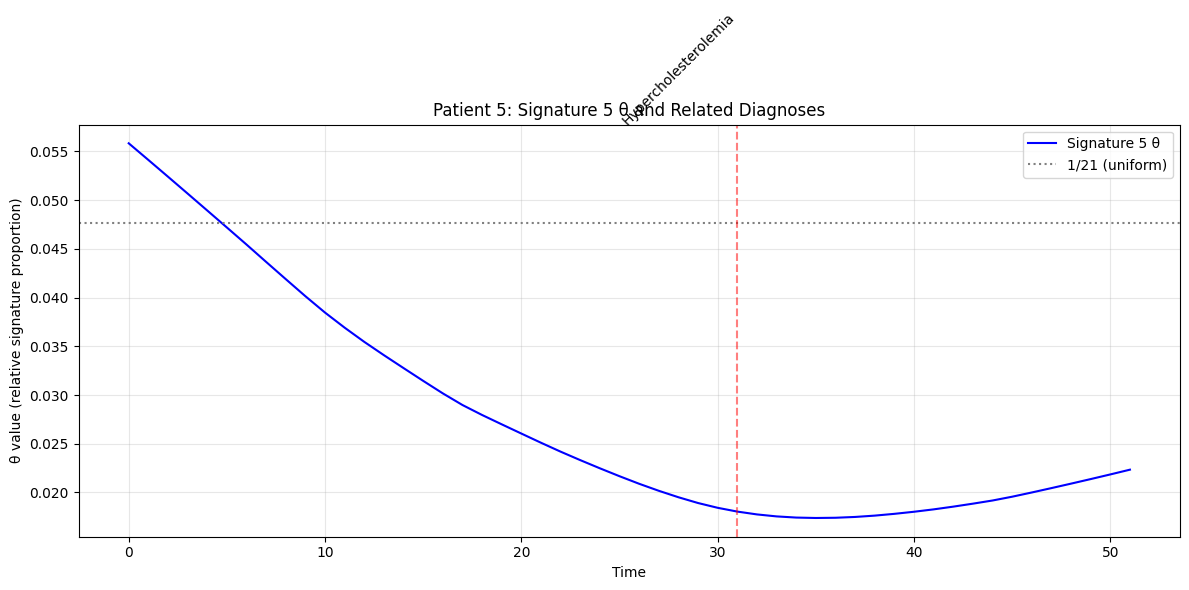

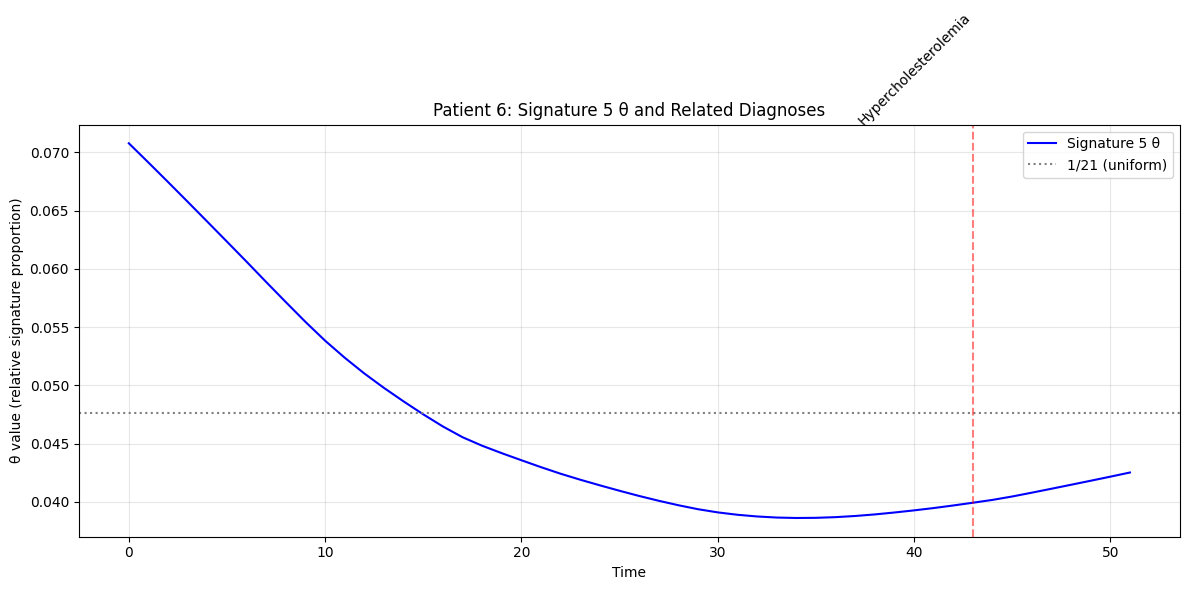

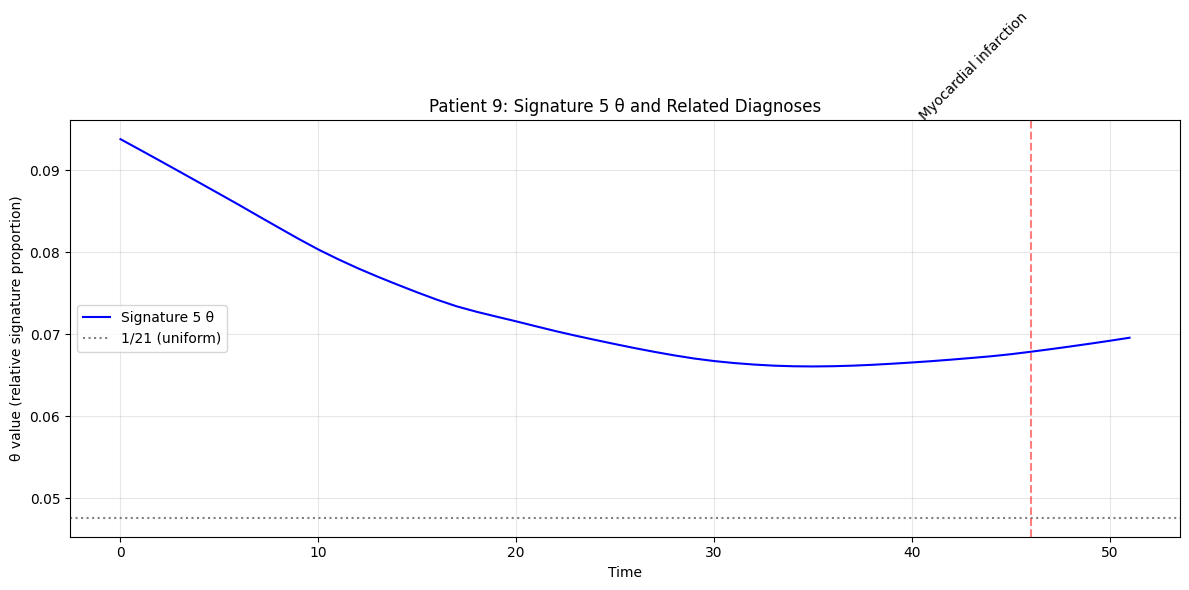

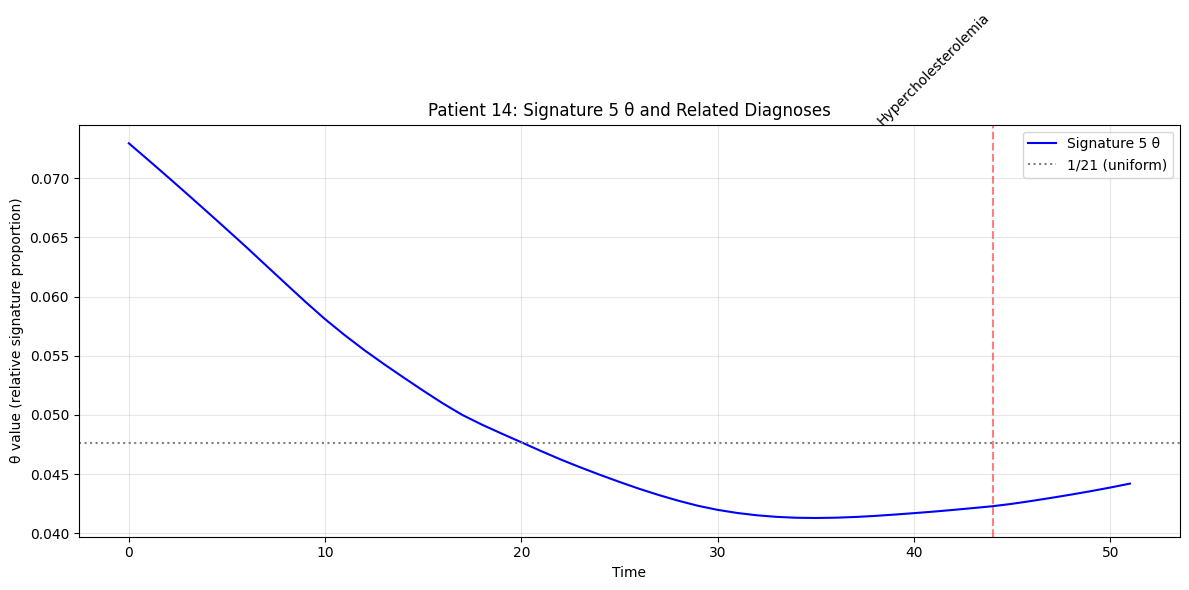

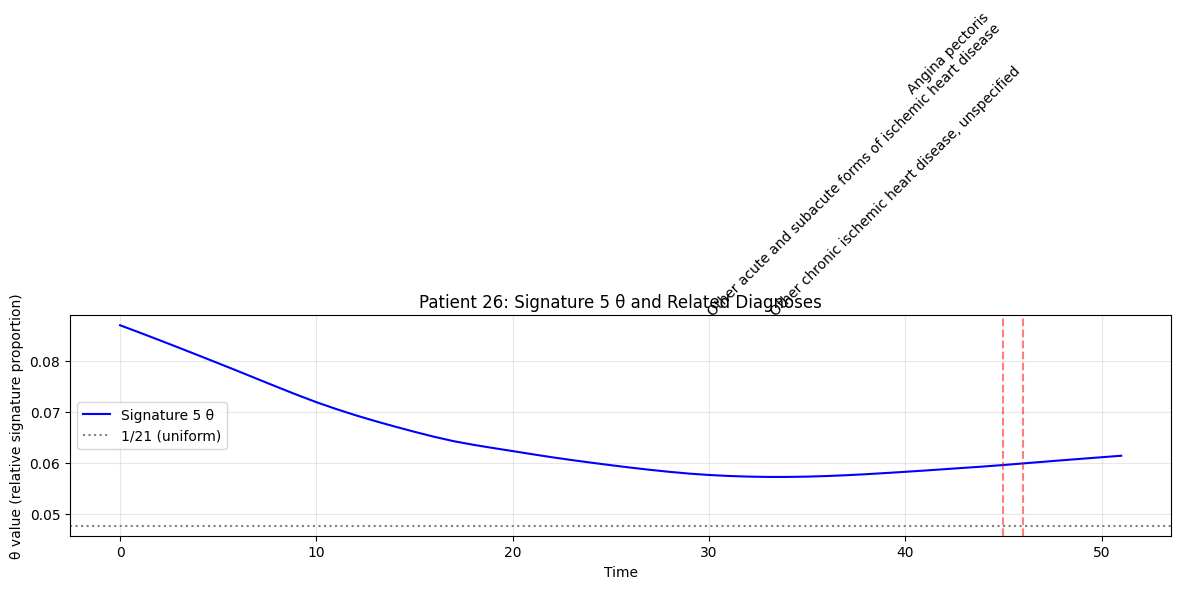


Looking at Signature 6
Diseases in this signature: [np.str_('Cancer of bronchus; lung'), np.str_('Malignant neoplasm, other'), np.str_('Secondary malignant neoplasm'), np.str_('Secondary malignancy of lymph nodes'), np.str_('Secondary malignancy of respiratory organs'), np.str_('Secondary malignant neoplasm of digestive systems'), np.str_('Secondary malignant neoplasm of liver'), np.str_('Secondary malignancy of bone')]
Found 5 interesting cases


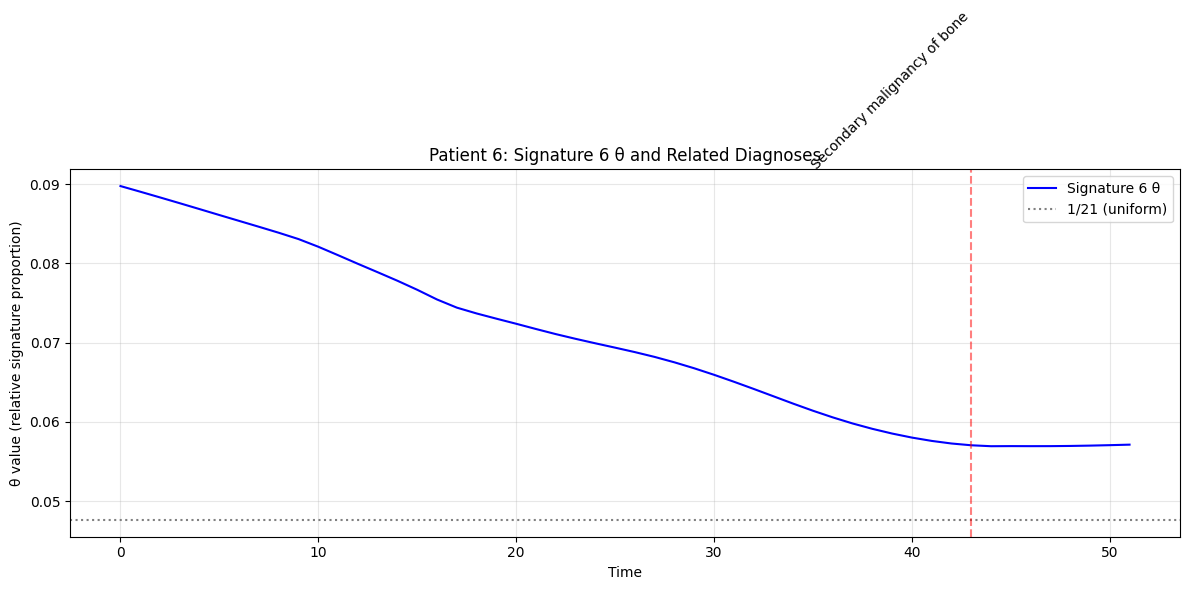

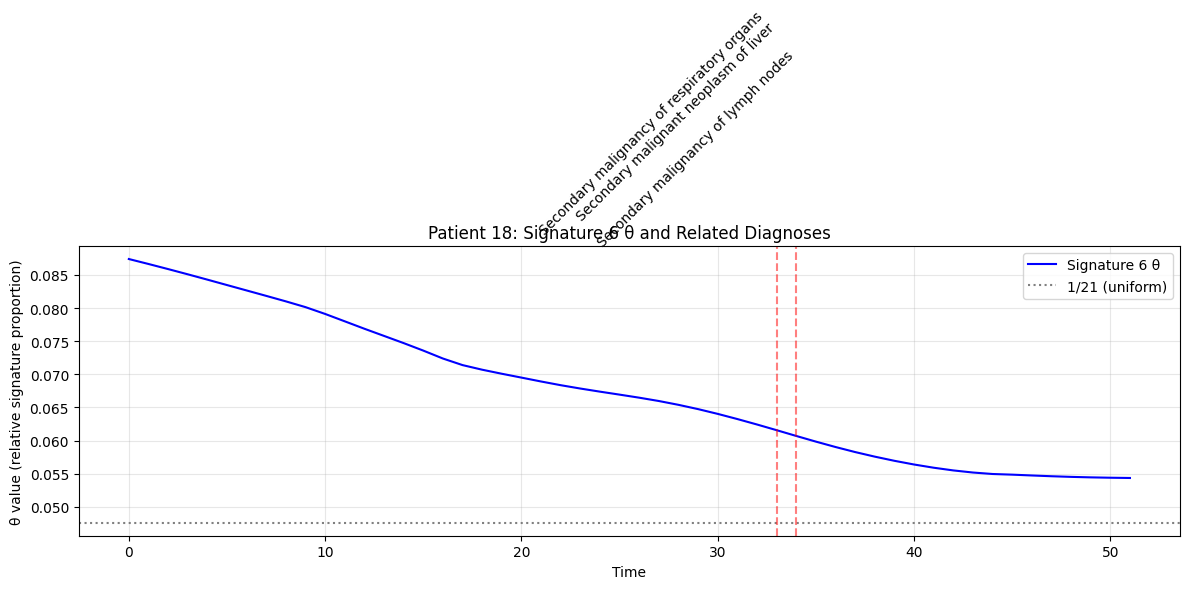

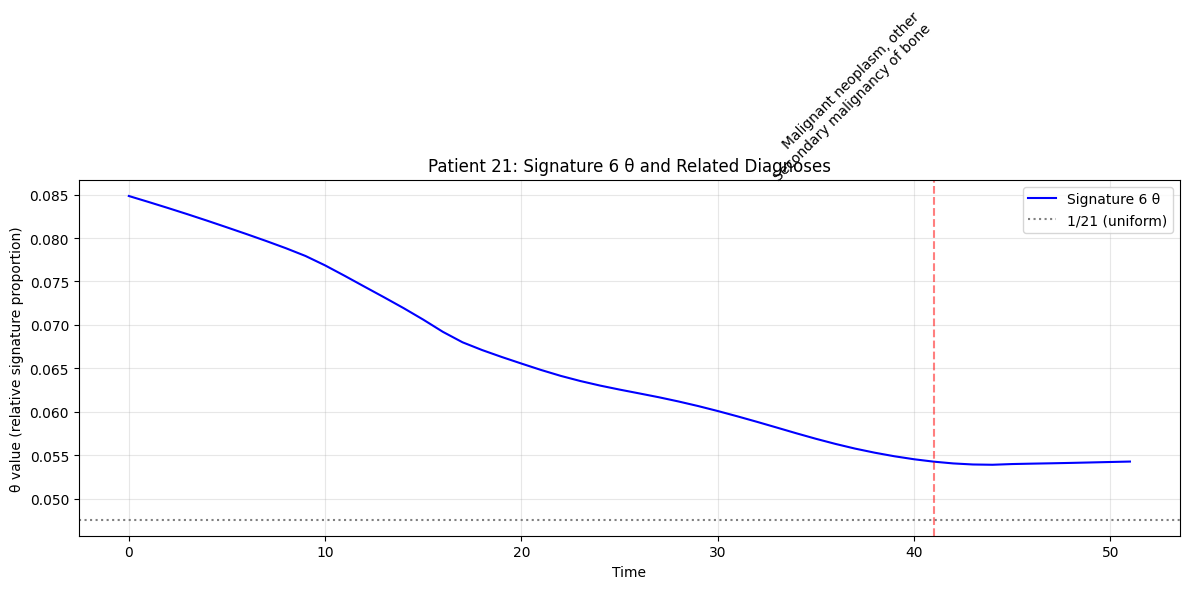

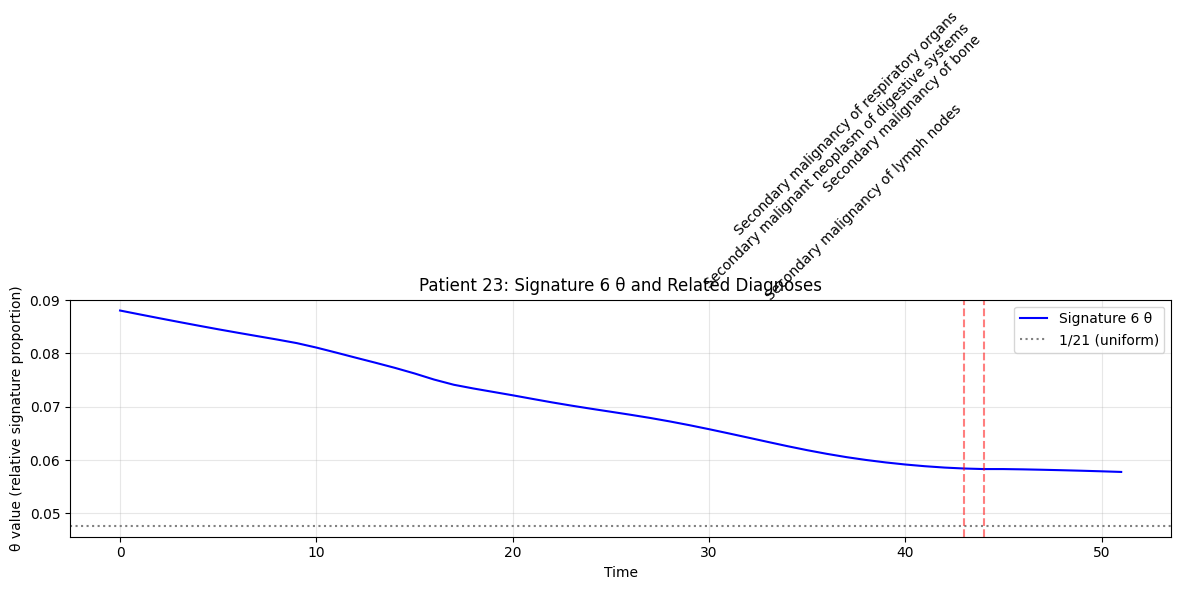

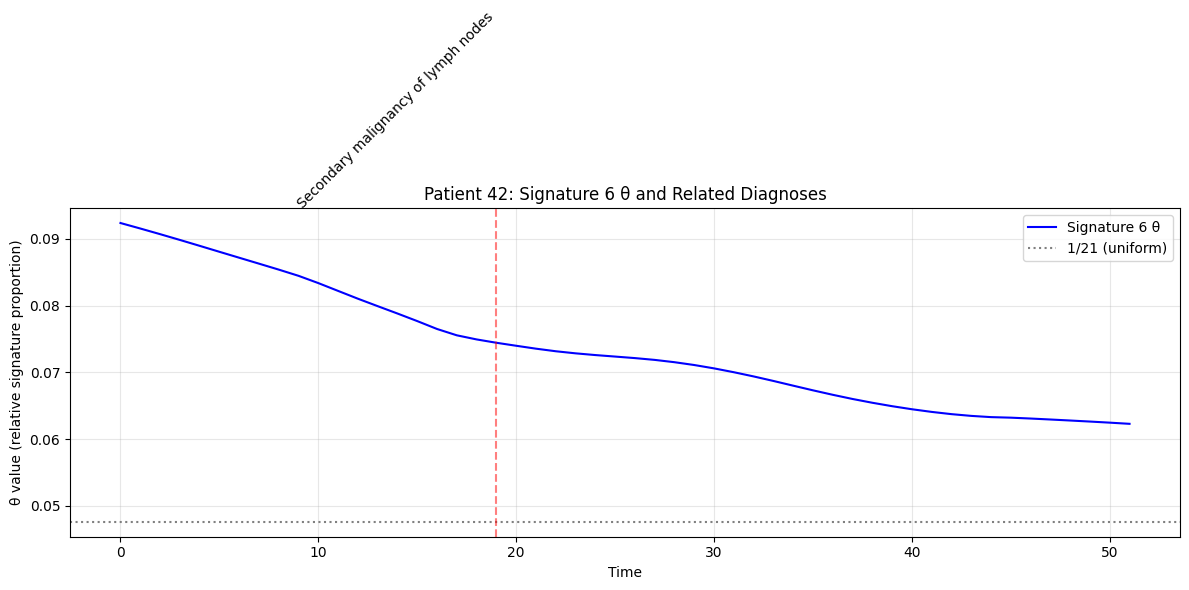


Looking at Signature 15
Diseases in this signature: [np.str_('Type 1 diabetes'), np.str_('Type 2 diabetes'), np.str_('Type 2 diabetes with ophthalmic manifestations'), np.str_('Diabetic retinopathy'), np.str_('Hypoglycemia')]
Found 5 interesting cases


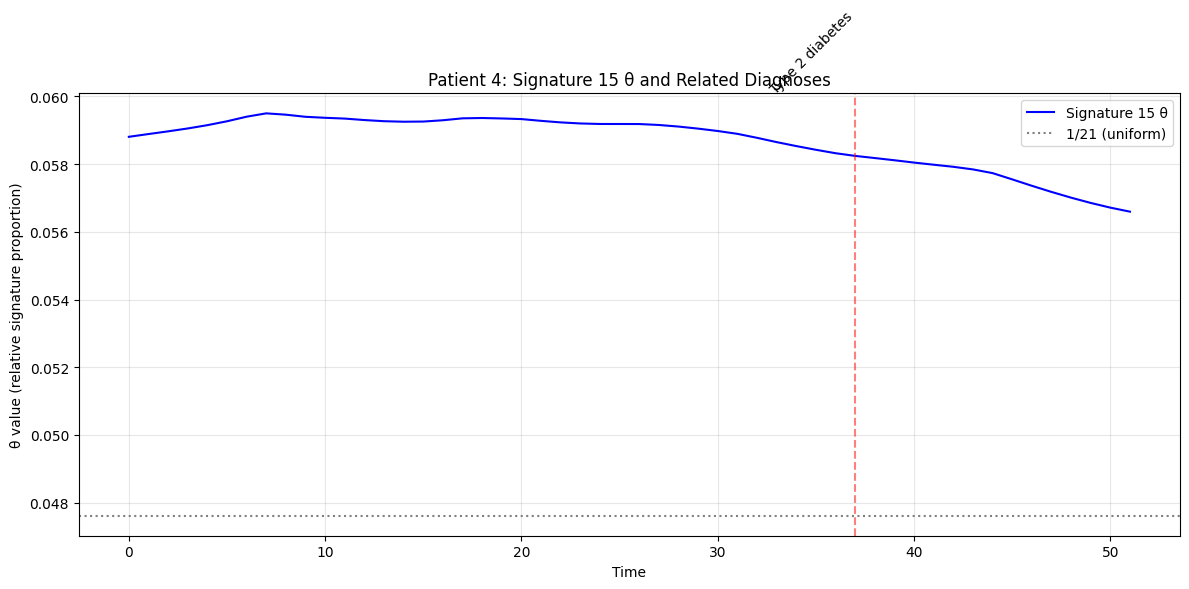

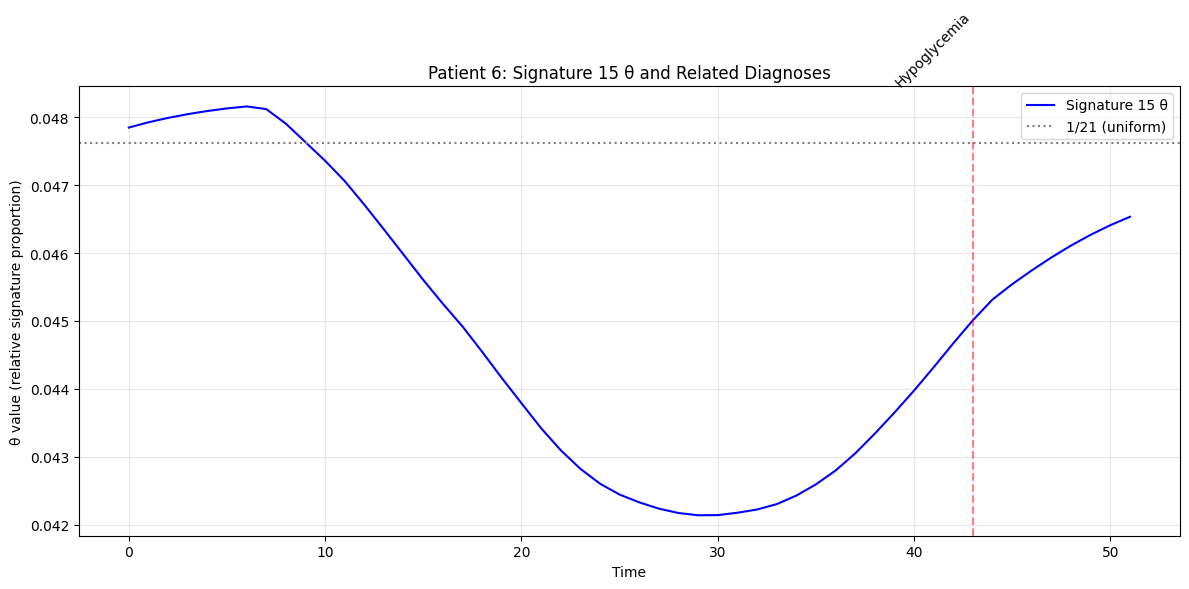

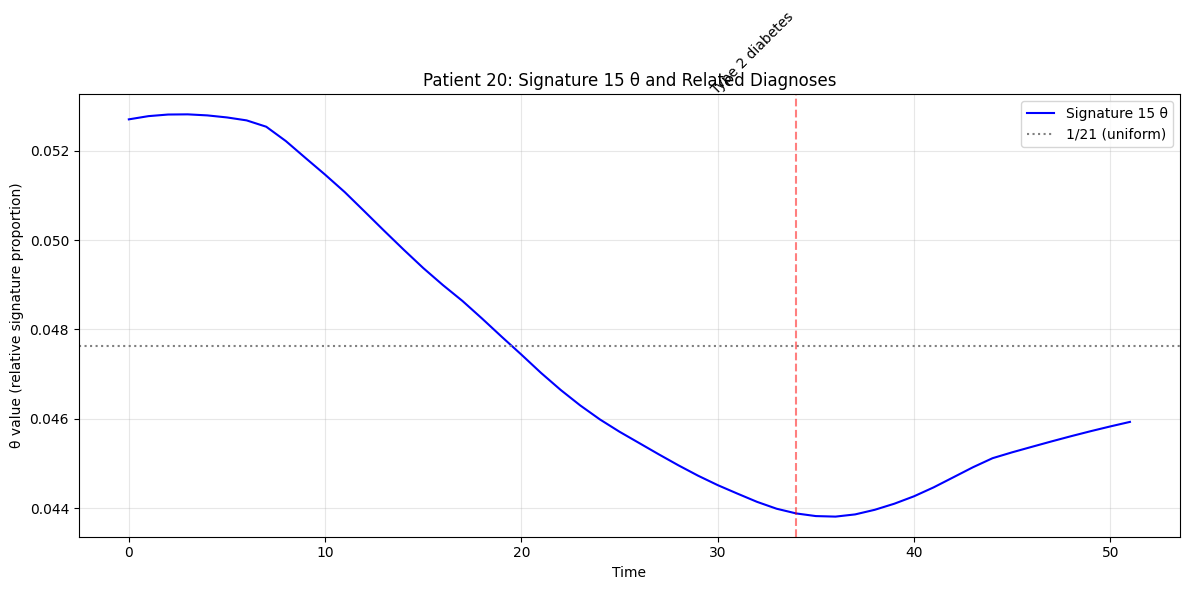

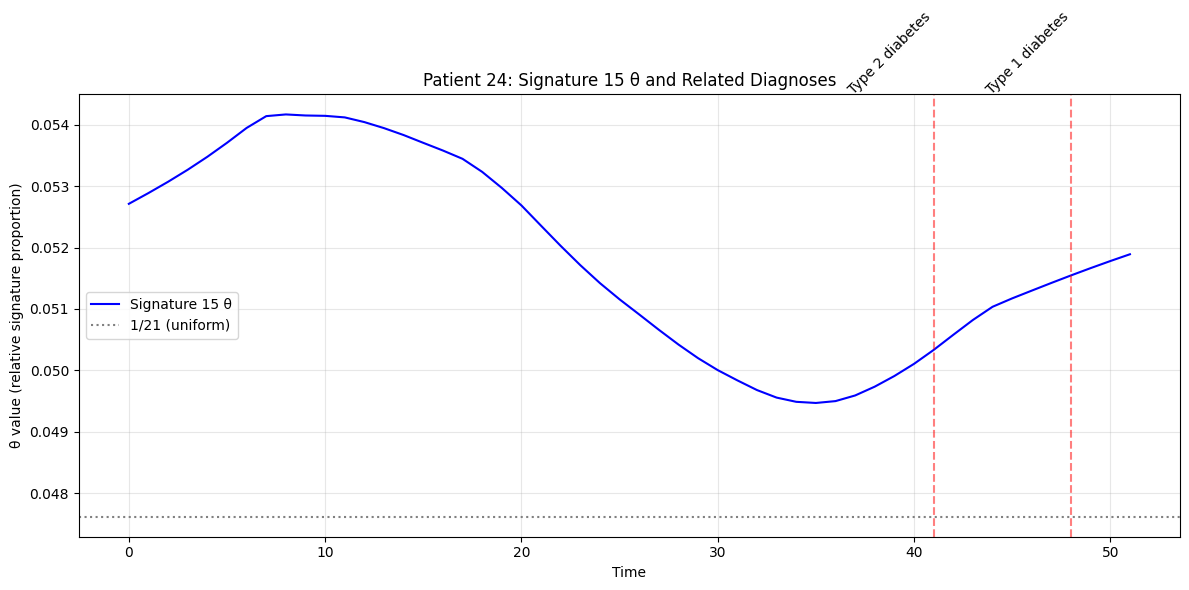

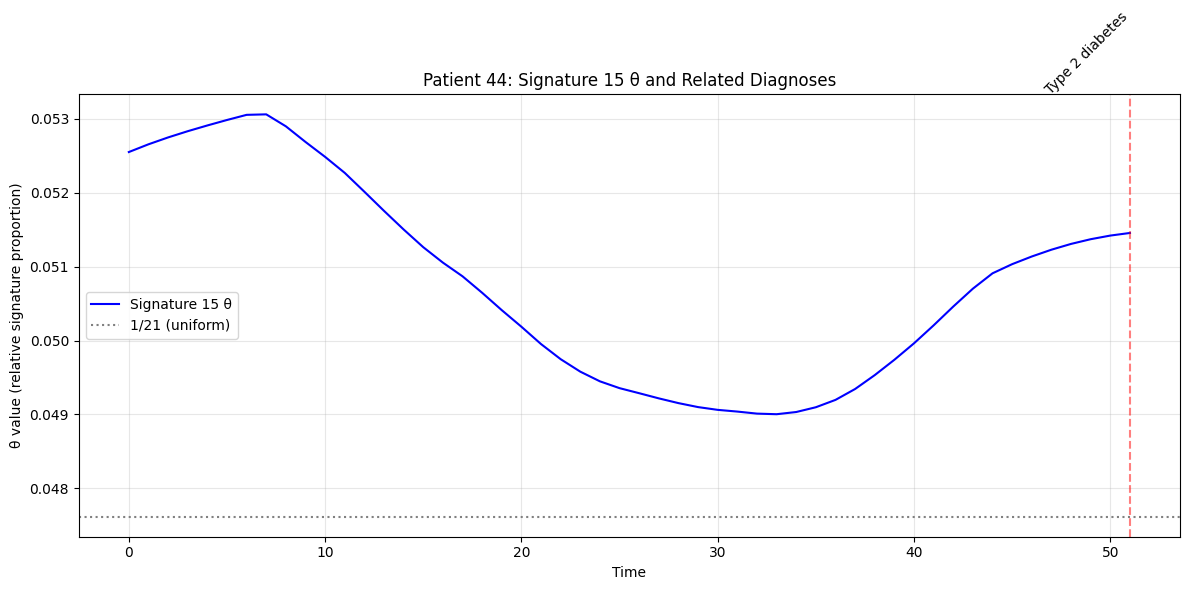

In [77]:
# Load first model to get clusters and disease names
first_model = torch.load(os.path.join(base_dir, 'output_0_10000/model.pt'))
clusters = first_model['clusters']
disease_names = first_model['disease_names'][0].tolist()

def plot_theta_specific_diagnoses(patient_idx, signature_idx, all_lambdas, Y_np, clusters):
    """Plot theta curves (relative signature proportions) and highlight diagnoses"""
    # Get diseases associated with this signature
    sig_diseases = np.where(clusters == signature_idx)[0]
    
    # Get patient's data
    patient_Y = Y_np[patient_idx]
    patient_lambdas = all_lambdas[patient_idx]
    
    # Calculate thetas (normalize lambdas at each timepoint)
    patient_thetas = patient_lambdas / patient_lambdas.sum(axis=0)
    patient_theta = patient_thetas[signature_idx]
    
    # Find times when signature-specific diseases occurred
    sig_diagnoses = []
    for t in range(Y_np.shape[2]):
        if any(patient_Y[d, t] > 0 for d in sig_diseases):
            sig_diagnoses.append(t)
            
    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(range(52), patient_theta, 'b-', label=f'Signature {signature_idx} θ')
    
    # Add horizontal line at 1/K for reference
    K = all_lambdas.shape[1]
    plt.axhline(y=1/K, color='gray', linestyle=':', label=f'1/{K} (uniform)')
    
    # Highlight diagnosis times
    for t in sig_diagnoses:
        diagnosed = [d for d in sig_diseases if patient_Y[d, t] > 0]
        disease_names_t = [disease_names[d] for d in diagnosed]
        
        plt.axvline(x=t, color='r', linestyle='--', alpha=0.5)
        plt.text(t, plt.ylim()[1], '\n'.join(disease_names_t), 
                rotation=45, ha='right')
    
    plt.title(f'Patient {patient_idx}: Signature {signature_idx} θ and Related Diagnoses')
    plt.xlabel('Time')
    plt.ylabel('θ value (relative signature proportion)')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Find interesting cases for each signature
for sig_idx in [5, 6, 15]:
    print(f"\nLooking at Signature {sig_idx}")
    sig_diseases = np.where(clusters == sig_idx)[0]
    print(f"Diseases in this signature: {[disease_names[d] for d in sig_diseases]}")
    
    # Find patients with these diagnoses
    interesting_cases = []
    for i in range(len(Y_np)):
        if any(Y_np[i, d].sum() > 0 for d in sig_diseases):
            interesting_cases.append(i)
            if len(interesting_cases) >= 5:  # Look at 5 examples per signature
                break
    
    print(f"Found {len(interesting_cases)} interesting cases")
    
    # Plot each case
    for patient_idx in interesting_cases:
        plot_theta_specific_diagnoses(patient_idx, sig_idx, all_lambdas, Y_np, clusters)


Looking at Signature 5
Diseases in this signature: [np.str_('Hypercholesterolemia'), np.str_('Unstable angina (intermediate coronary syndrome)'), np.str_('Myocardial infarction'), np.str_('Angina pectoris'), np.str_('Coronary atherosclerosis'), np.str_('Other chronic ischemic heart disease, unspecified'), np.str_('Other acute and subacute forms of ischemic heart disease')]
Found 5 cases with peaks near diagnoses


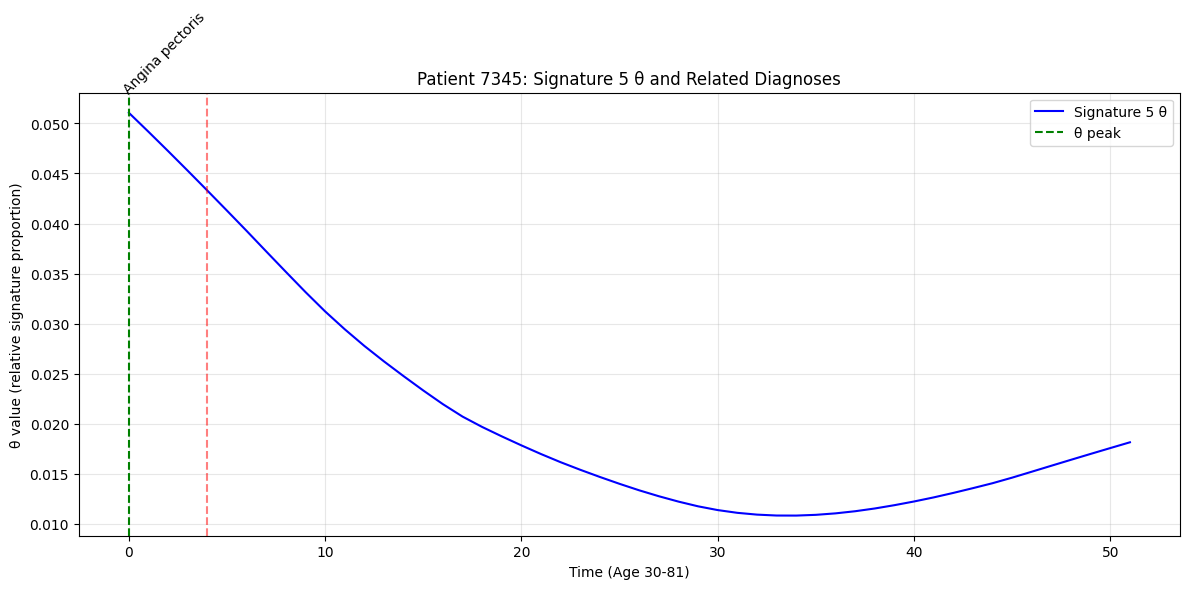

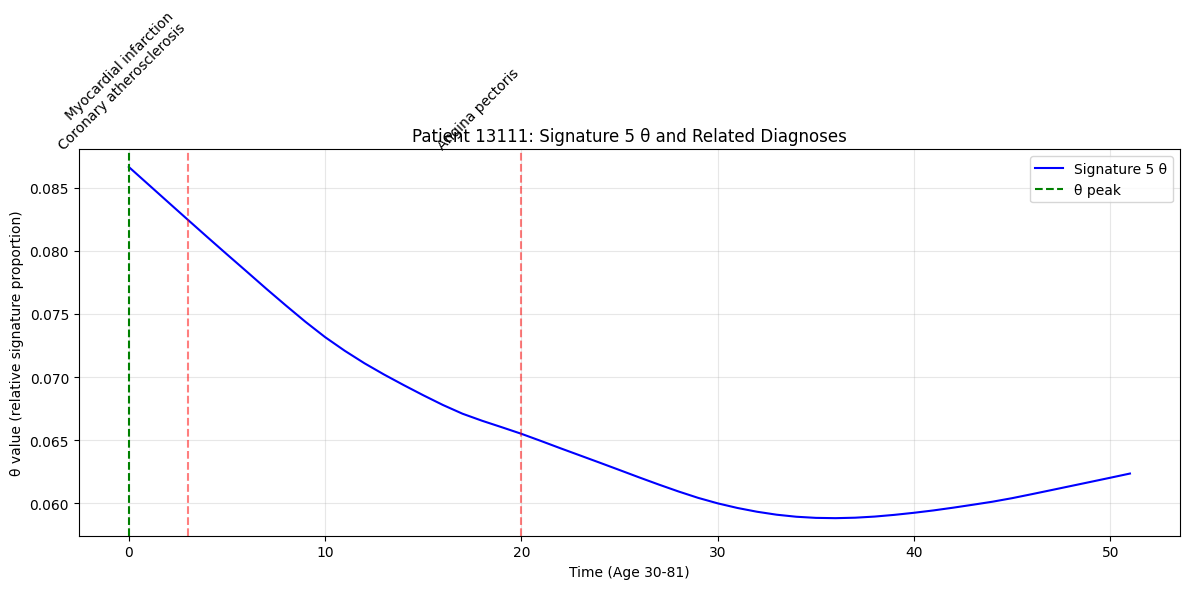

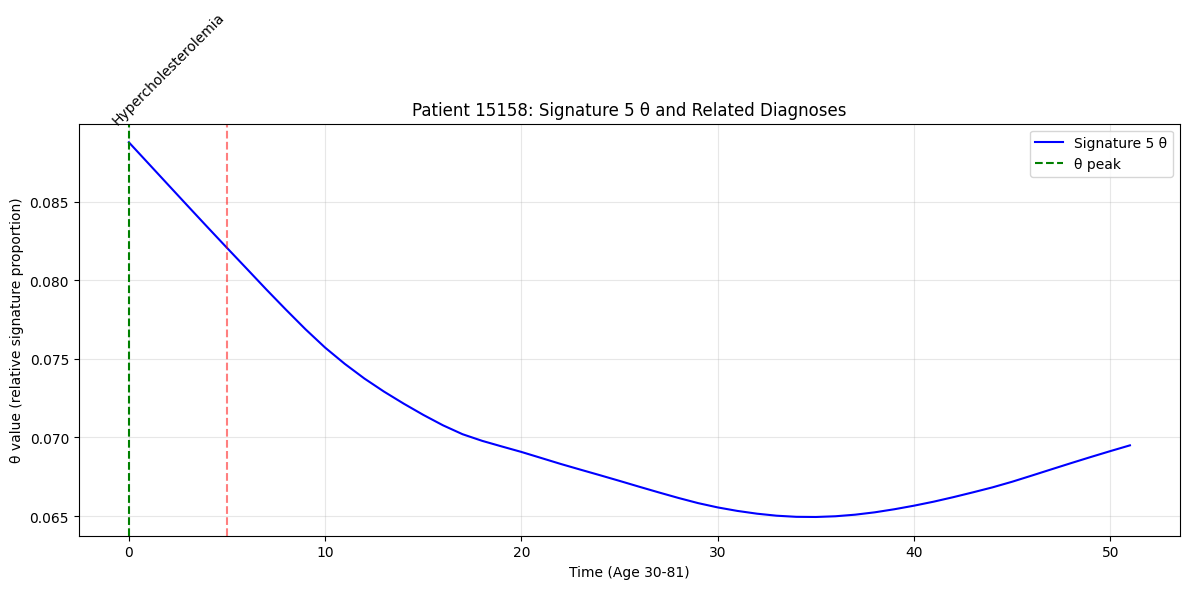

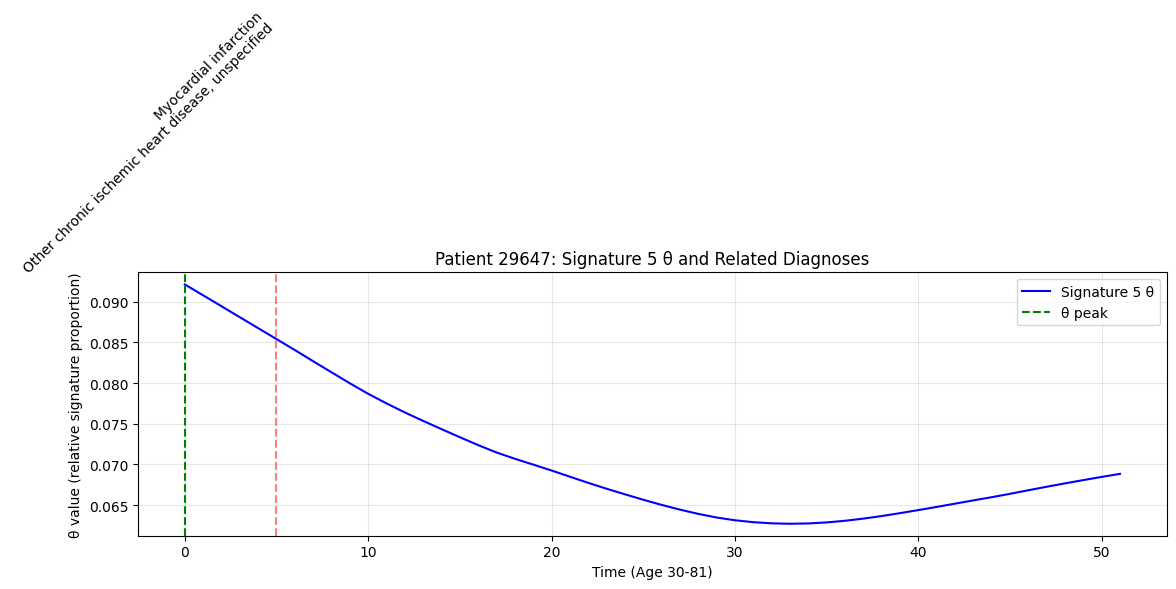

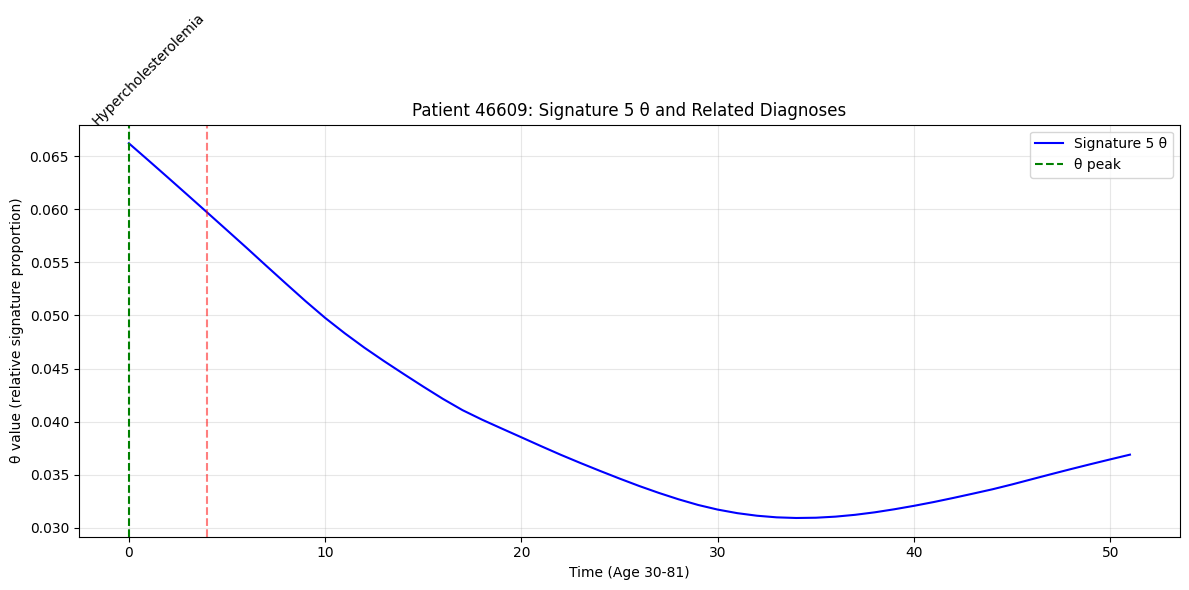


Looking at Signature 6
Diseases in this signature: [np.str_('Cancer of bronchus; lung'), np.str_('Malignant neoplasm, other'), np.str_('Secondary malignant neoplasm'), np.str_('Secondary malignancy of lymph nodes'), np.str_('Secondary malignancy of respiratory organs'), np.str_('Secondary malignant neoplasm of digestive systems'), np.str_('Secondary malignant neoplasm of liver'), np.str_('Secondary malignancy of bone')]
Found 5 cases with peaks near diagnoses


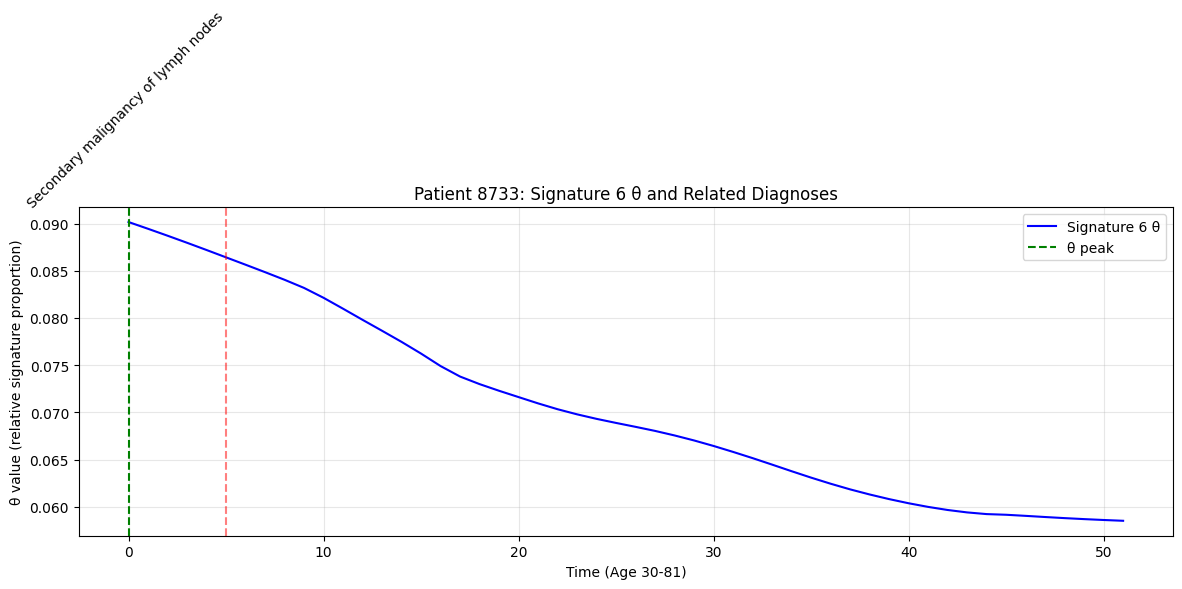

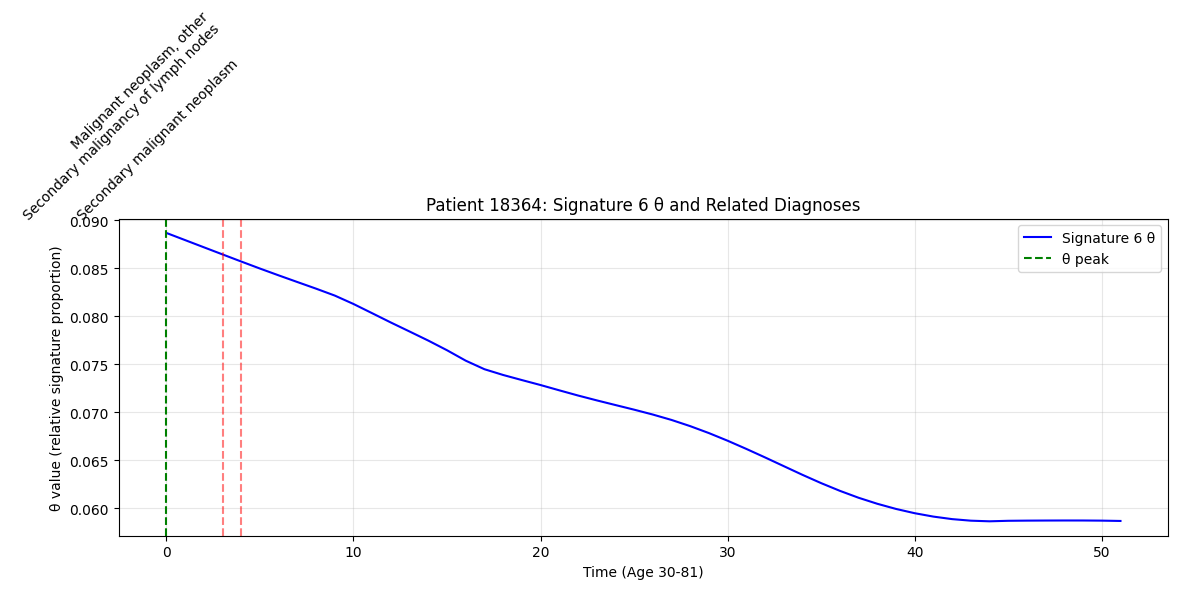

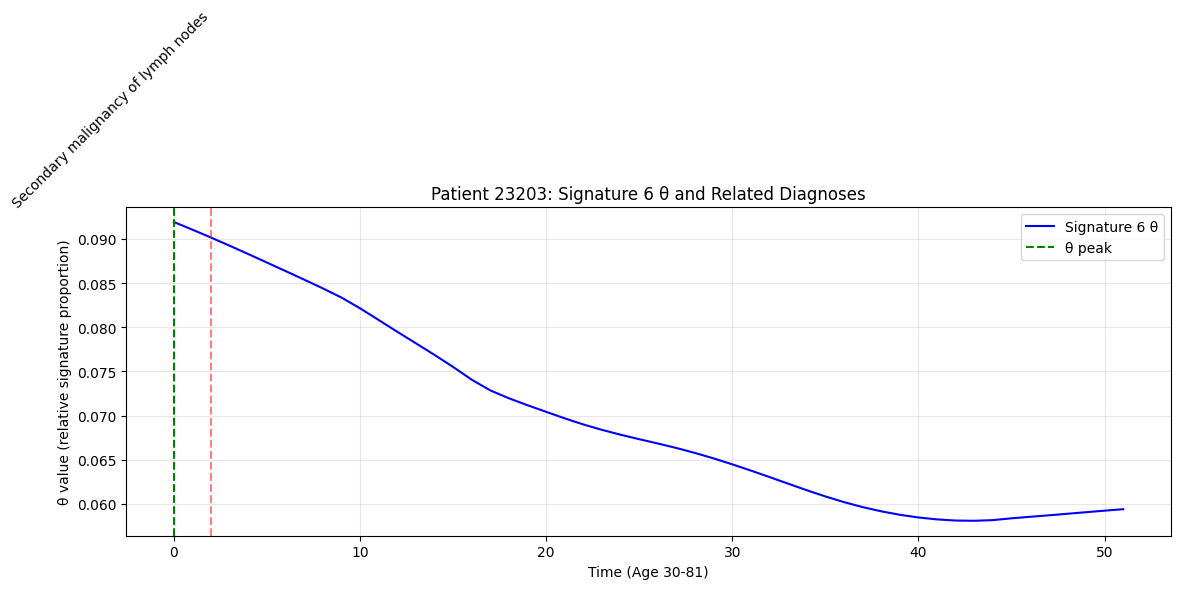

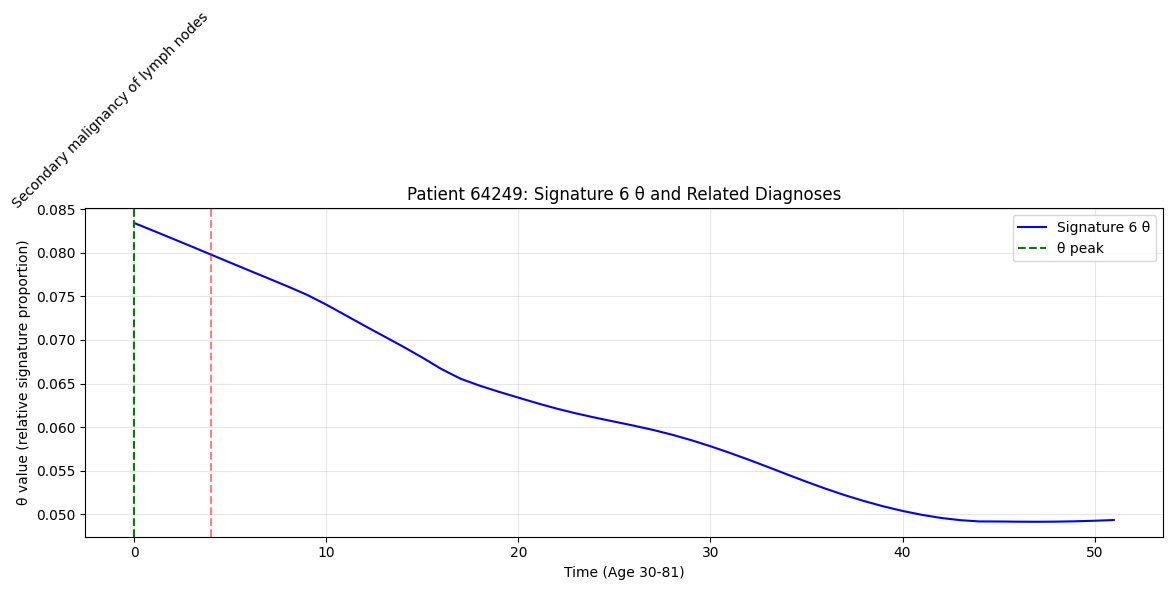

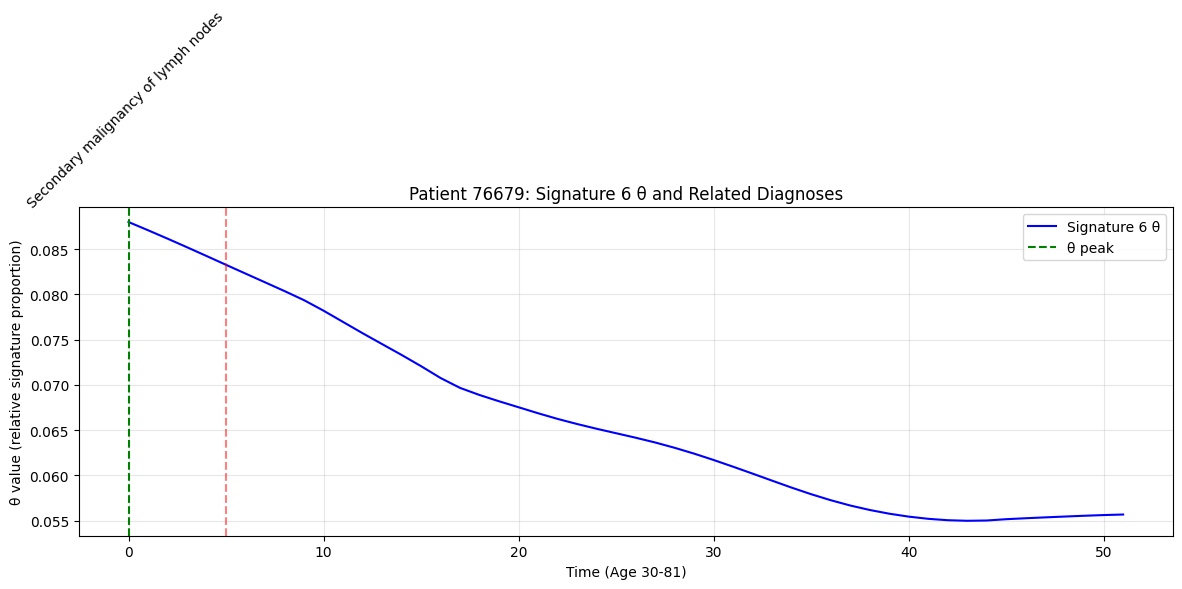


Looking at Signature 15
Diseases in this signature: [np.str_('Type 1 diabetes'), np.str_('Type 2 diabetes'), np.str_('Type 2 diabetes with ophthalmic manifestations'), np.str_('Diabetic retinopathy'), np.str_('Hypoglycemia')]
Found 5 cases with peaks near diagnoses


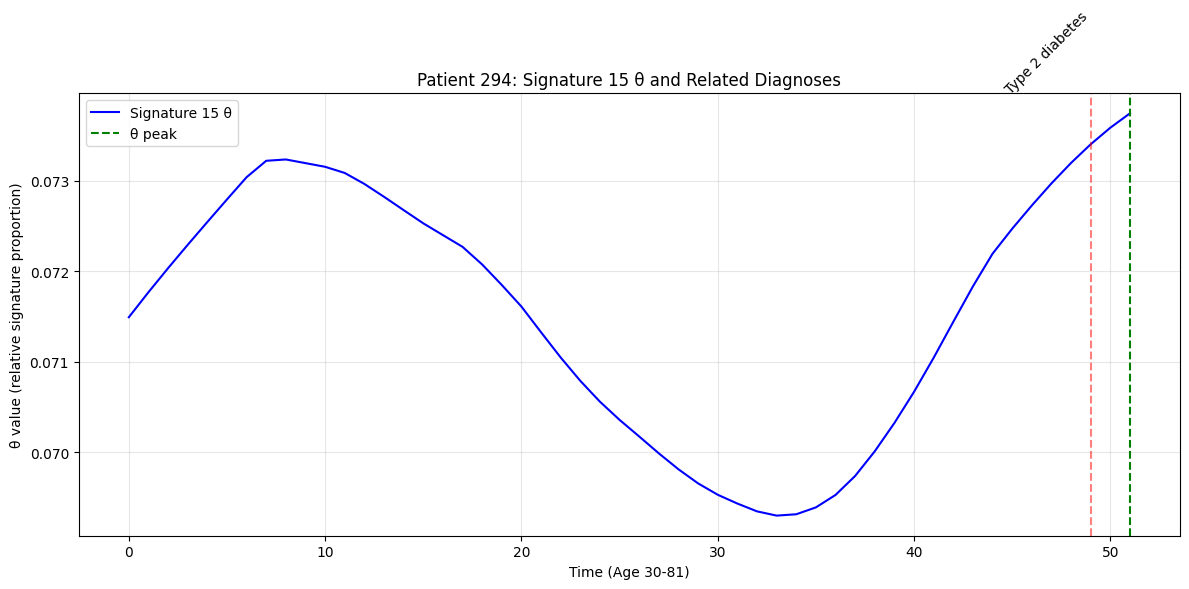

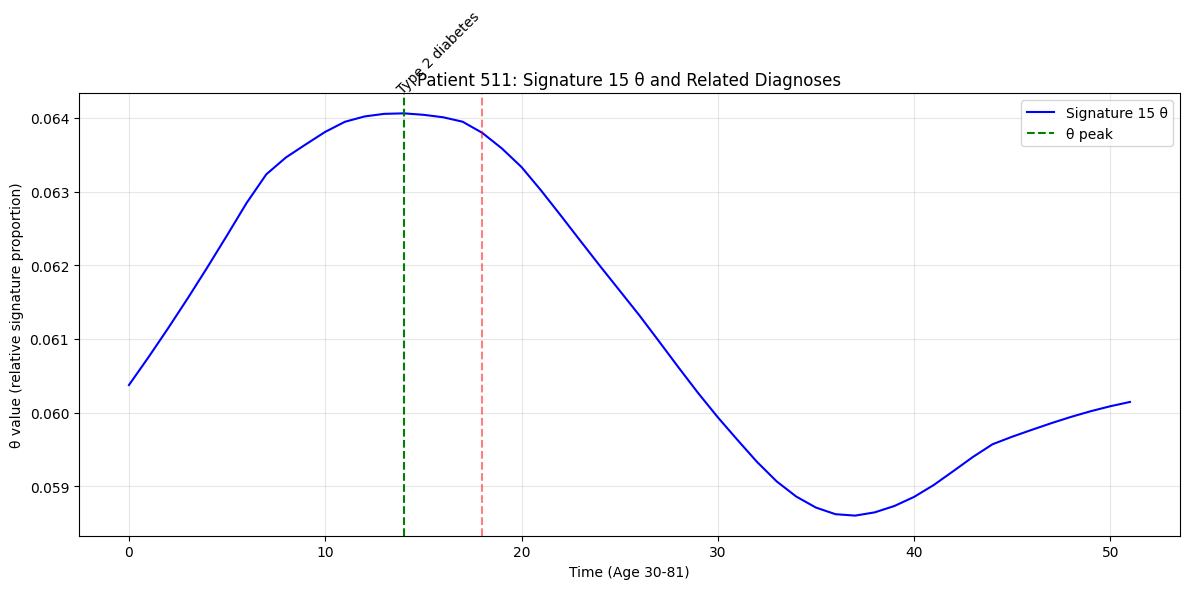

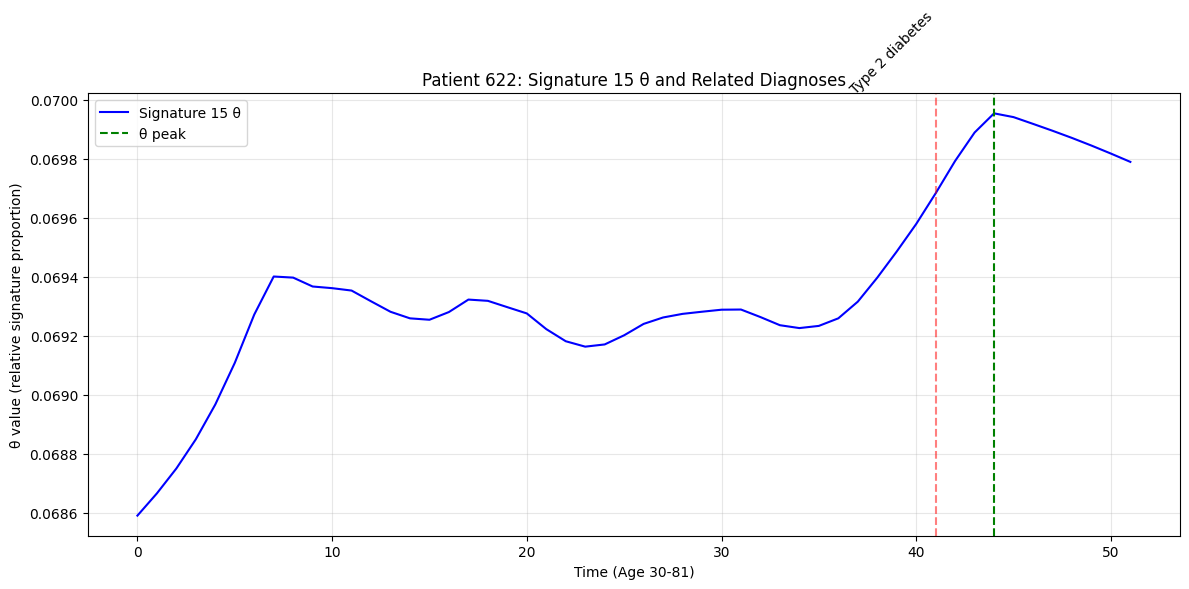

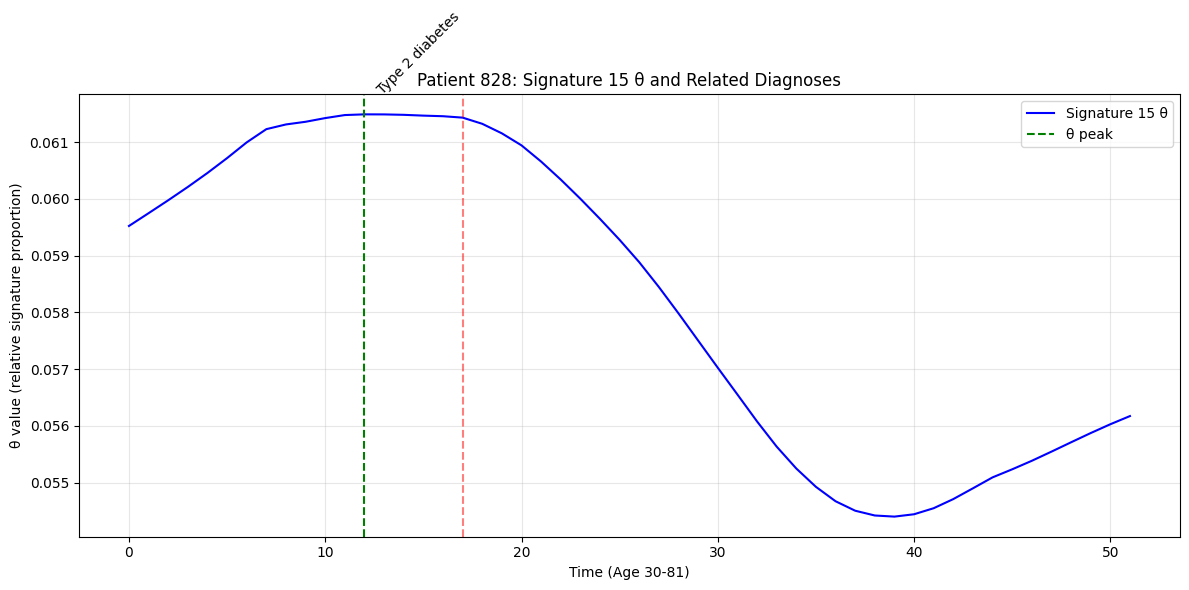

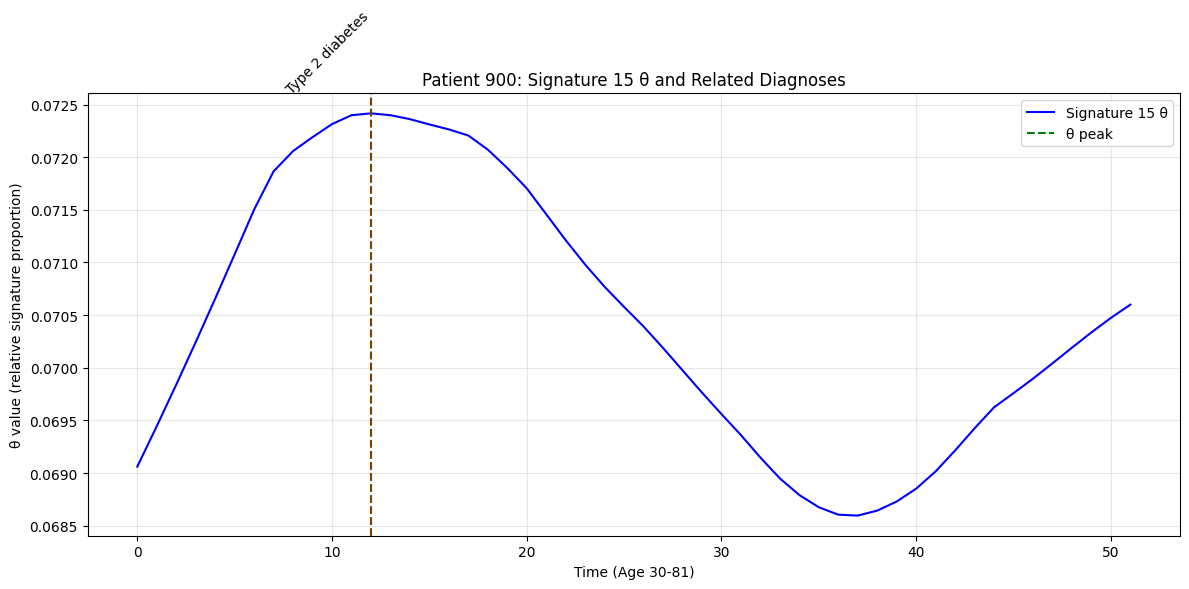

In [26]:
def find_theta_peak_diagnoses(patient_idx, signature_idx, all_lambdas, Y_np, clusters, window=5):
    """
    Find cases where theta peaks coincide with signature-specific diagnoses
    """
    # Get diseases associated with this signature
    sig_diseases = np.where(clusters == signature_idx)[0]
    
    # Get patient's data
    patient_Y = Y_np[patient_idx]
    patient_lambdas = all_lambdas[patient_idx]
    
    # Calculate thetas
    patient_thetas = patient_lambdas / patient_lambdas.sum(axis=0)
    patient_theta = patient_thetas[signature_idx]
    
    # Find peak of theta
    peak_time = np.argmax(patient_theta)
    
    # Find diagnosis times
    diagnosis_times = []
    for t in range(Y_np.shape[2]):
        if any(patient_Y[d, t] > 0 for d in sig_diseases):
            diagnosis_times.append(t)
    
    # Check if any diagnosis occurs near the peak
    meaningful = False
    for t in diagnosis_times:
        if abs(t - peak_time) <= window:  # Within window of peak
            meaningful = True
            break
            
    return meaningful, diagnosis_times, patient_theta, peak_time

def plot_theta_peak_diagnoses(patient_idx, signature_idx, all_lambdas, Y_np, clusters):
    """Plot theta curves with emphasis on peaks and diagnoses"""
    meaningful, diag_times, theta, peak_time = find_theta_peak_diagnoses(patient_idx, signature_idx, all_lambdas, Y_np, clusters)
    
    if meaningful:
        plt.figure(figsize=(12, 6))
        
        # Plot theta curve
        plt.plot(range(52), theta, 'b-', label=f'Signature {signature_idx} θ')
        
        # Highlight peak
        plt.axvline(x=peak_time, color='g', linestyle='--', label='θ peak')
        
        # Highlight diagnoses
        sig_diseases = np.where(clusters == signature_idx)[0]
        for t in diag_times:
            diagnosed = [d for d in sig_diseases if Y_np[patient_idx, d, t] > 0]
            disease_names_t = [disease_names[d] for d in diagnosed]
            
            plt.axvline(x=t, color='r', linestyle='--', alpha=0.5)
            plt.text(t, plt.ylim()[1], '\n'.join(disease_names_t), 
                    rotation=45, ha='right')
        
        plt.title(f'Patient {patient_idx}: Signature {signature_idx} θ and Related Diagnoses')
        plt.xlabel('Time (Age 30-81)')
        plt.ylabel('θ value (relative signature proportion)')
        plt.grid(True, alpha=0.3)
        plt.legend()
        plt.tight_layout()
        plt.show()

# Find examples for each signature
for sig_idx in [5, 6, 15]:
    print(f"\nLooking at Signature {sig_idx}")
    sig_diseases = np.where(clusters == sig_idx)[0]
    print(f"Diseases in this signature: {[disease_names[d] for d in sig_diseases]}")
    
    # Find patients with peaks near diagnoses
    interesting_cases = []
    for i in range(len(Y_np)):
        meaningful, _, _, _ = find_theta_peak_diagnoses(i, sig_idx, all_lambdas, Y_np, clusters)
        if meaningful:
            interesting_cases.append(i)
            if len(interesting_cases) >= 5:
                break
    
    print(f"Found {len(interesting_cases)} cases with peaks near diagnoses")
    
    # Plot each case
    for patient_idx in interesting_cases:
        plot_theta_peak_diagnoses(patient_idx, sig_idx, all_lambdas, Y_np, clusters)

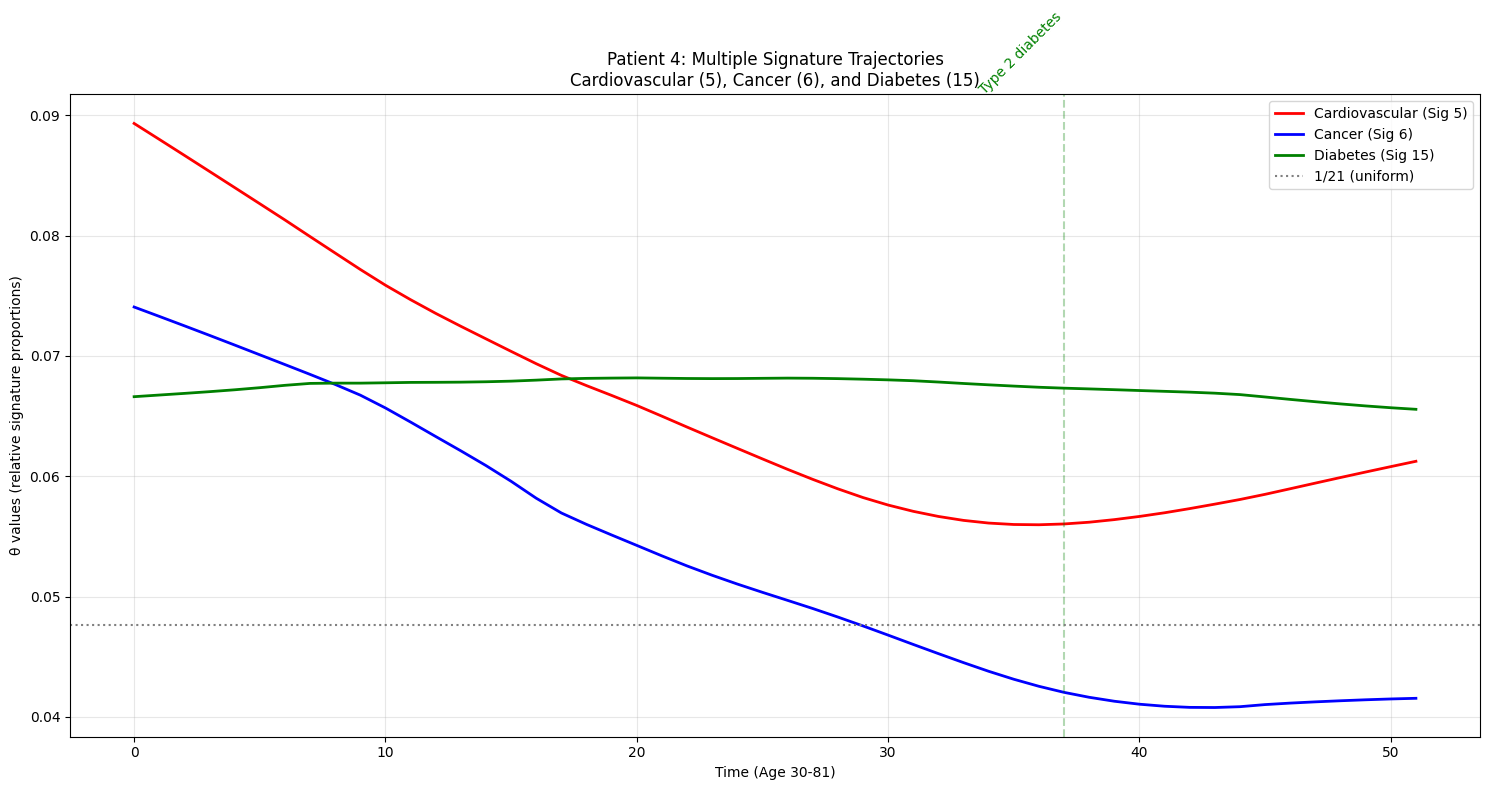

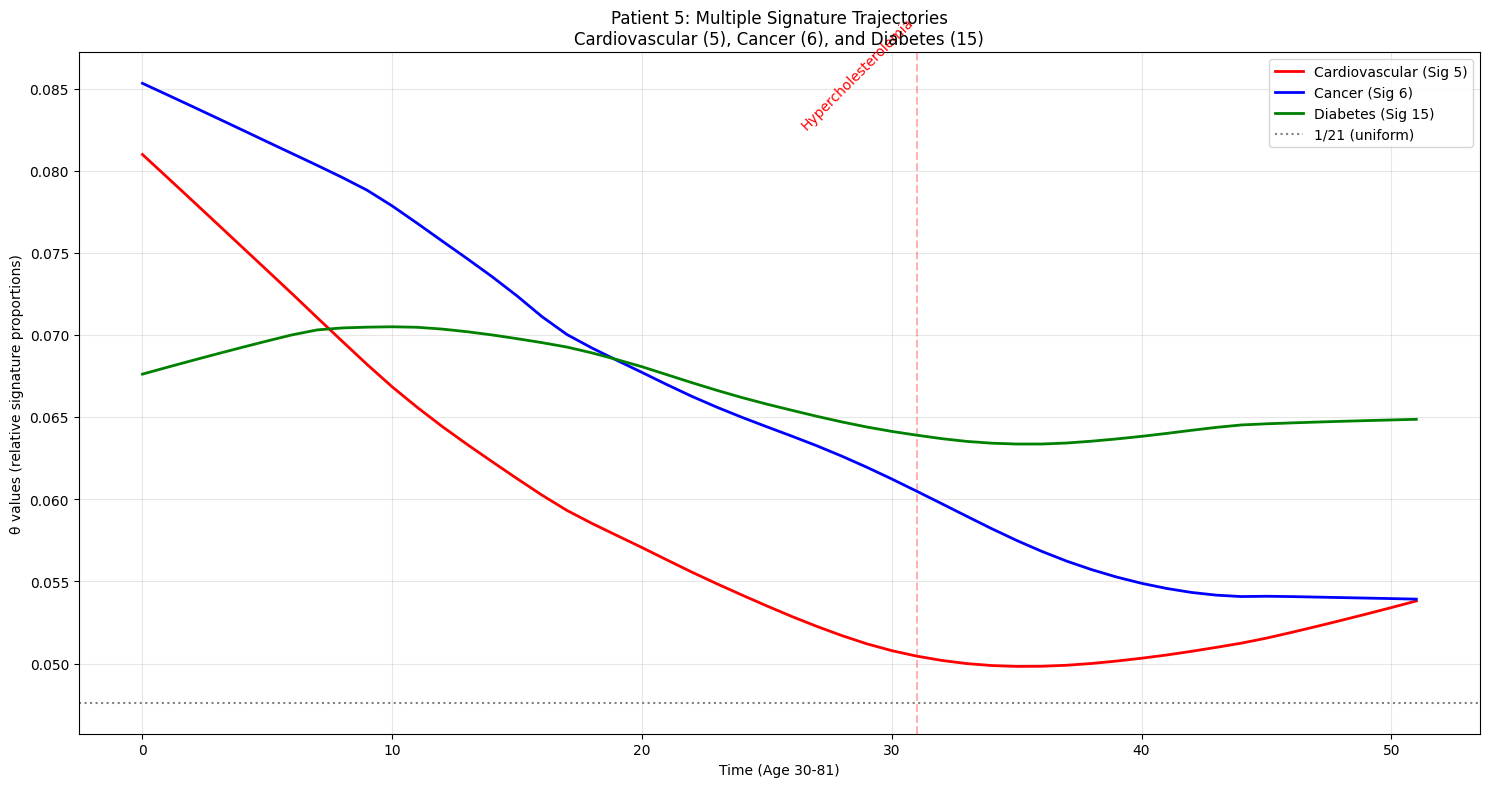

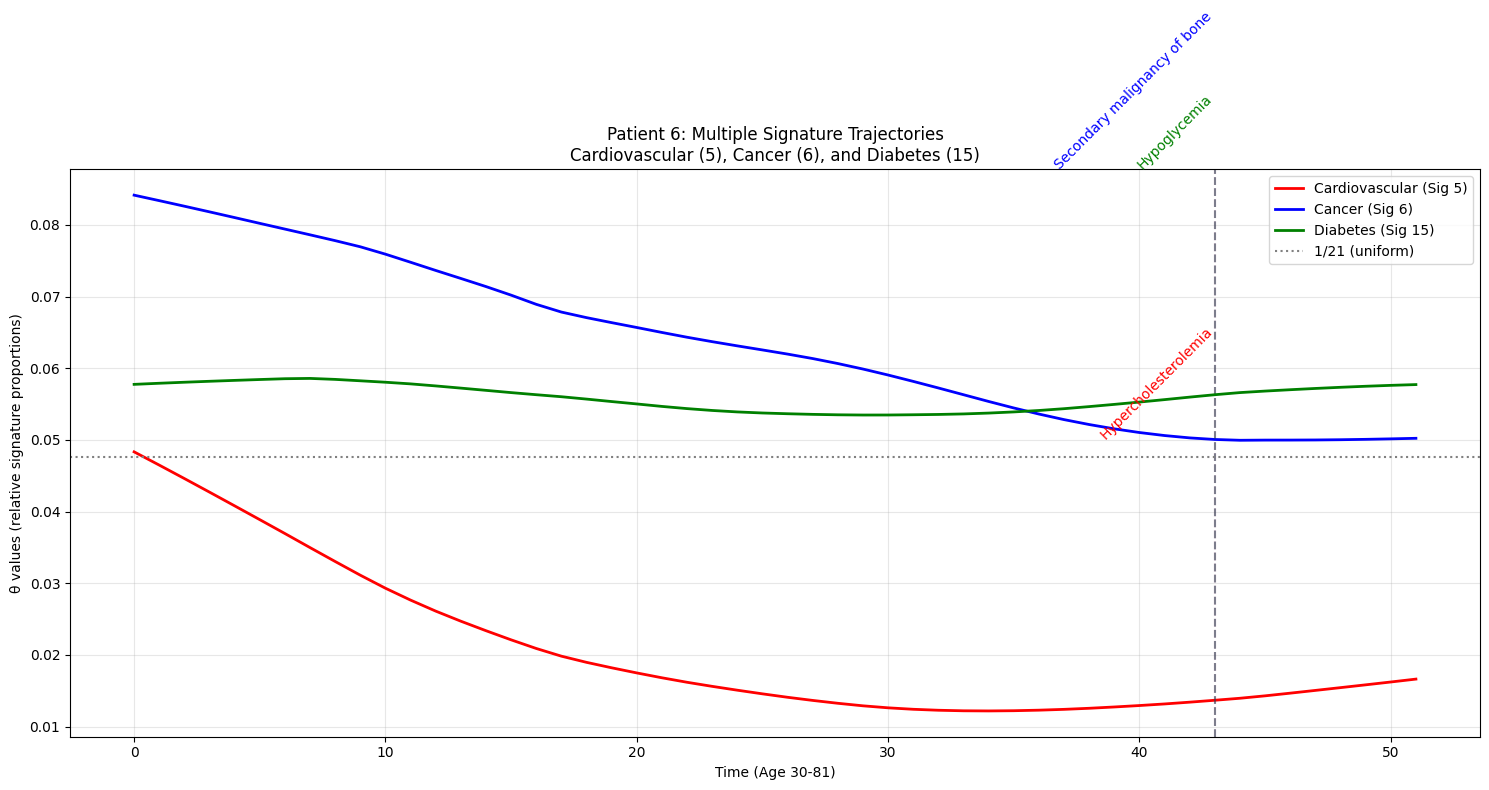

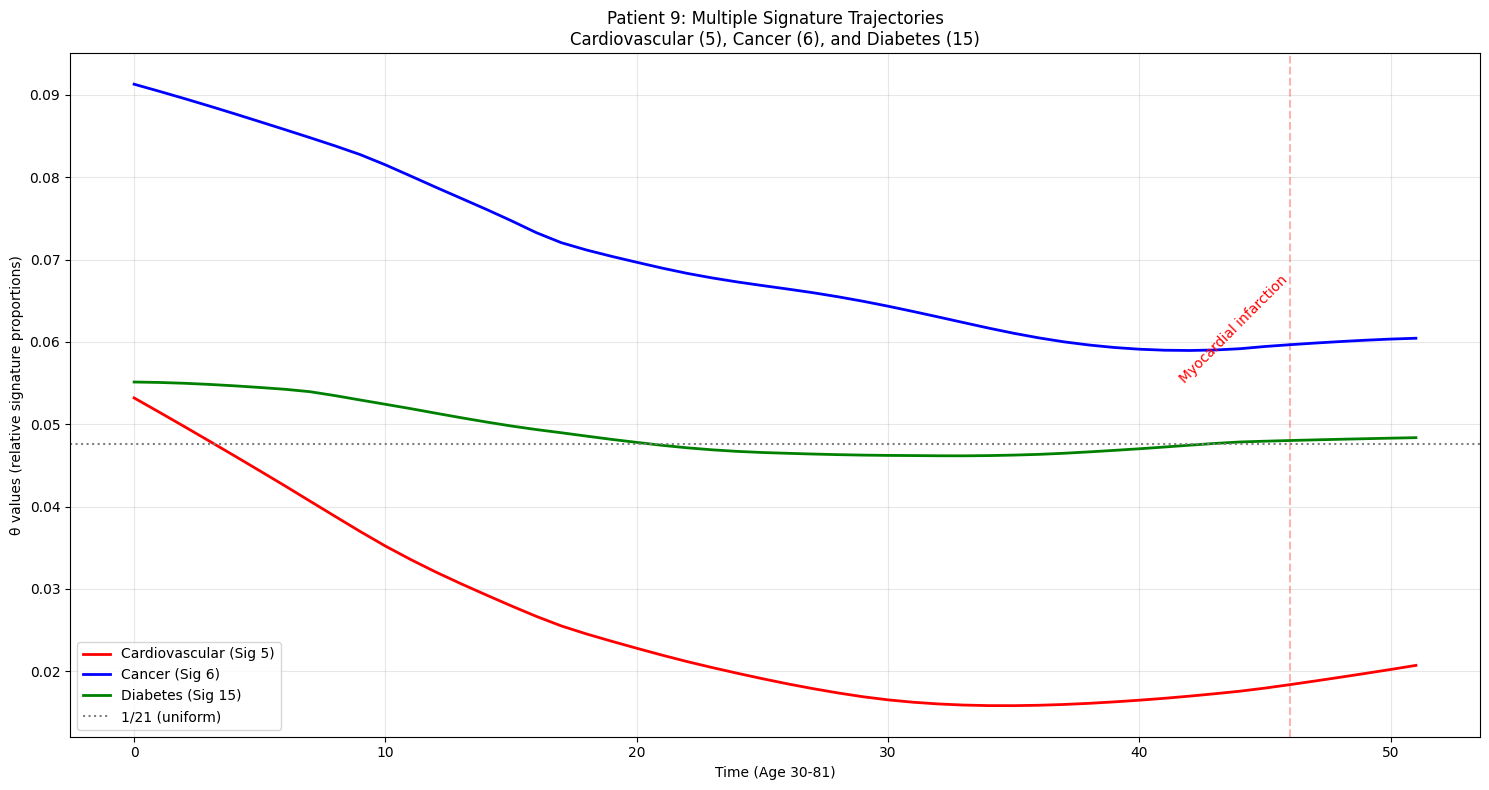

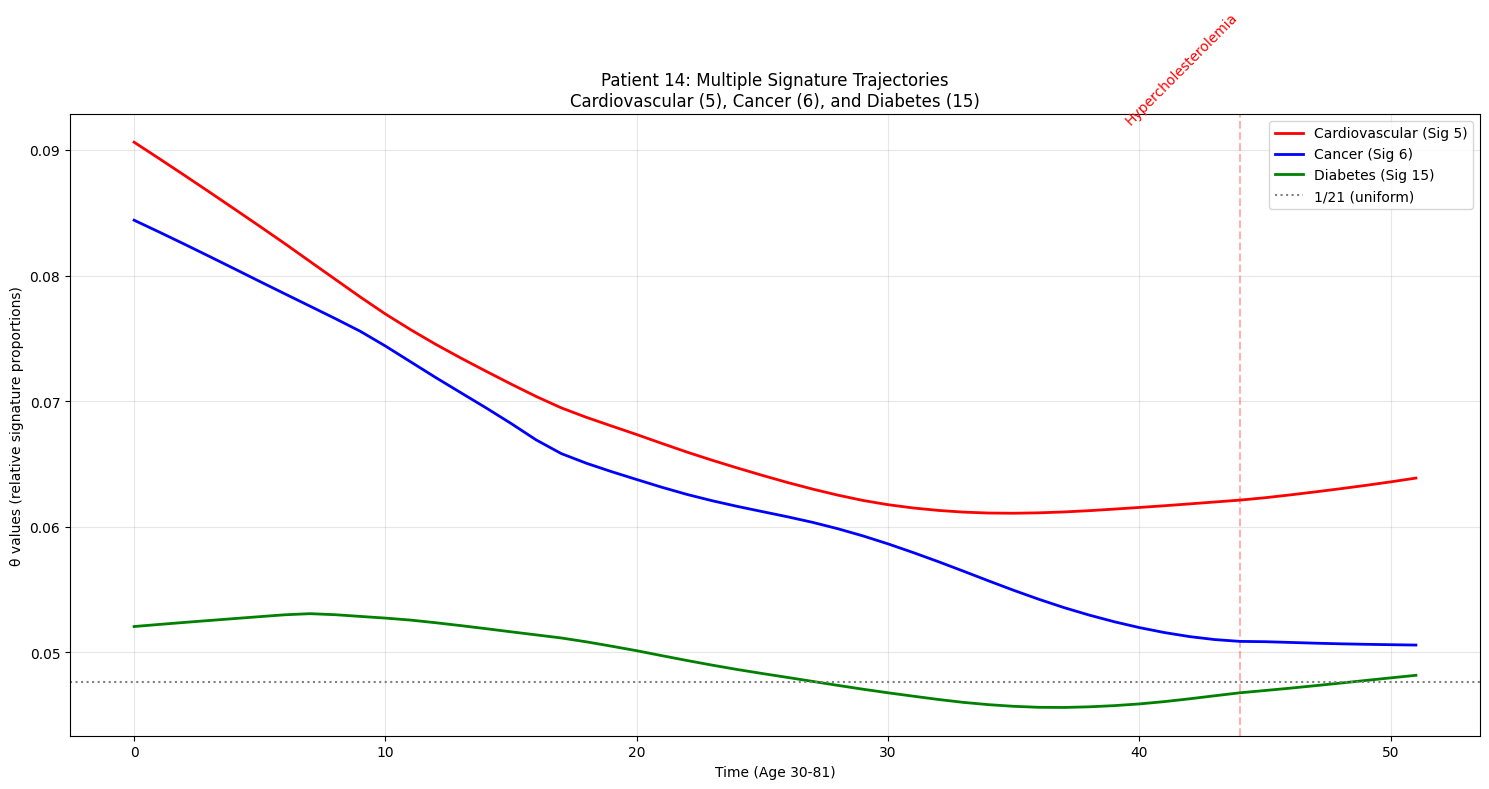

In [28]:
def plot_multiple_signatures(patient_idx, all_lambdas, Y_np, clusters, disease_names):
    """Plot theta curves for signatures 5, 6, and 15 with their respective diagnoses"""
    # Setup signatures and their info
    sig_info = {
        5: {"name": "Cardiovascular", "color": "red"},
        6: {"name": "Cancer", "color": "blue"},
        15: {"name": "Diabetes", "color": "green"}
    }
    
    # Calculate thetas for all signatures
    patient_lambdas = all_lambdas[patient_idx]
    patient_thetas = patient_lambdas / patient_lambdas.sum(axis=0)
    
    # Check if patient has any relevant diagnoses
    has_diagnoses = False
    for sig_idx in sig_info.keys():
        sig_diseases = np.where(clusters == sig_idx)[0]
        if any(Y_np[patient_idx, d].sum() > 0 for d in sig_diseases):
            has_diagnoses = True
            break
    
    if has_diagnoses:
        plt.figure(figsize=(15, 8))
        
        # Plot theta curves for each signature
        for sig_idx, info in sig_info.items():
            # Plot theta
            plt.plot(range(52), patient_thetas[sig_idx], 
                    color=info["color"], 
                    label=f'{info["name"]} (Sig {sig_idx})',
                    linewidth=2)
            
            # Plot diagnoses for this signature
            sig_diseases = np.where(clusters == sig_idx)[0]
            for t in range(Y_np.shape[2]):
                diagnosed = [d for d in sig_diseases if Y_np[patient_idx, d, t] > 0]
                if diagnosed:
                    plt.axvline(x=t, color=info["color"], linestyle='--', alpha=0.3)
                    diseases_t = [disease_names[d] for d in diagnosed]
                    plt.text(t, plt.ylim()[1], '\n'.join(diseases_t),
                            color=info["color"], rotation=45, ha='right')
        
        # Add horizontal line at 1/K
        K = all_lambdas.shape[1]
        plt.axhline(y=1/K, color='gray', linestyle=':', label=f'1/{K} (uniform)')
        
        plt.title(f'Patient {patient_idx}: Multiple Signature Trajectories\nCardiovascular (5), Cancer (6), and Diabetes (15)')
        plt.xlabel('Time (Age 30-81)')
        plt.ylabel('θ values (relative signature proportions)')
        plt.grid(True, alpha=0.3)
        plt.legend()
        plt.tight_layout()
        plt.show()
        return True
    return False

# Find interesting examples
found = 0
for patient_idx in range(len(Y_np)):
    if plot_multiple_signatures(patient_idx, all_lambdas, Y_np, clusters, disease_names):
        found += 1
        if found >= 5:  # Show 5 interesting examples
            break

/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_69961/110779486.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  reference_trajectories = torch.tensor(reference_trajectories['signature_refs'])
/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_69961/110779486.py:31: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ref_props = torch.softmax(torch.tensor(reference_trajectories), dim=0)[state]


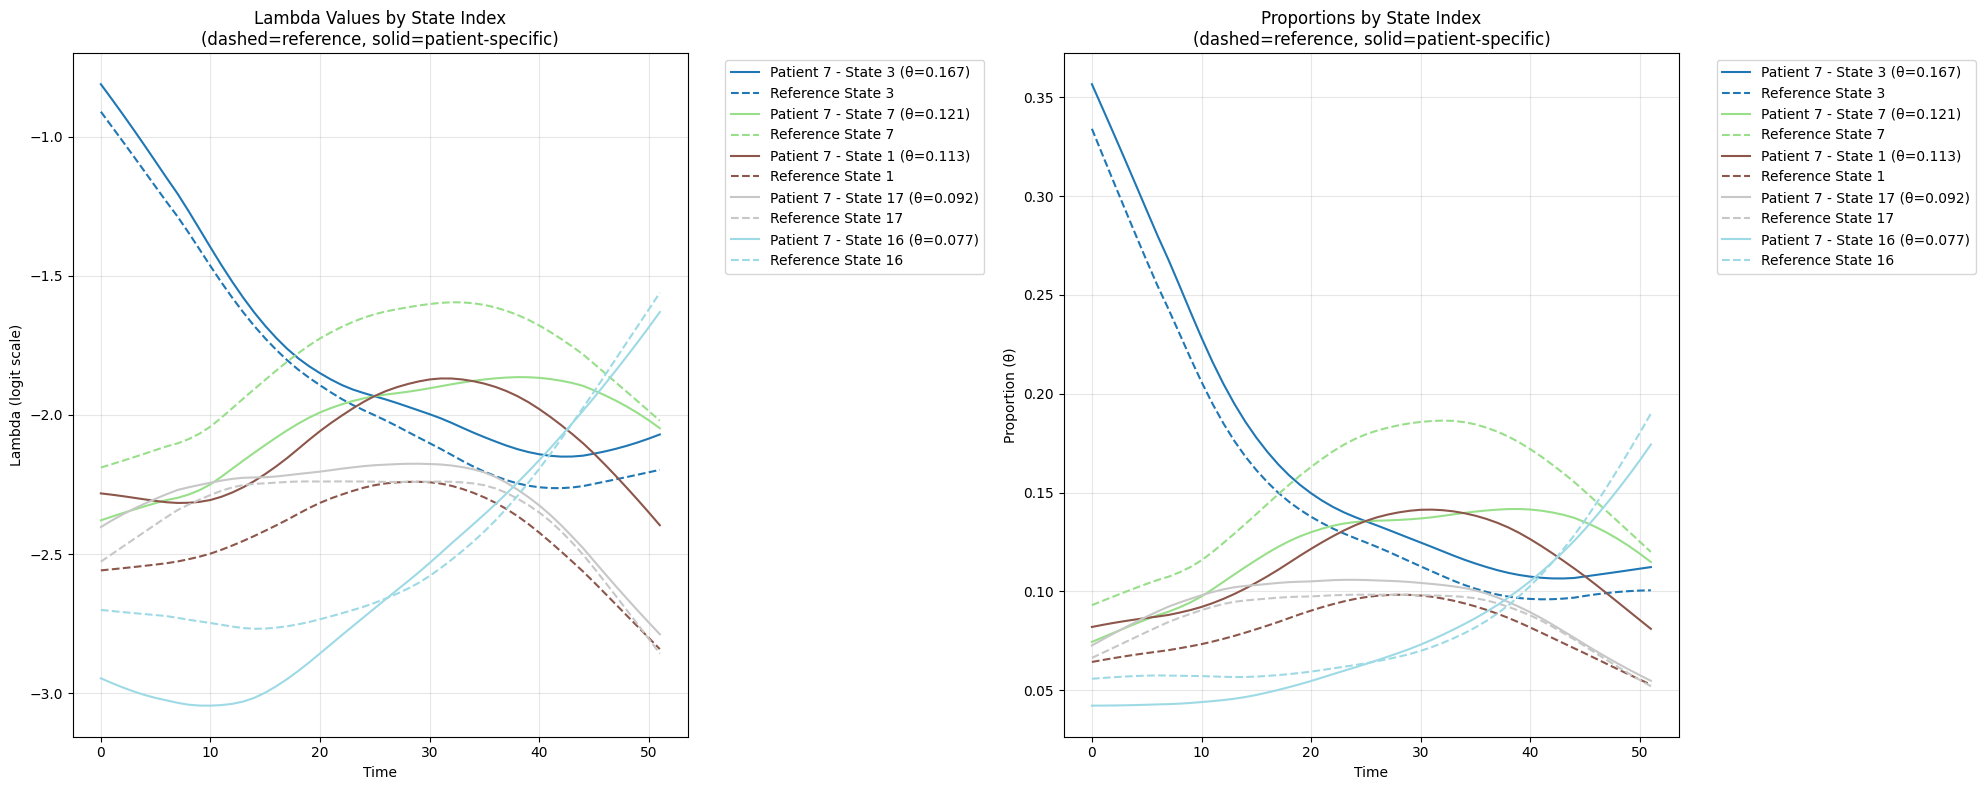

In [37]:
def plot_patient_trajectories(patient_idx, all_lambdas, all_thetas, reference_trajectories):
    """Plot lambda values and proportions for top states of a given patient"""
    
    reference_trajectories = torch.tensor(reference_trajectories['signature_refs'])
    
    # Get mean thetas across time to find top states
    patient_mean_thetas = all_thetas[patient_idx].mean(axis=1)
    top_states = np.argsort(patient_mean_thetas)[-5:][::-1]  # Get top 5 states
    
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    
    # Colors for different states
    colors = plt.cm.tab20(np.linspace(0, 1, len(top_states)))
    
    # Plot both patient-specific and reference trajectories
    for i, state in enumerate(top_states):
        theta_mean = patient_mean_thetas[state]
        
        # Lambda values plot
        ax1.plot(range(52), all_lambdas[patient_idx, state], 
                color=colors[i], label=f'Patient {patient_idx} - State {state} (θ={theta_mean:.3f})')
        ax1.plot(range(52), reference_trajectories[state], 
                color=colors[i], linestyle='--', label=f'Reference State {state}')
        
        # Proportion values plot
        ax2.plot(range(52), all_thetas[patient_idx, state], 
                color=colors[i], label=f'Patient {patient_idx} - State {state} (θ={theta_mean:.3f})')
        
        # Reference proportions (need to compute from reference trajectories)
        ref_props = torch.softmax(torch.tensor(reference_trajectories), dim=0)[state]
        ax2.plot(range(52), ref_props, 
                color=colors[i], linestyle='--', label=f'Reference State {state}')
    
    # Customize plots
    ax1.set_title('Lambda Values by State Index\n(dashed=reference, solid=patient-specific)')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Lambda (logit scale)')
    ax1.grid(True, alpha=0.3)
    ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    ax2.set_title('Proportions by State Index\n(dashed=reference, solid=patient-specific)')
    ax2.set_xlabel('Time')
    ax2.set_ylabel('Proportion (θ)')
    ax2.grid(True, alpha=0.3)
    ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    plt.show()

# Try with a sample patient
sample_patient = 7  # or any other index
plot_patient_trajectories(sample_patient, all_lambdas, all_thetas, reference_trajectories)

In [36]:
reference_trajectories

{'signature_refs': tensor([[-5.1059, -5.0456, -4.9853,  ..., -2.6202, -2.5767, -2.5330],
         [-2.5581, -2.5542, -2.5502,  ..., -2.7607, -2.8007, -2.8409],
         [-3.0251, -2.9816, -2.9382,  ..., -2.8347, -2.8656, -2.8969],
         ...,
         [-2.5267, -2.4998, -2.4730,  ..., -2.7528, -2.8045, -2.8566],
         [-4.2426, -4.1940, -4.1465,  ..., -4.2500, -4.2633, -4.2765],
         [-2.7581, -2.7757, -2.7931,  ..., -2.8778, -2.8571, -2.8363]]),
 'healthy_ref': tensor([-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
         -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
         -inf, -inf, -inf, -inf])}

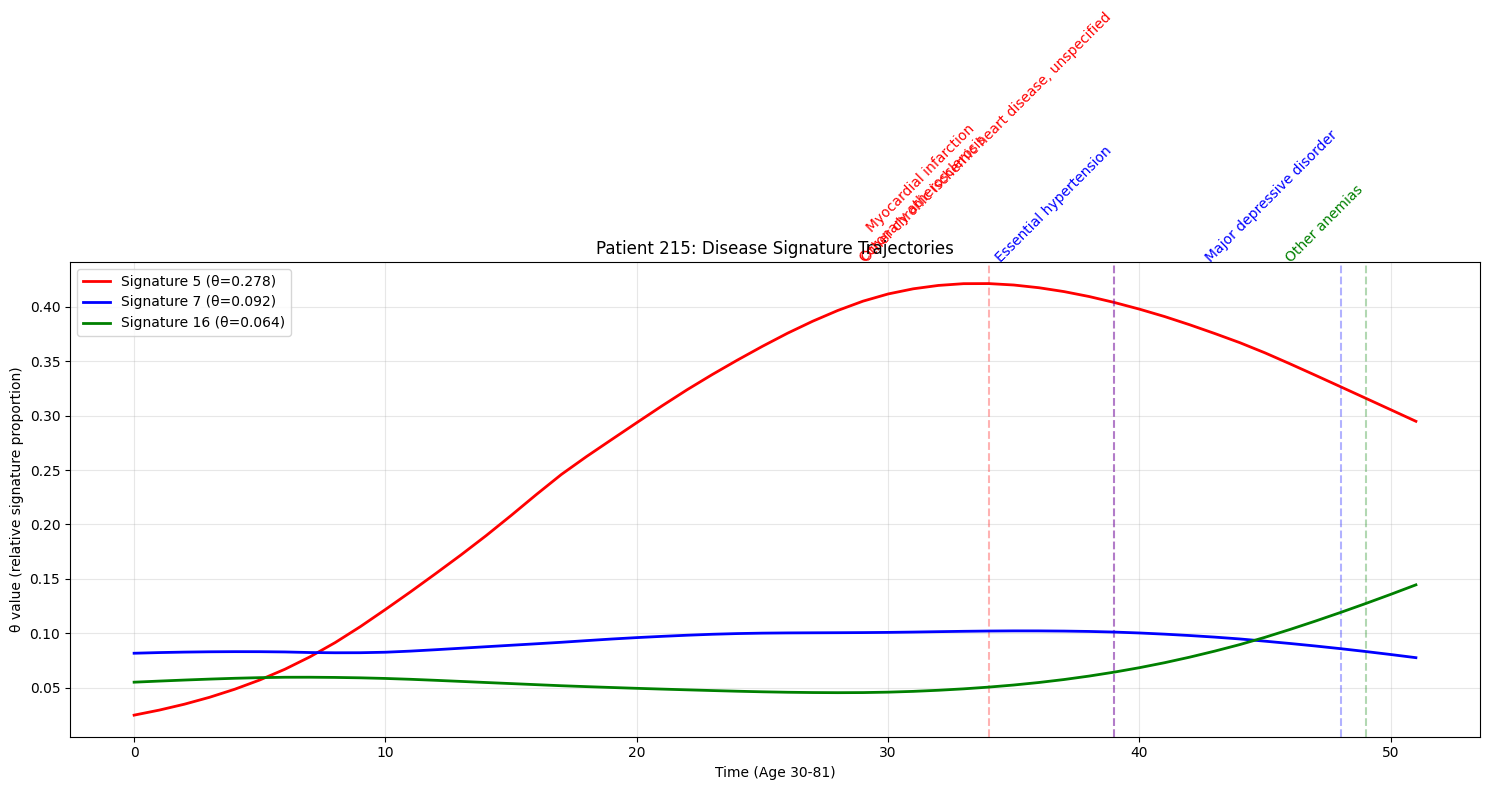

In [38]:
def find_aligned_diagnoses_patient(Y_np, all_thetas, clusters, disease_names):
    """Find patients with diagnoses aligning with peaks of signatures 5, 7, and 16"""
    
    for patient_idx in range(len(Y_np)):
        # Get diseases for each signature
        sig5_diseases = np.where(clusters == 5)[0]
        sig7_diseases = np.where(clusters == 7)[0]
        sig16_diseases = np.where(clusters == 16)[0]
        
        # Get theta trajectories
        patient_thetas = all_thetas[patient_idx]
        
        # Find peaks for each signature
        peak5 = np.argmax(patient_thetas[5])
        peak7 = np.argmax(patient_thetas[7])
        peak16 = np.argmax(patient_thetas[16])
        
        # Look for diagnoses near peaks (within 5 timepoints)
        window = 5
        has_aligned_diagnoses = True
        
        # Check Signature 5 diagnoses
        sig5_diag_times = [t for t in range(Y_np.shape[2]) 
                          if any(Y_np[patient_idx, d, t] > 0 for d in sig5_diseases)]
        if not any(abs(t - peak5) <= window for t in sig5_diag_times):
            has_aligned_diagnoses = False
            
        # Check Signature 7 diagnoses
        sig7_diag_times = [t for t in range(Y_np.shape[2]) 
                          if any(Y_np[patient_idx, d, t] > 0 for d in sig7_diseases)]
        if not any(abs(t - peak7) <= window for t in sig7_diag_times):
            has_aligned_diagnoses = False
            
        # Check Signature 16 diagnoses
        sig16_diag_times = [t for t in range(Y_np.shape[2]) 
                           if any(Y_np[patient_idx, d, t] > 0 for d in sig16_diseases)]
        if not any(abs(t - peak16) <= window for t in sig16_diag_times):
            has_aligned_diagnoses = False
            
        if has_aligned_diagnoses:
            return patient_idx
            
    return None

# Find a good example patient
example_patient = find_aligned_diagnoses_patient(Y_np, all_thetas, clusters, disease_names)

if example_patient is not None:
    def plot_patient_trajectories(patient_idx, all_thetas, Y_np, clusters, disease_names):
        """Plot theta curves with diagnoses for signatures 5, 7, and 16"""
        plt.figure(figsize=(15, 8))
        
        # Colors and labels for each signature
        sig_info = {
            5: {"name": "Signature 5", "color": "red"},
            7: {"name": "Signature 7", "color": "blue"},
            16: {"name": "Signature 16", "color": "green"}
        }
        
        # Plot each signature
        for sig_idx, info in sig_info.items():
            # Plot theta trajectory
            plt.plot(range(52), all_thetas[patient_idx, sig_idx], 
                    color=info["color"], 
                    label=f'{info["name"]} (θ={all_thetas[patient_idx, sig_idx].mean():.3f})',
                    linewidth=2)
            
            # Plot diagnoses
            sig_diseases = np.where(clusters == sig_idx)[0]
            for t in range(Y_np.shape[2]):
                diagnosed = [d for d in sig_diseases if Y_np[patient_idx, d, t] > 0]
                if diagnosed:
                    plt.axvline(x=t, color=info["color"], linestyle='--', alpha=0.3)
                    diseases_t = [disease_names[d] for d in diagnosed]
                    plt.text(t, plt.ylim()[1], '\n'.join(diseases_t),
                            color=info["color"], rotation=45, ha='right')
        
        plt.title(f'Patient {patient_idx}: Disease Signature Trajectories')
        plt.xlabel('Time (Age 30-81)')
        plt.ylabel('θ value (relative signature proportion)')
        plt.grid(True, alpha=0.3)
        plt.legend()
        plt.tight_layout()
        plt.show()
    
    plot_patient_trajectories(example_patient, all_thetas, Y_np, clusters, disease_names)
else:
    print("No patient found with well-aligned diagnoses for all three signatures")

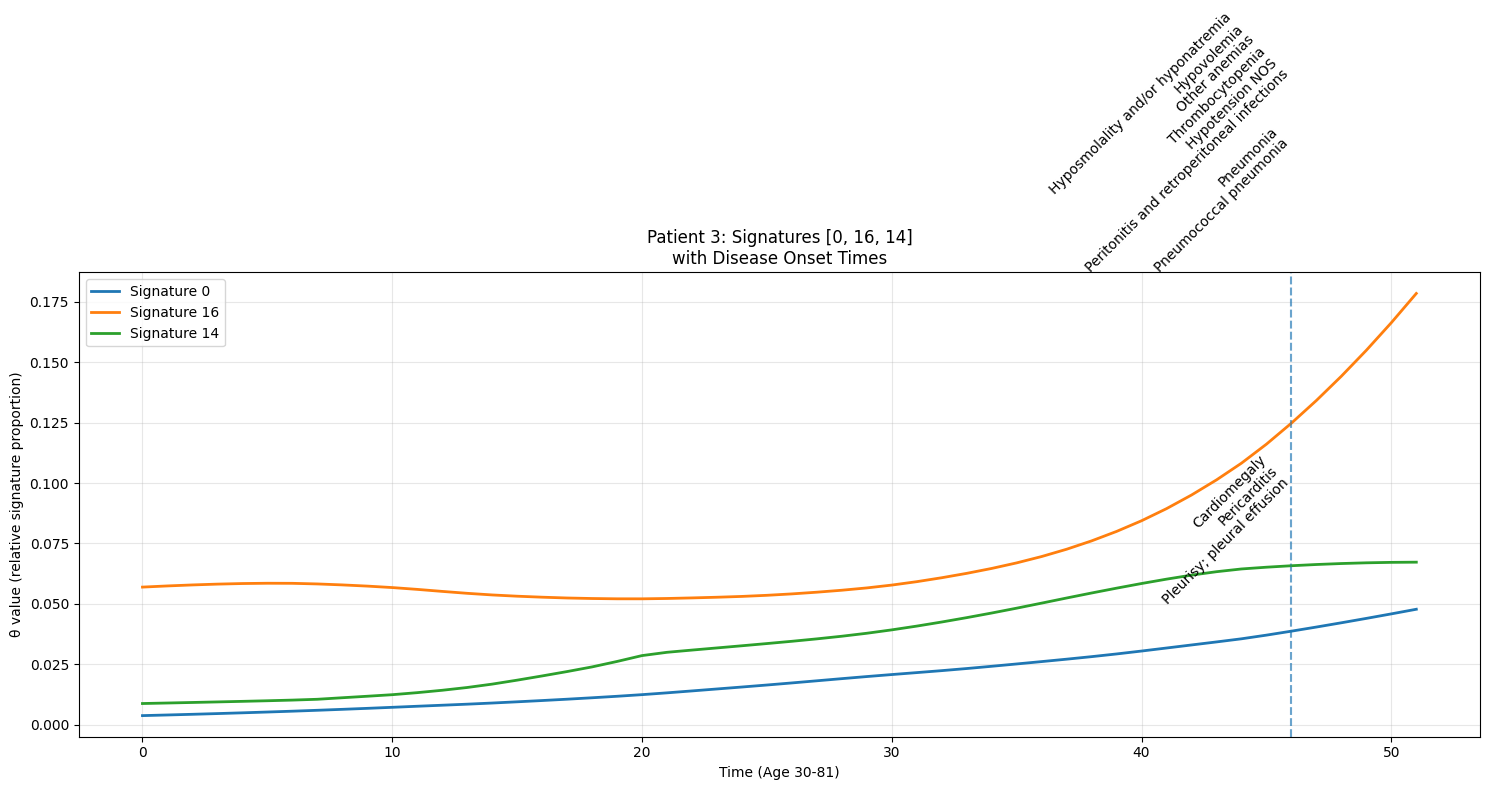

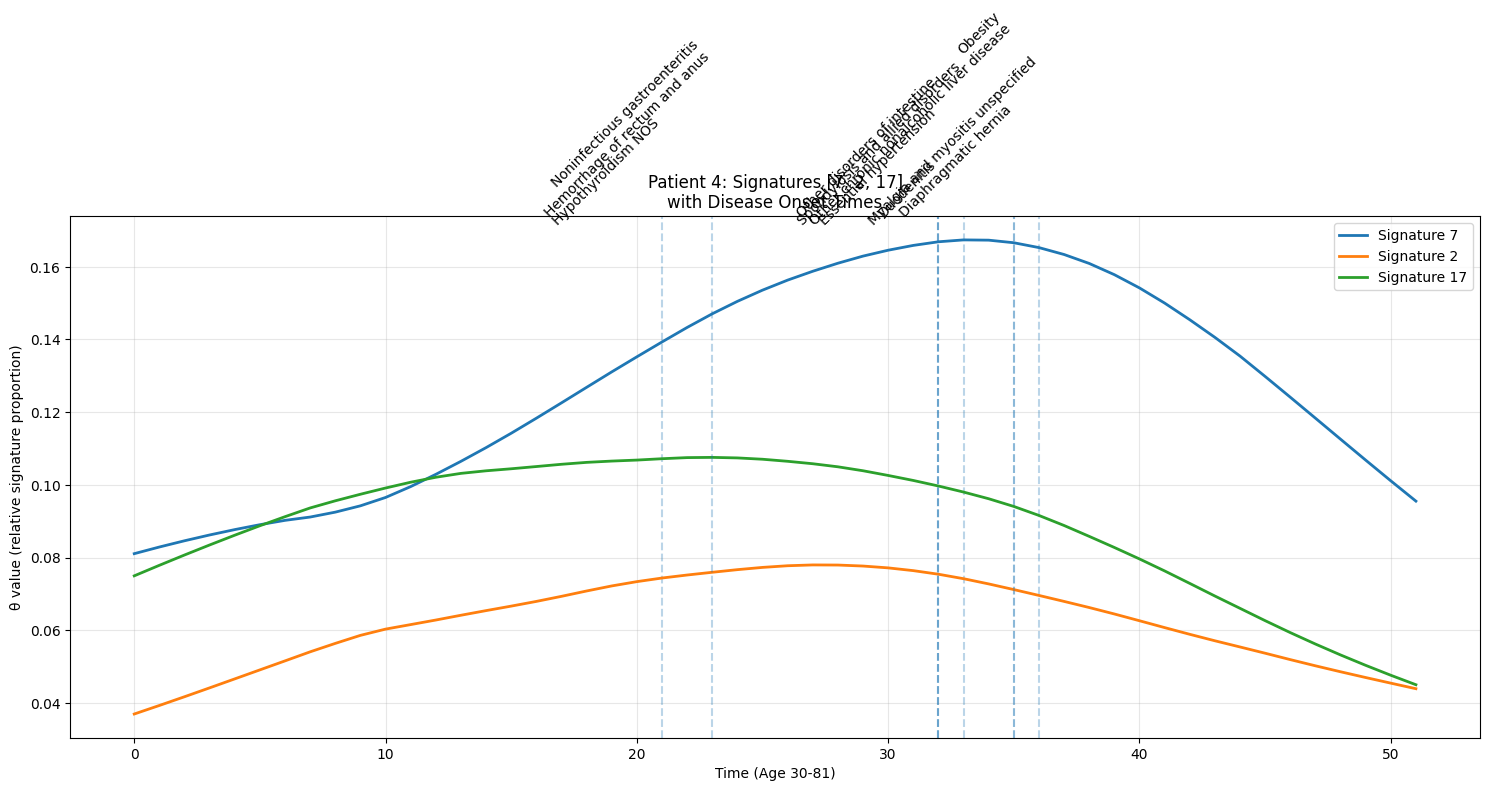

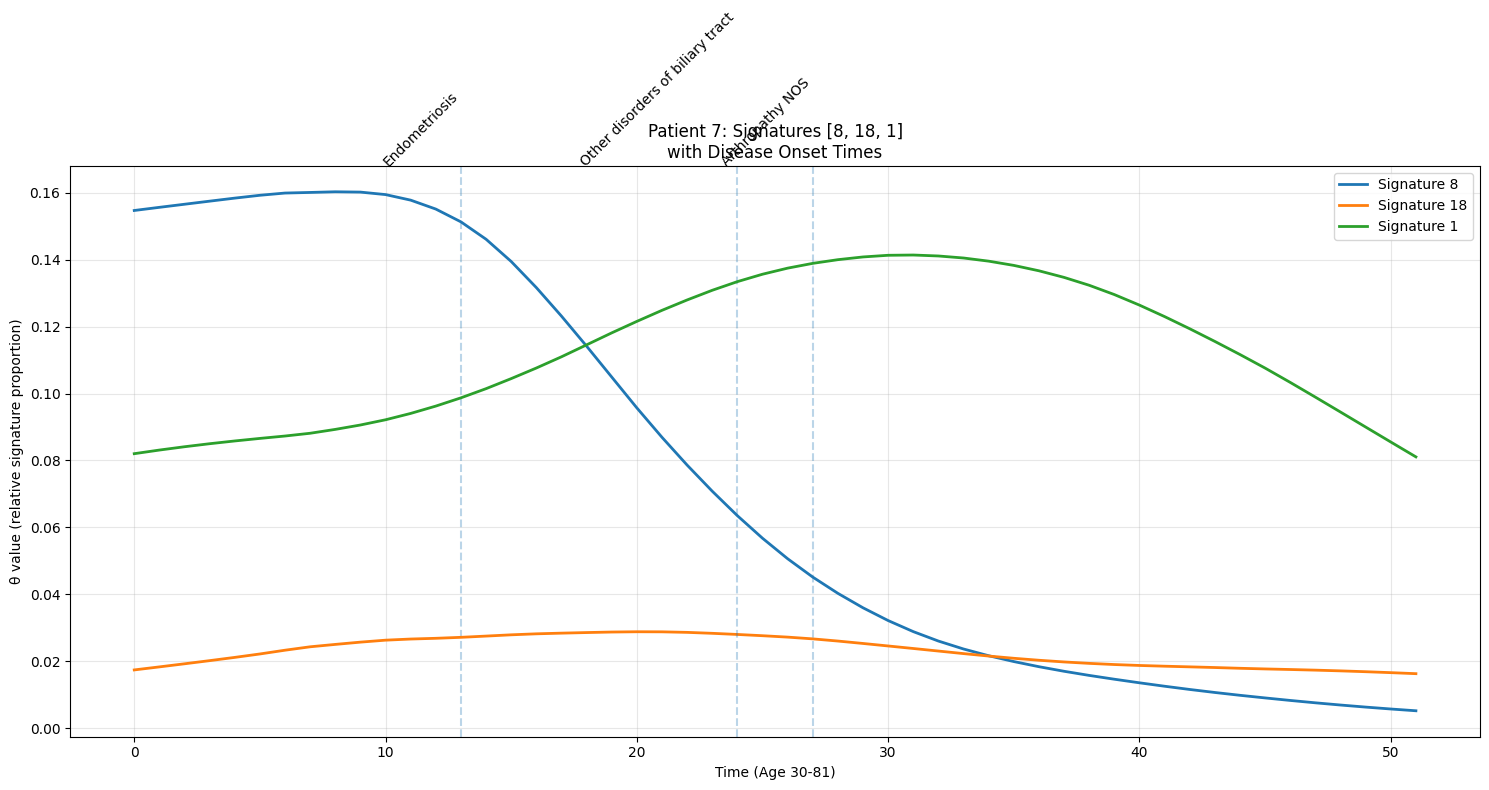

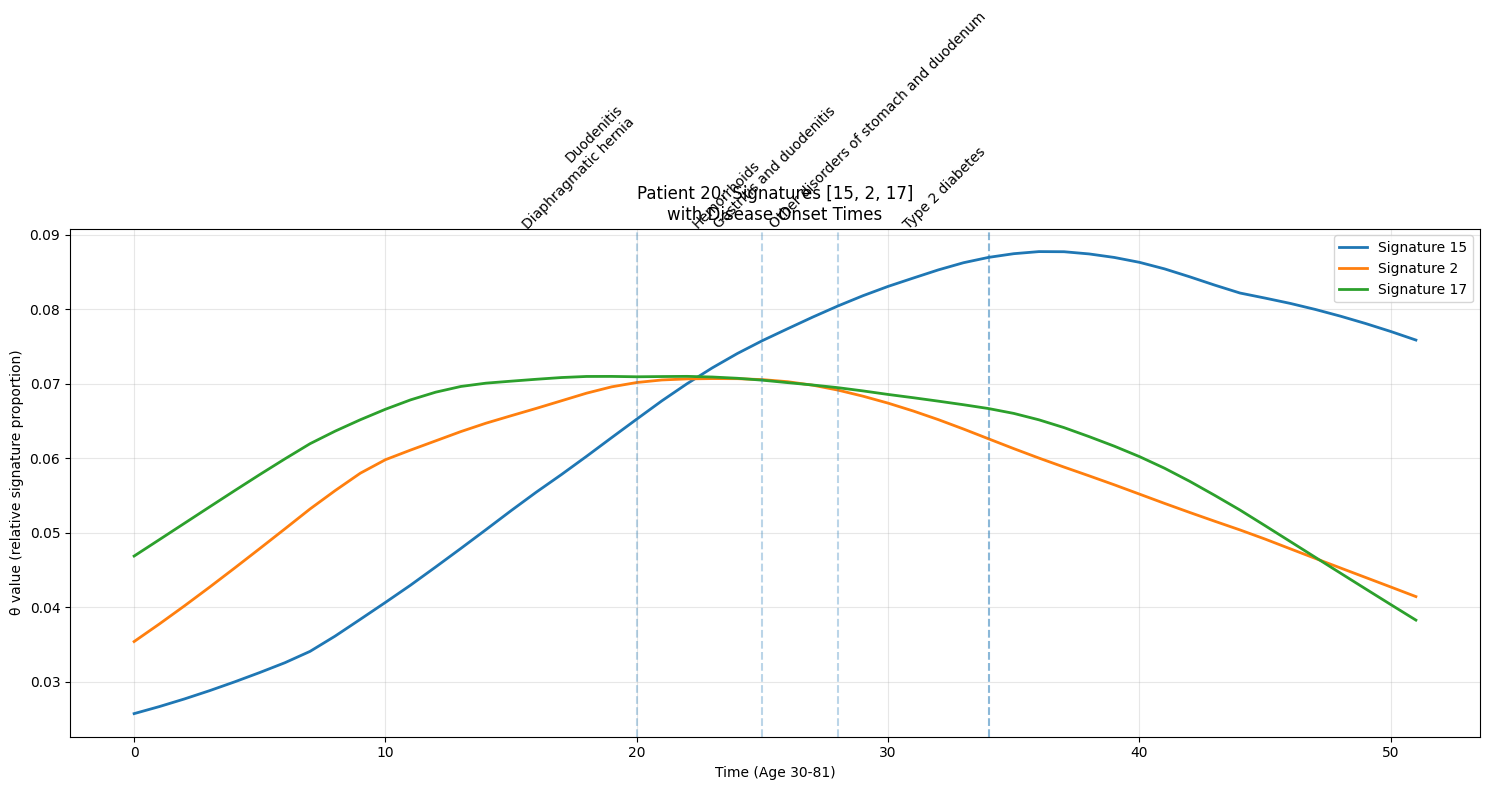

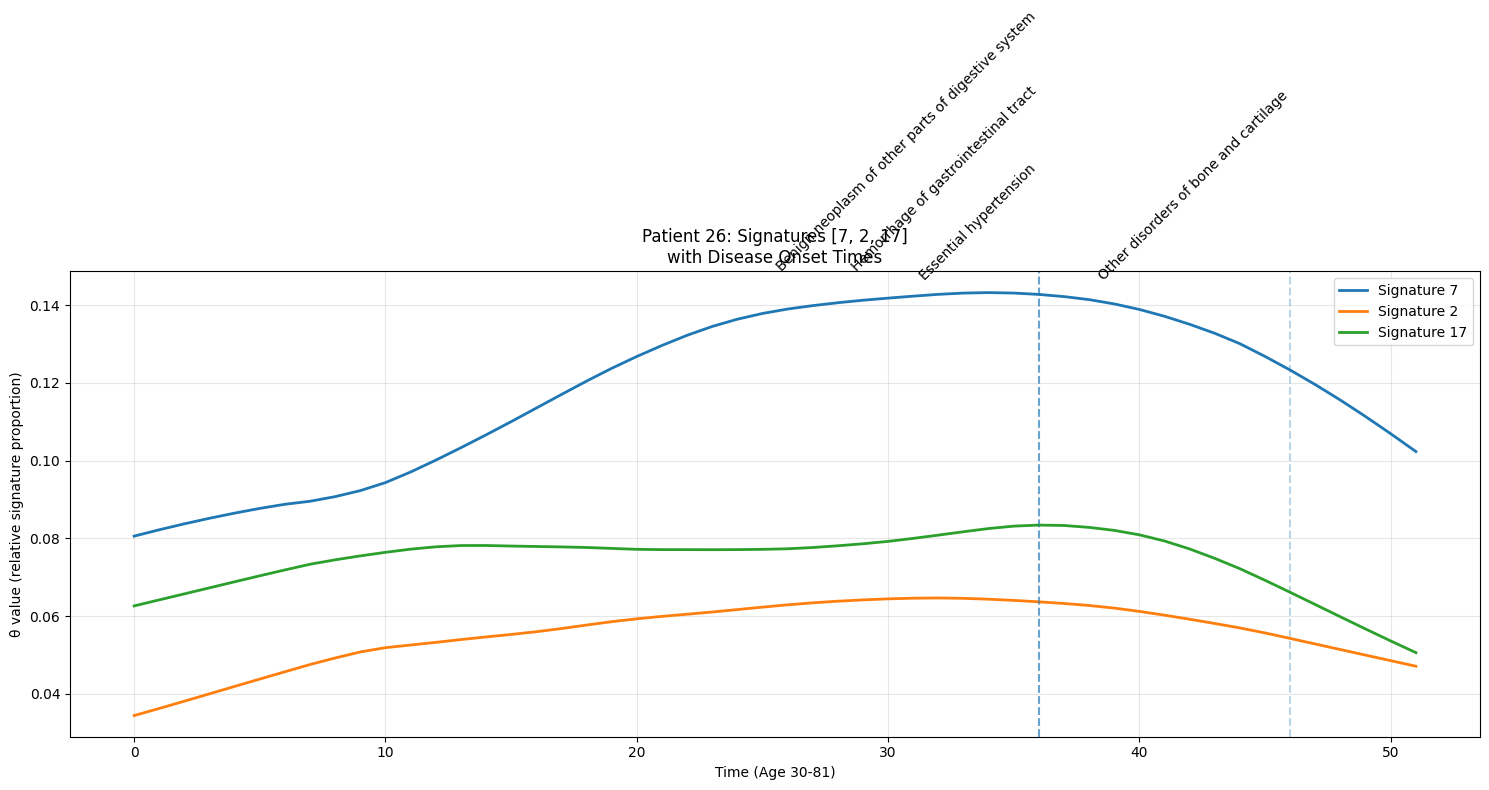

In [39]:
def find_dramatic_peaks_and_diagnoses(Y_np, all_thetas, clusters, disease_names, window=5):
    """Find patients with dramatic theta peaks coinciding with disease onset"""
    
    best_cases = []
    
    for patient_idx in range(len(Y_np)):
        # For each signature, check peak height and if diagnoses align
        sig_peaks = {}
        
        for sig_idx in range(all_thetas.shape[1]):
            theta = all_thetas[patient_idx, sig_idx]
            peak_time = np.argmax(theta)
            peak_height = theta[peak_time]
            baseline = np.mean(theta)
            peak_ratio = peak_height / baseline if baseline > 0 else 0
            
            # Get diseases and diagnosis times for this signature
            sig_diseases = np.where(clusters == sig_idx)[0]
            diag_times = [t for t in range(Y_np.shape[2]) 
                         if any(Y_np[patient_idx, d, t] > 0 for d in sig_diseases)]
            
            # Check if any diagnosis occurs near peak
            if any(abs(t - peak_time) <= window for t in diag_times):
                sig_peaks[sig_idx] = {
                    'peak_ratio': peak_ratio,
                    'peak_time': peak_time,
                    'diag_times': diag_times
                }
        
        # If we found at least 3 signatures with aligned peaks and diagnoses
        if len(sig_peaks) >= 3:
            # Sort by peak ratio to get most dramatic peaks
            top_sigs = sorted(sig_peaks.items(), 
                            key=lambda x: x[1]['peak_ratio'], 
                            reverse=True)[:3]
            
            best_cases.append({
                'patient_idx': patient_idx,
                'signatures': [sig for sig, _ in top_sigs]
            })
            
        if len(best_cases) >= 5:  # Find top 5 cases
            break
            
    return best_cases

# Find best examples
best_cases = find_dramatic_peaks_and_diagnoses(Y_np, all_thetas, clusters, disease_names)

# Plot each case
for case in best_cases:
    patient_idx = case['patient_idx']
    signatures = case['signatures']
    
    plt.figure(figsize=(15, 8))
    
    # Plot each signature
    for sig_idx in signatures:
        # Plot theta trajectory
        plt.plot(range(52), all_thetas[patient_idx, sig_idx], 
                label=f'Signature {sig_idx}',
                linewidth=2)
        
        # Plot diagnoses
        sig_diseases = np.where(clusters == sig_idx)[0]
        for t in range(Y_np.shape[2]):
            diagnosed = [d for d in sig_diseases if Y_np[patient_idx, d, t] > 0]
            if diagnosed:
                plt.axvline(x=t, linestyle='--', alpha=0.3)
                diseases_t = [disease_names[d] for d in diagnosed]
                plt.text(t, plt.ylim()[1], '\n'.join(diseases_t),
                        rotation=45, ha='right')
    
    plt.title(f'Patient {patient_idx}: Signatures {signatures}\nwith Disease Onset Times')
    plt.xlabel('Time (Age 30-81)')
    plt.ylabel('θ value (relative signature proportion)')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

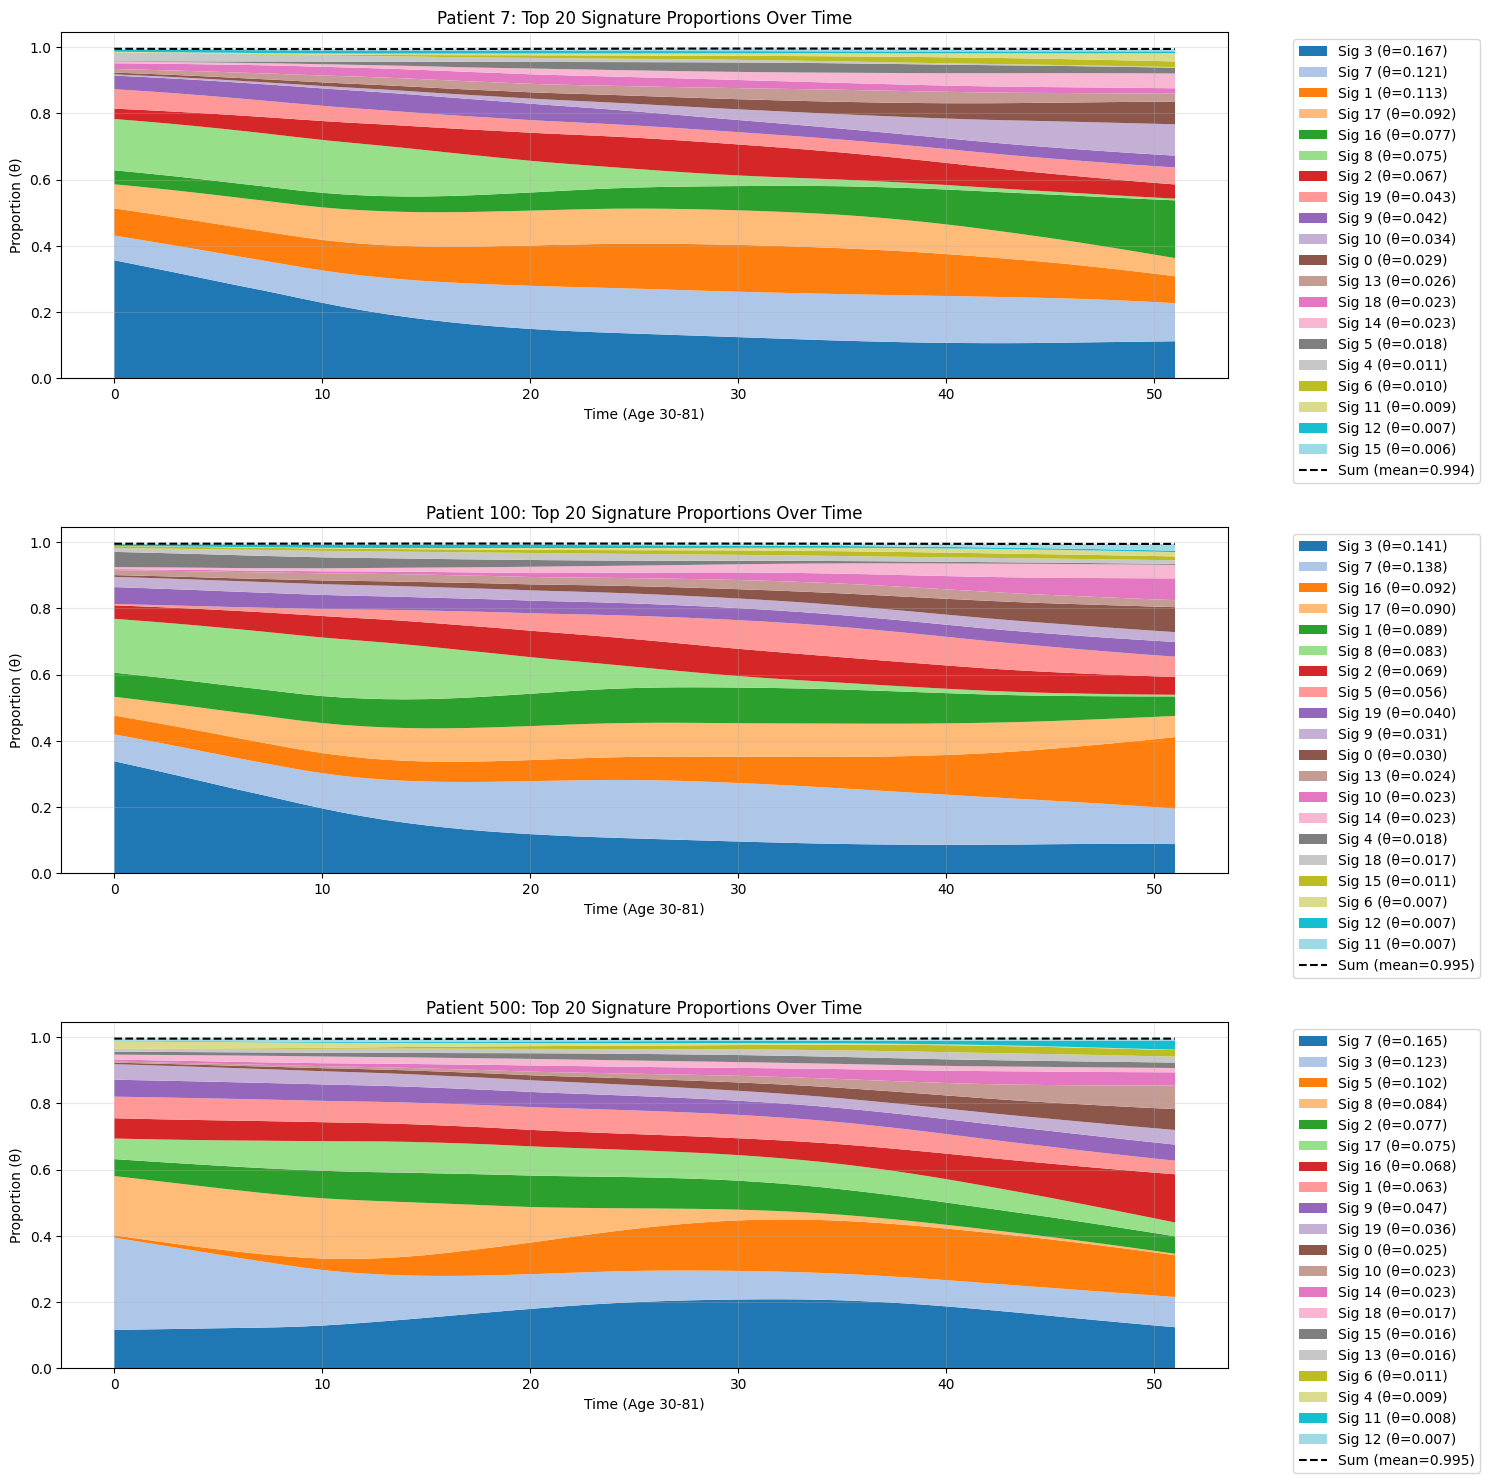

In [40]:
def plot_stacked_thetas(patient_idxs, all_thetas, n_top=20):
    """Plot stacked theta values for top signatures to show they sum to 1"""
    
    fig, axes = plt.subplots(len(patient_idxs), 1, figsize=(15, 5*len(patient_idxs)))
    if len(patient_idxs) == 1:
        axes = [axes]
    
    colors = plt.cm.tab20(np.linspace(0, 1, n_top))
    
    for ax_idx, patient_idx in enumerate(patient_idxs):
        # Get mean thetas to find top signatures
        patient_mean_thetas = all_thetas[patient_idx].mean(axis=1)
        top_sigs = np.argsort(patient_mean_thetas)[-n_top:][::-1]
        
        # Get theta values for top signatures
        thetas = all_thetas[patient_idx, top_sigs]
        
        # Create stacked plot
        ax = axes[ax_idx]
        ax.stackplot(range(52), thetas, labels=[f'Sig {s} (θ={patient_mean_thetas[s]:.3f})' for s in top_sigs],
                    colors=colors)
        
        # Add sum line to verify it equals 1
        theta_sums = thetas.sum(axis=0)
        ax.plot(range(52), theta_sums, 'k--', label=f'Sum (mean={theta_sums.mean():.3f})')
        
        ax.set_title(f'Patient {patient_idx}: Top {n_top} Signature Proportions Over Time')
        ax.set_xlabel('Time (Age 30-81)')
        ax.set_ylabel('Proportion (θ)')
        ax.grid(True, alpha=0.3)
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    plt.show()

# Plot for three sample patients
sample_patients = [7, 100, 500]  # or choose other interesting patients
plot_stacked_thetas(sample_patients, all_thetas, n_top=20)